In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

In [3]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, log_loss,  confusion_matrix
from sklearn.model_selection import train_test_split


In [4]:
# M4
from sklearn.cluster import KMeans
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler  # k-means

from sklearn.mixture import GaussianMixture # EM-алгоритм
from sklearn.cluster import AgglomerativeClustering # агломеративная
import warnings
from sklearn.neighbors import kneighbors_graph # матрица смежности

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score, completeness_score
from sklearn.metrics.cluster import v_measure_score


# Модуль 2

### Задание 2.12.7

In [5]:
vis_data = pd.read_csv("../data/train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("../data/latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

In [6]:
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,...,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,address,lat,lon
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,3.0,S. WICKER,CHICAGO,IL,...,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,2959.0,Martin Luther King,Detroit,MI,...,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0,"14512 sussex, Detroit MI",42.394657,-83.194265


In [7]:
vis_data.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'mailing_address_str_number', 'mailing_address_str_name', 'city',
       'state', 'zip_code', 'non_us_str_code', 'country', 'ticket_issued_date',
       'hearing_date', 'violation_code', 'violation_description',
       'disposition', 'fine_amount', 'admin_fee', 'state_fee', 'late_fee',
       'discount_amount', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance', 'address', 'lat',
       'lon'],
      dtype='object')

In [8]:
dt_issued_date = pd.to_datetime(vis_data.ticket_issued_date)
vis_data['is_weekend'] = dt_issued_date.dt.weekday > 4
num_weekend_tickets = vis_data['is_weekend'].sum()
print("Кол-во штрафов, выписанных в выходные дни:", num_weekend_tickets)

Кол-во штрафов, выписанных в выходные дни: 1620


### Задание 2.12.8

In [9]:
df = pd.read_csv("../data/data_flats.csv", sep=';' 
                       # encoding = 'ISO-8859-1', 
                       # low_memory = False
)
df.head(3)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000


In [10]:
df.keys()

Index(['id', 'full_sq', 'life_sq', 'floor', 'sub_area', 'preschool_quota',
       'preschool_education_centers_raion', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk',
       'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km',
       'green_zone_km', 'industrial_km', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'public_transport_station_km',
       'public_transport_station_min_walk', 'mkad_km', 'ttk_km', 'sadovoe_km',
       'bulvar_ring_km', 'kremlin_km', 'big_market_km', 'market_shop_km',
       'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
       'basketball_km', 'hospice_morgue_km', 'university_km', 'workp

In [11]:
df['ecology_id'] = df.ecology.apply(lambda x: x.lower())
df.ecology_id.value_counts()

ecology_id
poor            8017
no data         7656
good            7173
excellent       3938
satisfactory    3685
Name: count, dtype: int64

In [12]:
# Создание словаря для сопоставления числовых значений и описания экологии
ecology_dict = {
    'no data': 0,
    'poor': 1,
    'satisfactory': 2,
    'good': 3,
    'excellent': 4
}
df.ecology_id = df.ecology_id.replace(ecology_dict)
df.ecology_id.value_counts()

ecology_id
1    8017
0    7656
3    7173
4    3938
2    3685
Name: count, dtype: int64

In [13]:
df['sub_area_new'] = df.sub_area.apply(lambda x: x.lower())
df.sub_area_new.value_counts()

sub_area_new
poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie klenovskoe                 1
poselenie mihajlovo-jarcevskoe       1
Name: count, Length: 146, dtype: int64

In [14]:
# Создание фиктивных переменных для столбца с информацией о районе
district_dummies = pd.get_dummies(df['sub_area_new'])
data = pd.concat([df, district_dummies], axis=1)
result = data.shape[1] - 2
print("Кол-во признаков в номов датасете:", result)

Кол-во признаков в номов датасете: 202


In [15]:
# Найдем среднее арифметическое для признака "Экология"
mean_ecology = data['ecology'].mean()
mean_ecology_rounded = round(mean_ecology, 2)
print("Среднее арифметическое для признака 'Экология':", mean_ecology_rounded)

TypeError: Could not convert goodexcellentpoorgoodexcellentpoorpoorgoodpoorsatisfactorygoodsatisfactorysatisfactorypoorpoorexcellentpoorpoorgoodgoodno datapoorsatisfactorypoorsatisfactorysatisfactorygoodgoodpoorgoodgoodsatisfactorygoodexcellentno dataexcellentexcellentpoorpoorpoorexcellentexcellentpoorsatisfactoryexcellentgoodgoodgoodgoodpoorpoorgoodpoorexcellentexcellentpoorpoorsatisfactorypoorpoorgoodgoodpoorpoorexcellentgoodgoodexcellentpoorpoorgoodsatisfactoryexcellentpoorexcellentpoorpoorpoorgoodgoodgoodsatisfactorysatisfactorypoorgoodgoodexcellentno datasatisfactorysatisfactorysatisfactorysatisfactorysatisfactorygoodpoorexcellentsatisfactoryexcellentgoodpoorpoorpoorgoodgoodpoorexcellentpoorpoorpoorpoorexcellentexcellentno datapoorgoodpoorgoodgoodpoorpoorpoorpoorno datasatisfactorypoorexcellentexcellentexcellentpoorpoorpoorgoodgoodsatisfactorysatisfactorypoorgoodexcellentexcellentexcellentpoorexcellentgoodgoodpoorgoodexcellentexcellentexcellentpoorexcellentgoodpoorsatisfactoryno datapoorpoorexcellentsatisfactorygoodexcellentpoorgoodgoodno dataexcellentpoorgoodsatisfactoryexcellentgoodexcellentexcellentpoorpoorpoorexcellentpoorgoodpoorexcellentpoorexcellentexcellentsatisfactorygoodpoorexcellentgoodsatisfactorypoorgoodpoorgoodgoodexcellentpoorpoorexcellentsatisfactorypoorgoodpoorexcellentgoodpoorgoodpoorno datapoorsatisfactorysatisfactorypoorgoodsatisfactorypoorsatisfactorysatisfactorygoodsatisfactoryexcellentgoodgoodsatisfactoryexcellentsatisfactoryexcellentgoodsatisfactorypoorexcellentpoorgoodpoorpoorexcellentpoorexcellentgoodpoorno datapoorpoorgoodgoodgoodpoorpoorpoorpoorgoodsatisfactorypoorsatisfactorysatisfactorypoorpoorexcellentgoodexcellentpoorpoorpoorpoorgoodgoodpoorgoodgoodpoorexcellentgoodexcellentpoorpoorgoodsatisfactorysatisfactorygoodgoodpoorgoodexcellentexcellentexcellentpoorpoorpoorpoorsatisfactoryexcellentpoorgoodpoorpoorpoorexcellentsatisfactorypoorsatisfactorypoorpoorpoorpoorpoorpoorno datagoodpoorsatisfactorygoodexcellentpoorexcellentgoodpoorpoorsatisfactorysatisfactorypoorgoodpoorexcellentgoodgoodpoorgoodgoodpoorgoodsatisfactorypoorgoodgoodpoorgoodpoorpoorno datapoorgoodpoorpoorno datapoorgoodno datagoodexcellentpoorgoodpoorsatisfactorygoodsatisfactorygoodexcellentgoodgoodgoodgoodgoodpoorexcellentgoodpoorgoodgoodgoodgoodsatisfactorygoodpoorgoodsatisfactoryexcellentgoodgoodsatisfactoryexcellentpoorpoorgoodsatisfactoryno dataexcellentpoorsatisfactorypoorgoodgoodsatisfactoryexcellentgoodpoorgoodgoodno datagoodgoodgoodpoorgoodno datapoorpoorgoodgoodexcellentexcellentsatisfactorygoodgoodpoorexcellentgoodno dataexcellentpoorexcellentpoorgoodpoorsatisfactorygoodsatisfactoryno dataexcellentgoodgoodpoorexcellentpoorgoodexcellentgoodgoodsatisfactorysatisfactorysatisfactorypoorsatisfactorygoodgoodgoodpoorpoorexcellentsatisfactoryexcellentexcellentexcellentpoorpoorpoorexcellentexcellentexcellentgoodpoorexcellentsatisfactorypoorpoorpoorpoorgoodno datasatisfactorysatisfactorygoodgoodpoorpoorpoorexcellentgoodpoorpoorgoodpoorgoodpoorpoorexcellentexcellentpoorgoodpoorgoodsatisfactorygoodpoorexcellentgoodexcellentpoorpoorsatisfactorypoorgoodpoorsatisfactoryexcellentpoorgoodpoorpoorexcellentno datagoodsatisfactorygoodpoorgoodexcellentexcellentpoorsatisfactorypoorsatisfactorypoorgoodexcellentsatisfactorygoodexcellentsatisfactorygoodpoorpoorexcellentgoodexcellentpoorgoodgoodexcellentsatisfactorypoorpoorpoorpoorsatisfactorypoorgoodpoorexcellentgoodexcellentsatisfactorygoodsatisfactoryexcellentno datapoorgoodpoorgoodpoorpoorgoodexcellentsatisfactorypoorpoorpoorsatisfactorygoodpoorpoorpoorgoodpoorpoorpoorpoorpoorexcellentsatisfactoryexcellentgoodgoodno datapoorpoorpoorpoorgoodsatisfactorysatisfactorysatisfactorysatisfactorypoorgoodpoorpoorpoorgoodgoodexcellentpoorsatisfactoryexcellentpoorgoodsatisfactorypoorpoorno datapoorgoodpoorpoorpoorgoodgoodno datagoodgoodpoorexcellentexcellentgoodsatisfactorygoodpoorgoodpoorgoodgoodpoorno datasatisfactorygoodsatisfactorygoodpoorno datagoodgoodgoodpoorsatisfactoryexcellentexcellentsatisfactorypoorsatisfactorypoorgoodsatisfactorygoodno datapoorsatisfactorygoodgoodpoorpoorpoorsatisfactorygoodpoorpoorno datapoorpoorsatisfactorypoorsatisfactorysatisfactoryexcellentpoorgoodgoodpoorexcellentpoorpoorpoorgoodpoorsatisfactorygoodgoodpoorpoorpoorexcellentpoorgoodpoorsatisfactorypoorpoorsatisfactorygoodpoorpoorsatisfactoryexcellentexcellentpoorgoodpoorpoorno datasatisfactorypoorpoorpoorgoodgoodsatisfactorypoorexcellentno dataexcellentpoorpoorexcellentpoorexcellentexcellentpoorpoorgoodexcellentgoodexcellentpoorpoorsatisfactoryexcellentpoorgoodpoorpoorpoorgoodpoorpoorgoodexcellentpoorexcellentpoorsatisfactorysatisfactorypoorpoorpoorgoodpoorgoodgoodgoodpoorgoodpoorsatisfactorygoodpoorgoodsatisfactoryexcellentgoodpoorpoorpoorgoodgoodgoodpoorgoodgoodpoorsatisfactorypoorpoorexcellentgoodsatisfactorypoorno datapoorsatisfactorypoorexcellentpoorpoorexcellentpoorsatisfactorygoodpoorpoorno datasatisfactorypoorpoorgoodgoodexcellentgoodexcellentexcellentexcellentsatisfactorygoodexcellentpoorpoorexcellentpoorsatisfactorypoorexcellentsatisfactorygoodpoorsatisfactorygoodgoodexcellentpoorexcellentpoorgoodgoodgoodpoorgoodpoorexcellentsatisfactoryexcellentgoodexcellentsatisfactorygoodpoorpoorsatisfactorypoorgoodsatisfactoryexcellentpoorgoodpoorgoodpoorpoorgoodgoodgoodpoorpoorgoodgoodexcellentpoorgoodpoorpoorsatisfactorypoorsatisfactoryexcellentsatisfactorypoorpoorgoodexcellentpoorgoodpoorexcellentgoodsatisfactorysatisfactorypoorgoodexcellentgoodgoodexcellentpoorgoodpoorexcellentgoodpoorgoodgoodsatisfactorygoodexcellentpoorpoorpoorpoorexcellentgoodexcellentpoorsatisfactorypoorexcellentpoorgoodpoorpoorsatisfactoryexcellentpoorpoorpoorgoodgoodgoodexcellentsatisfactorygoodsatisfactoryexcellentgoodgoodpoorgoodno datasatisfactorypoorpoorexcellentexcellentgoodpoorpoorpoorpoorgoodpoorpoorexcellentexcellentgoodsatisfactorysatisfactorypoorgoodexcellentexcellentexcellentpoorexcellentpoorpoorpoorgoodgoodsatisfactoryexcellentexcellentpoorgoodsatisfactoryexcellentpoorexcellentgoodgoodgoodgoodgoodgoodsatisfactorygoodgoodpoorexcellentpoorsatisfactorypoorgoodexcellentpoorpoorpoorgoodpoorpoorsatisfactorysatisfactoryexcellentgoodsatisfactorygoodgoodpoorgoodpoorsatisfactorypoorpoorpoorno datagoodpoorpoorgoodgoodpoorpoorpoorpoorsatisfactorypoorexcellentsatisfactorypoorpoorgoodexcellentpoorgoodpoorsatisfactorygoodno datapoorgoodexcellentsatisfactorysatisfactoryno datapoorpoorpoorpoorpoorpoorpoorexcellentpoorexcellentpoorsatisfactorygoodpoorpoorpoorpoorgoodpoorexcellentpoorgoodexcellentgoodexcellentsatisfactorysatisfactoryno datapoorsatisfactorypoorpoorsatisfactoryexcellentsatisfactorypoorpoorpoorgoodsatisfactorysatisfactorysatisfactoryexcellentsatisfactorygoodsatisfactorygoodpoorexcellentpoorpoorsatisfactoryexcellentpoorexcellentpoorpoorgoodpoorno datagoodgoodpoorpoorgoodexcellentpoorpoorpoorsatisfactoryexcellentpoorexcellentexcellentpoorexcellentpoorpoorgoodpoorgoodexcellentgoodpoorpoorexcellentpoorno dataexcellentpoorpoorpoorsatisfactorygoodgoodpoorpoorgoodgoodgoodpoorgoodexcellentexcellentno datagoodsatisfactoryexcellentgoodpoorno datapoorexcellentexcellentpoorpoorgoodpoorgoodpoorgoodexcellentgoodgoodpoorpoorexcellentpoorexcellentno datapoorgoodpoorpoorsatisfactorygoodpoorno datasatisfactorysatisfactorypoorpoorpoorpoorpoorsatisfactorysatisfactorysatisfactorypoorsatisfactorypoorsatisfactoryno dataexcellentsatisfactoryexcellentpoorgoodgoodgoodpoorsatisfactoryexcellentpoorgoodsatisfactoryexcellentsatisfactoryexcellentsatisfactorypoorpoorgoodpoorexcellentsatisfactorysatisfactorygoodpoorpoorexcellentpoorexcellentpoorsatisfactorygoodpoorsatisfactorypoorsatisfactorypoorpoorpoorpoorgoodpoorpoorpoorsatisfactorygoodsatisfactorygoodgoodgoodpoorpoorgoodgoodsatisfactorypoorexcellentgoodno datapoorsatisfactorypoorexcellentsatisfactorypoorgoodgoodsatisfactorygoodgoodsatisfactorysatisfactorypoorpoorgoodexcellentgoodpoorgoodexcellentsatisfactoryexcellentexcellentpoorpoorpoorpoorpoorpoorno datasatisfactorypoorpoorexcellentpoorsatisfactoryno datapoorpoorsatisfactorypoorgoodsatisfactorygoodpoorpoorexcellentpoorsatisfactoryexcellentpoorpoorno datagoodsatisfactorysatisfactorysatisfactorypoorpoorpoorpoorsatisfactoryexcellentgoodpoorpoorpoorpoorgoodgoodpoorsatisfactorypoorgoodexcellentgoodpoorexcellentgoodgoodexcellentpoorexcellentpoorgoodgoodgoodexcellentgoodpoorgoodsatisfactorypoorgoodpoorpoorexcellentpoorsatisfactorygoodno datasatisfactorypoorexcellentgoodgoodexcellentgoodexcellentno datasatisfactorypoorexcellentexcellentpoorsatisfactorysatisfactorypoorgoodpoorgoodpoorpoorpoorsatisfactoryexcellentpoorpoorpoorpoorpoorsatisfactoryexcellentpoorpoorsatisfactoryexcellentpoorgoodpoorpoorpoorgoodgoodpoorpoorsatisfactorypoorexcellentsatisfactorypoorpoorexcellentpoorsatisfactoryexcellentexcellentpoorno datapoorno datapoorpoorpoorgoodpoorpoorsatisfactoryno datapoorpoorsatisfactoryexcellentgoodpoorsatisfactoryexcellentno datasatisfactorysatisfactoryexcellentgoodpoorgoodgoodpoorgoodpoorpoorpoorexcellentgoodexcellentsatisfactorygoodpoorpoorpoorexcellentgoodgoodpoorpoorgoodno datasatisfactorygoodpoorsatisfactorypoorgoodexcellentsatisfactorygoodexcellentsatisfactoryexcellentexcellentpoorexcellentpoorpoorpoorpoorgoodexcellentexcellentsatisfactorysatisfactorypoorgoodpoorsatisfactorypoorpoorpoorgoodsatisfactorygoodpoorsatisfactorypoorpoorpoorpoorgoodpoorpoorpoorpoorpoorpoorgoodsatisfactorypoorsatisfactorysatisfactorysatisfactorypoorsatisfactorypoorpoorpoorexcellentpoorgoodpoorgoodsatisfactorypoorexcellentgoodsatisfactoryexcellentsatisfactorypoorpoorsatisfactorypoorpoorpoorgoodexcellentexcellentsatisfactorypoorno dataexcellentgoodgoodpoorpoorsatisfactorysatisfactorygoodsatisfactorypoorpoorsatisfactorygoodpoorsatisfactorygoodsatisfactoryexcellentsatisfactorypoorpoorgoodpoorpoorexcellentgoodpoorpoorno datagoodgoodpoorsatisfactorysatisfactorypoorexcellentpoorgoodsatisfactorypoorexcellentpoorpoorgoodgoodsatisfactorypoorpoorpoorsatisfactoryno dataexcellentpoorsatisfactorygoodgoodexcellentexcellentpoorpoorpoorpoorsatisfactorysatisfactorypoorgoodpoorexcellentpoorexcellentexcellentpoorsatisfactorygoodpoorpoorsatisfactorygoodgoodexcellentpoorpoorpoorgoodpoorpoorpoorgoodexcellentexcellentsatisfactorygoodgoodsatisfactorygoodgoodgoodsatisfactorypoorsatisfactorypoorpoorsatisfactorypoorexcellentno dataexcellentsatisfactorygoodsatisfactorysatisfactorysatisfactorygoodpoorexcellentno datapoorexcellentpoorsatisfactorypoorpoorpoorpoorpoorno datasatisfactorypoorexcellentpoorgoodpoorpoorsatisfactorygoodpoorno datasatisfactorypoorexcellentgoodpoorpoorno datapoorexcellentsatisfactorygoodpoorpoorgoodgoodsatisfactorypoorpoorpoorgoodpoorpoorpoorpoorgoodpoorpoorgoodpoorpoorexcellentexcellentgoodgoodpoorpoorgoodpoorgoodpoorpoorpoorpoorno dataexcellentpoorpoorpoorsatisfactorypoorpoorexcellentpoorsatisfactorypoorgoodno datapoorgoodsatisfactorygoodexcellentsatisfactorygoodgoodexcellentsatisfactorypoorpoorsatisfactorypoorexcellentpoorexcellentgoodexcellentpoorsatisfactoryno datapoorgoodgoodpoorexcellentgoodgoodpoorsatisfactorysatisfactorygoodsatisfactorygoodgoodpoorpoorgoodpoorpoorgoodno dataexcellentno datagoodpoorsatisfactorysatisfactorypoorgoodexcellentgoodgoodpoorsatisfactoryexcellentexcellentpoorno dataexcellentpoorpoorno datapoorpoorexcellentpoorpoorgoodpoorpoorexcellentgoodsatisfactorygoodsatisfactorypoorpoorsatisfactoryexcellentgoodsatisfactorypoorsatisfactorysatisfactorygoodexcellentsatisfactorysatisfactoryexcellentsatisfactoryexcellentsatisfactorypoorpoorpoorpoorgoodgoodexcellentgoodgoodgoodexcellentgoodpoorpoorexcellentsatisfactorypoorpoorgoodsatisfactorygoodexcellentpoorpoorgoodexcellentpoorpoorsatisfactorygoodsatisfactorygoodgoodsatisfactorypoorpoorgoodpoorexcellentpoorexcellentpoorsatisfactorygoodpoorpoorexcellentgoodpoorsatisfactorypoorsatisfactoryexcellentgoodexcellentsatisfactorysatisfactorypoorpoorsatisfactorysatisfactorygoodpoorexcellentpoorsatisfactorysatisfactorypoorpoorpoorpoorno datasatisfactorypoorpoorgoodpoorsatisfactorysatisfactorysatisfactorysatisfactorysatisfactorygoodpoorpoorpoorsatisfactorypoorpoorpoorpoorgoodsatisfactorygoodpoorexcellentpoorpoorgoodpoorgoodgoodsatisfactorypoorpoorsatisfactoryexcellentpoorsatisfactorygoodpoorpoorpoorpoorgoodexcellentsatisfactoryexcellentexcellentgoodexcellentpoorexcellentexcellentpoorpoorsatisfactorygoodgoodexcellentexcellentno datagoodsatisfactorypoorgoodpoorexcellentpoorpoorsatisfactoryexcellentsatisfactorypoorpoorsatisfactorypoorsatisfactorygoodsatisfactorypoorsatisfactorysatisfactorypoorgoodexcellentsatisfactorypoorgoodpoorgoodpoorexcellentgoodgoodpoorgoodsatisfactorypoorpoorgoodpoorno datagoodpoorpoorpoorsatisfactorygoodpoorgoodgoodsatisfactorypoorpoorexcellentpoorpoorexcellentsatisfactorypoorpoorgoodexcellentexcellentexcellentexcellentexcellentgoodgoodpoorgoodgoodpoorpoorexcellentno datasatisfactorypoorpoorsatisfactoryno datasatisfactoryno datapoorpoorexcellentpoorpoorpoorgoodpoorgoodpoorpoorgoodpoorgoodpoorpoorpoorpoorexcellentpoorexcellentpoorsatisfactorypoorpoorpoorpoorexcellentno datagoodexcellentgoodsatisfactorygoodpoorpoorsatisfactorypoorsatisfactorygoodgoodsatisfactoryno datapoorsatisfactorypoorsatisfactorysatisfactorypoorgoodexcellentgoodsatisfactorysatisfactorygoodpoorgoodpoorsatisfactorysatisfactorypoorsatisfactorypoorgoodpoorpoorexcellentpoorsatisfactoryexcellentpoorsatisfactorypoorpoorgoodgoodexcellentsatisfactorypoorpoorpoorpoorexcellentgoodsatisfactorypoorsatisfactorygoodgoodexcellentsatisfactoryexcellentpoorpoorpoorno datagoodpoorno datapoorno datagoodpoorexcellentgoodgoodgoodpoorpoorpoorgoodsatisfactorygoodpoorpoorpoorgoodexcellentsatisfactorygoodexcellentgoodno datapoorgoodgoodgoodgoodgoodpoorexcellentsatisfactorygoodexcellentexcellentexcellentpoorpoorsatisfactorypoorsatisfactorypoorpoorgoodgoodsatisfactoryexcellentpoorpoorpoorsatisfactorygoodsatisfactorygoodpoorgoodgoodexcellentgoodpoorpoorpoorpoorgoodgoodsatisfactorypoorgoodsatisfactorypoorpoorpoorgoodsatisfactorypoorgoodpoorexcellentpoorpoorpoorpoorexcellentpoorexcellentexcellentexcellentexcellentgoodsatisfactorypoorexcellentexcellentsatisfactoryexcellentgoodno datagoodgoodpoorexcellentno datapoorexcellentexcellentpoorsatisfactorypoorpoorno dataexcellentgoodgoodsatisfactorypoorsatisfactorypoorsatisfactorypoorsatisfactoryno datapoorsatisfactorygoodsatisfactorygoodsatisfactoryexcellentpoorpoorsatisfactorygoodgoodgoodpoorpoorpoorexcellentpoorpoorpoorexcellentexcellentpoorpoorno dataexcellentgoodexcellentpoorpoorgoodpoorpoorgoodsatisfactorygoodgoodno datapoorpoorpoorsatisfactoryexcellentpoorgoodpoorgoodpoorpoorpoorpoorgoodpoorpoorpoorno datasatisfactorypoorpoorgoodpoorpoorsatisfactorygoodgoodpoorpoorgoodpoorgoodgoodpoorno datano dataexcellentpoorexcellentpoorgoodpoorsatisfactorygoodsatisfactorypoorgoodpoorexcellentpoorgoodgoodpoorsatisfactorypoorgoodpoorsatisfactorygoodpoorexcellentexcellentgoodsatisfactorypoorpoorpoorgoodgoodpoorno datapoorgoodexcellentexcellentpoorsatisfactorypoorsatisfactorygoodpoorpoorpoorsatisfactoryexcellentpoorexcellentgoodgoodpoorsatisfactorygoodexcellentgoodpoorgoodgoodgoodexcellentsatisfactorypoorpoorgoodgoodexcellentsatisfactorypoorexcellentpoorpoorpoorsatisfactorysatisfactorypoorgoodsatisfactorysatisfactorysatisfactorypoorgoodpoorpoorno datasatisfactoryexcellentgoodgoodpoorpoorno datapoorsatisfactoryexcellentpoorsatisfactoryexcellentexcellentpoorgoodpoorgoodexcellentexcellentsatisfactorypoorpoorgoodpoorsatisfactorygoodexcellentexcellentgoodpoorpoorgoodexcellentgoodexcellentsatisfactorypoorgoodpoorgoodgoodpoorexcellentgoodexcellentpoorgoodpoorno datagoodpoorsatisfactorygoodgoodgoodpoorpoorgoodgoodpoorpoorgoodpoorexcellentpoorgoodsatisfactorypoorpoorpoorpoorsatisfactorypoorexcellentpoorsatisfactorygoodpoorpoorpoorgoodpoorgoodpoorpoorpoorsatisfactorygoodsatisfactorygoodexcellentgoodsatisfactoryno datasatisfactorypoorexcellentexcellentsatisfactorypoorsatisfactoryno datasatisfactorypoorexcellentsatisfactorypoorsatisfactorypoorpoorgoodgoodgoodpoorgoodexcellentgoodpoorexcellentgoodpoorsatisfactorysatisfactoryexcellentpoorexcellentsatisfactorypoorpoorexcellentexcellentgoodgoodgoodpoorpoorexcellentgoodsatisfactorygoodgoodpoorgoodexcellentsatisfactorygoodpoorgoodsatisfactorypoorsatisfactorygoodpoorpoorpoorpoorpoorgoodsatisfactoryno datapoorpoorpoorpoorexcellentpoorno datapoorno datasatisfactorygoodpoorpoorexcellentgoodno datagoodno datasatisfactorygoodgoodsatisfactorypoorpoorpoorpoorpoorpoorsatisfactorypoorgoodpoorgoodsatisfactorygoodgoodexcellentsatisfactorygoodgoodpoorsatisfactorygoodsatisfactoryexcellentexcellentexcellentsatisfactorypoorpoorpoorsatisfactorysatisfactorypoorpoorpoorsatisfactorypoorgoodpoorsatisfactorygoodno datasatisfactorysatisfactorypoorgoodsatisfactorygoodgoodpoorpoorexcellentexcellentexcellentexcellentexcellentpoorsatisfactorypoorgoodsatisfactorypoorgoodpoorpoorpoorpoorexcellentpoorexcellentgoodsatisfactorysatisfactorypoorgoodsatisfactorysatisfactorygoodgoodpoorpoorpoorpoorsatisfactorysatisfactoryexcellentsatisfactorygoodpoorexcellentgoodgoodpoorpoorgoodpoorgoodexcellentexcellentsatisfactorygoodgoodgoodgoodsatisfactorypoorgoodexcellentno datano datasatisfactorypoorgoodsatisfactorypoorgoodpoorno datapoorsatisfactorysatisfactorygoodpoorpoorno dataexcellentpoorgoodsatisfactorypoorpoorpoorexcellentsatisfactorysatisfactoryexcellentsatisfactorypoorpoorno datagoodgoodgoodexcellentgoodgoodgoodgoodpoorgoodpoorexcellentexcellentexcellentsatisfactorypoorexcellentpoorgoodgoodpoorgoodpoorsatisfactorygoodgoodexcellentsatisfactorysatisfactorygoodpoorgoodsatisfactorysatisfactorypoorsatisfactorypoorsatisfactorygoodgoodpoorpoorpoorpoorgoodpoorgoodsatisfactorypoorno datapoorgoodpoorgoodpoorgoodno datagoodgoodgoodpoorpoorpoorpoorgoodexcellentgoodexcellentgoodsatisfactorysatisfactorygoodno datapoorpoorpoorsatisfactoryexcellentgoodno datano datapoorgoodsatisfactoryno dataexcellentpoorgoodgoodgoodpoorgoodpoorgoodgoodgoodgoodno dataexcellentpoorpoorgoodsatisfactorysatisfactorypoorsatisfactorypoorpoorexcellentgoodgoodexcellentpoorsatisfactorygoodpoorsatisfactoryexcellentgoodno datapoorexcellentno datagoodgoodgoodpoorno datapoorpoorsatisfactorysatisfactorypoorgoodpoorpoorpoorpoorexcellentsatisfactorygoodgoodno datapoorpoorpoorexcellentexcellentpoorpoorno datagoodsatisfactorygoodgoodsatisfactorygoodexcellentgoodpoorgoodexcellentpoorpoorno datapoorexcellentexcellentpoorgoodgoodpoorexcellentgoodgoodexcellentpoorgoodgoodgoodsatisfactorygoodpoorpoorpoorpoorpoorexcellentpoorexcellentsatisfactorypoorgoodpoorsatisfactorysatisfactorypoorpoorexcellentsatisfactorysatisfactorysatisfactorygoodpoorsatisfactorypoorgoodgoodpoorpoorpoorpoorsatisfactorypoorpoorsatisfactorypoorpoorpoorpoorpoorpoorpoorpoorexcellentsatisfactorygoodexcellentgoodpoorexcellentno dataexcellentpoorexcellentpoorexcellentpoorpoorpoorpoorsatisfactorysatisfactorypoorgoodexcellentno datagoodpoorpoorgoodno datagoodpoorno datapoorgoodno datasatisfactorypoorsatisfactorypoorexcellentpoorpoorgoodpoorpoorgoodpoorno dataexcellentno datapoorexcellentgoodpoorgoodno datasatisfactorypoorpoorexcellentgoodsatisfactorysatisfactorypoorexcellentno datasatisfactorypoorpoorpoorsatisfactorysatisfactorysatisfactorypoorpoorsatisfactorypoorsatisfactorygoodpoorpoorgoodgoodpoorpoorgoodsatisfactorypoorgoodpoorpoorpoorgoodpoorsatisfactorypoorgoodsatisfactorypoorgoodgoodexcellentgoodexcellentpoorsatisfactorygoodgoodgoodno datapoorpoorgoodgoodpoorsatisfactorypoorexcellentexcellentpoorpoorgoodexcellentexcellentpoorsatisfactorypoorsatisfactorysatisfactorypoorsatisfactorygoodgoodgoodno datapoorexcellentsatisfactorypoorsatisfactorypoorpoorpoorgoodpoorpoorexcellentpoorexcellentexcellentgoodpoorpoorpoorexcellentsatisfactorysatisfactorysatisfactoryexcellentgoodpoorexcellentgoodgoodno datapoorsatisfactoryno datapoorpoorno datano datasatisfactorypoorgoodpoorsatisfactoryexcellentsatisfactorygoodexcellentpoorgoodpoorpoorpoorno datasatisfactorygoodpoorno datano datano datagoodgoodpoorpoorno datapoorpoorsatisfactorypoorpoorsatisfactoryexcellentpoorpoorexcellentpoorsatisfactorypoorgoodgoodsatisfactorypoorgoodpoorgoodgoodgoodexcellentsatisfactorypoorpoorgoodexcellentgoodgoodsatisfactorysatisfactoryexcellentgoodexcellentpoorexcellentgoodgoodgoodsatisfactorysatisfactorypoorpoorgoodgoodsatisfactorygoodgoodexcellentsatisfactorygoodpoorpoorsatisfactorypoorsatisfactorysatisfactorysatisfactorypoorgoodgoodpoorpoorno datagoodgoodgoodpoorpoorgoodgoodno datapoorgoodpoorsatisfactorypoorgoodgoodpoorpoorsatisfactorypoorgoodno datano datagoodexcellentno datapoorpoorgoodno datagoodpoorpoorno datano datagoodpoorsatisfactorygoodsatisfactorygoodsatisfactoryno datano datano datasatisfactorysatisfactorypoorno datasatisfactorysatisfactoryexcellentpoorno datano datano datagoodno datano datasatisfactorypoorno datapoorno datano datano datano dataexcellentgoodgoodpoorgoodpoorno datano datagoodpoorno datano datapoorexcellentgoodno datagoodexcellentno datasatisfactoryno datano datapoorno datapoorgoodno datano datano datano datasatisfactoryexcellentno datano datagoodgoodsatisfactoryno datano datapoorgoodpoorgoodno datagoodgoodsatisfactoryno datagoodexcellentsatisfactoryno datasatisfactoryexcellentpoorno dataexcellentexcellentgoodsatisfactoryno datapoorsatisfactoryno datasatisfactorysatisfactoryno datano datapoorgoodno dataexcellentno datano datano datasatisfactoryexcellentpoorgoodpoorno datano datano datano datano datano datasatisfactorygoodexcellentno datagoodpoorpoorsatisfactorygoodpoorsatisfactoryexcellentno datano datano datano datasatisfactoryexcellentsatisfactoryno datano datagoodpoorno datano datapoorgoodno datano datano dataexcellentgoodno datapoorgoodno datapoorgoodexcellentsatisfactoryexcellentgoodpoorno datano datano datasatisfactorypoorno datasatisfactoryexcellentpoorno datano datano datano datano datano datano dataexcellentexcellentpoorno datano datapoorexcellentno datapoorno dataexcellentno datano datasatisfactoryno datasatisfactorypoorno datano datano datapoorgoodgoodpoorno datagoodpoorno datagoodno datapoorno datano datagoodno datagoodsatisfactorygoodgoodgoodexcellentexcellentpoorsatisfactoryno dataexcellentgoodgoodgoodno datano datano datapoorgoodgoodsatisfactorypoorpoorgoodsatisfactorysatisfactorygoodsatisfactorypoorpoorgoodpoorno datagoodno datasatisfactoryno datapoorgoodgoodgoodno dataexcellentno datapoorgoodgoodsatisfactorypoorpoorno datasatisfactorygoodexcellentpoorsatisfactoryno datano datagoodexcellentgoodno datano datano dataexcellentno datagoodno datapoorpoorno dataexcellentpoorno datano datasatisfactorygoodgoodpoorno dataexcellentno datano datano datagoodpoorno datagoodno datapoorno datano dataexcellentgoodpoorgoodsatisfactoryno dataexcellentno datagoodsatisfactoryno datapoorsatisfactorypoorsatisfactoryexcellentno datano datano datagoodgoodno datapoorgoodno datagoodgoodexcellentno datasatisfactoryno datano datano datasatisfactorygoodgoodno datagoodno dataexcellentgoodno dataexcellentno datano datagoodno dataexcellentgoodgoodgoodpoorgoodno datagoodno datagoodno datapoorgoodpoorpoorgoodpoorgoodgoodgoodgoodgoodpoorgoodno datano datasatisfactorypoorsatisfactoryno datapoorgoodgoodgoodno datano datapoorno datano datapoorgoodpoorno dataexcellentpoorgoodno datapoorno datano datapoorno datano datasatisfactoryexcellentpoorexcellentno datano datano datapoorexcellentgoodsatisfactorypoorno datano datapoorno dataexcellentgoodgoodexcellentgoodpoorno datano datagoodpoorgoodgoodno datano datano datapoorexcellentpoorpoorno datagoodno datapoorno datano datagoodgoodexcellentsatisfactorysatisfactoryexcellentpoorgoodexcellentsatisfactorypoorno datagoodno datagoodgoodgoodgoodpoorgoodexcellentno datagoodno datano datagoodno datano datano datano datapoorgoodgoodgoodsatisfactoryexcellentgoodgoodno datano datano datano datano datagoodno datasatisfactorysatisfactoryno datapoorpoorno datano datapoorno datano datano datano datapoorexcellentno datano datano datano datasatisfactorysatisfactoryno datapoorgoodsatisfactoryno datasatisfactoryno datano datapoorpoorgoodno datano datano datapoorpoorno datano datagoodno datapoorpoorsatisfactoryno datagoodgoodno datano datano datano datapoorno datagoodgoodsatisfactoryno datapoorgoodpoorexcellentgoodno datano datapoorgoodgoodsatisfactorysatisfactorysatisfactorygoodno datagoodexcellentgoodpoorno datapoorno datapoorpoorno datagoodno datano datano datagoodno datapoorexcellentpoorpoorgoodno datagoodno datano datagoodno datagoodno datano dataexcellentpoorsatisfactoryno datano datasatisfactoryno datapoorno datano datasatisfactorysatisfactorygoodgoodno datapoorpoorpoorno datasatisfactoryno datapoorno datano datapoorno datano datasatisfactorygoodsatisfactoryno datapoorno datasatisfactoryexcellentgoodno datano dataexcellentgoodno datano datapoorpoorno datapoorsatisfactorypoorno dataexcellentgoodgoodno datasatisfactorysatisfactoryno datagoodpoorgoodno dataexcellentno datano datano datapoorno dataexcellentgoodgoodno datagoodexcellentno datagoodgoodpoorno datagoodgoodpoorpoorpoorpoorsatisfactorypoorno datano datapoorgoodpoorno datano datagoodno datapoorgoodno datagoodsatisfactorypoorsatisfactorysatisfactoryno dataexcellentno datano datasatisfactoryno dataexcellentgoodpoorpoorpoorno datano datasatisfactoryno datagoodexcellentpoorgoodgoodgoodpoorpoorsatisfactoryno datano datano datano datano datano datapoorno datagoodno datasatisfactoryno datano datagoodno datano datano datasatisfactorygoodpoorno datagoodgoodno datano datano datano datano datano datapoorsatisfactoryno dataexcellentno datano datano datagoodpoorsatisfactoryno datano datapoorgoodno datano datagoodgoodpoorno datagoodno datano datapoorno datano datano datagoodno datano datano datasatisfactorysatisfactorypoorpoorgoodpoorno dataexcellentpoorno datasatisfactorypoorno datasatisfactoryno datapoorno datano datagoodsatisfactorygoodno datano datano datano datano datano datano datano datano datagoodgoodexcellentpoorsatisfactorypoorno datano datano datapoorgoodgoodexcellentno datano datagoodgoodexcellentpoorsatisfactorysatisfactorysatisfactoryno datano datano datano datano datano datagoodgoodpoorgoodno datapoorno datano datasatisfactorypoorno datano dataexcellentgoodgoodgoodno datano datano datano datapoorno datasatisfactoryno datapoorno datano dataexcellentsatisfactoryno datano datano datano dataexcellentpoorpoorexcellentno datasatisfactorypoorno datano datano datano datasatisfactoryno datagoodpoorno datasatisfactoryno datano datano datapoorexcellentpoorgoodno datano datagoodno datagoodgoodno datano datano datapoorno datano datano datapoorgoodgoodno datano datasatisfactorygoodsatisfactoryno datapoorgoodgoodno datano datano datagoodgoodno datano datano datano datano datano datagoodgoodpoorsatisfactorygoodno datagoodpoorexcellentexcellentno datano datapoorno datapoorno datano datano datagoodgoodno datano datapoorno datagoodexcellentno datapoorno datano datano datano datasatisfactoryno datapoorno dataexcellentno datano dataexcellentno datasatisfactoryno datano datano datapoorexcellentno dataexcellentgoodno datagoodexcellentpoorgoodno dataexcellentexcellentsatisfactorypoorpoorno datano datapoorgoodexcellentno datano dataexcellentno datano datano datano datapoorgoodgoodno datapoorexcellentsatisfactorysatisfactoryno datano datagoodexcellentpoorpoorno datano datagoodno datagoodpoorexcellentno datano datano dataexcellentgoodno datano datapoorno datapoorsatisfactorysatisfactoryno datagoodpoorpoorpoorpoorsatisfactoryno datasatisfactorygoodno datano datano datasatisfactoryexcellentno datano datano datasatisfactorypoorno datano datano datapoorsatisfactoryno datapoorgoodexcellentgoodno datano dataexcellentexcellentno datano datagoodno dataexcellentno datano datano datano datagoodno datano datano datasatisfactorygoodsatisfactoryno datano datano datapoorno dataexcellentgoodno datano datapoorexcellentno datapoorno datagoodgoodno datano datasatisfactorysatisfactoryno dataexcellentno datano datano datano datagoodexcellentpoorexcellentpoorno datagoodpoorexcellentexcellentno datasatisfactoryno datano datasatisfactoryno datapoorsatisfactoryno datano datapoorgoodpoorexcellentno datano datano datano datasatisfactorysatisfactorypoorno datano datasatisfactoryno datano datano datapoorno datapoorno datano datano datano datagoodgoodpoorexcellentpoorno datano datapoorgoodexcellentsatisfactoryexcellentsatisfactorypoorgoodno datasatisfactorygoodno datasatisfactorysatisfactorysatisfactorygoodgoodsatisfactoryno datasatisfactoryno datagoodno datano datasatisfactoryno datano datapoorexcellentno datano datano datano datano datagoodsatisfactoryno datano datano datano dataexcellentexcellentno datano datagoodexcellentno datano dataexcellentno datano datano datapoorgoodpoorexcellentno datagoodno datano datano datagoodno datapoorno datasatisfactoryno datapoorpoorsatisfactorypoorno datapoorno datano datagoodno datano dataexcellentno datasatisfactoryno datano datasatisfactoryno datasatisfactorysatisfactoryno datagoodno datano datapoorgoodno datapoorsatisfactorygoodpoorsatisfactoryno datano datano datano datasatisfactorypoorno datano datapoorno datasatisfactorypoorno dataexcellentno dataexcellentexcellentexcellentno datano datagoodno datano datapoorsatisfactoryexcellentgoodgoodno datagoodno datasatisfactoryno datano datapoorpoorgoodgoodno datagoodpoorexcellentpoorexcellentexcellentexcellentpoorexcellentno datapoorexcellentno datano datano datano datano datano datano datapoorno dataexcellentsatisfactoryno datano datano datagoodgoodsatisfactorygoodno datano datano datano datagoodno datagoodno datagoodpoorsatisfactoryno datagoodno datano datasatisfactorygoodgoodno datano datano datano dataexcellentexcellentexcellentno datano datano datano datano datano datano datapoorno dataexcellentsatisfactoryno datano datasatisfactoryno datasatisfactorygoodno datano datagoodno datagoodno datano datano datano datano dataexcellentsatisfactorypoorexcellentno datapoorno datano datapoorgoodno datapoorpoorsatisfactoryno datapoorexcellentno datagoodsatisfactoryno datagoodgoodpoorsatisfactorygoodgoodgoodsatisfactorysatisfactorygoodno dataexcellentno datasatisfactoryno datano datapoorno datasatisfactoryno datano dataexcellentno datapoorsatisfactoryno datapoorsatisfactoryno datagoodno datagoodno datagoodexcellentno datagoodexcellentexcellentno datagoodno datano datano datano datapoorgoodno datano dataexcellentpoorsatisfactoryno datapoorno datano dataexcellentno datano datano datagoodpoorno dataexcellentpoorno datapoorno datano datano datagoodno datano datano datagoodsatisfactoryexcellentno datano datano datano dataexcellentno datasatisfactorygoodno dataexcellentpoorno datano dataexcellentexcellentno datano dataexcellentno datasatisfactoryno dataexcellentexcellentno datano datano datagoodsatisfactoryno datano datasatisfactorysatisfactorypoorno datano datasatisfactoryno datano datagoodno dataexcellentno datagoodpoorgoodgoodno dataexcellentno datasatisfactoryno datagoodpoorno dataexcellentsatisfactoryno datapoorno datano datano datano datano datagoodno datano datagoodno dataexcellentno datagoodno datano datano datano datano datano datapoorno datasatisfactoryno datasatisfactorysatisfactorygoodpoorgoodexcellentno datano datano dataexcellentpoorpoorgoodgoodno datano datasatisfactoryno dataexcellentno datano datagoodno dataexcellentgoodno datano datasatisfactorysatisfactoryno datano datano datano dataexcellentpoorexcellentno datano datano dataexcellentno datapoorno datagoodgoodno datano datapoorno datasatisfactoryno datano datano datano dataexcellentno datapoorno datagoodno datano datano dataexcellentno datano datano dataexcellentexcellentexcellentpoorsatisfactoryno datapoorno datano datagoodno datagoodno datano datano datano datagoodno datagoodexcellentpoorno datagoodgoodpoorgoodsatisfactoryexcellentgoodgoodno datapoorgoodgoodno datano dataexcellentsatisfactoryno datano datasatisfactoryno datapoorno datapoorpoorgoodno datano datasatisfactorygoodgoodno datano datano datapoorgoodexcellentno dataexcellentno datasatisfactoryno datano datano datagoodno datano datagoodno datagoodno datano datano datano datagoodpoorno datapoorgoodno datano dataexcellentexcellentno datagoodno datapoorno datano dataexcellentno datasatisfactoryno datapoorexcellentexcellentexcellentgoodsatisfactorygoodgoodgoodpoorno datano datano datano datano datano datano datano datano datagoodno datano datasatisfactorygoodsatisfactoryno datapoorgoodsatisfactoryexcellentexcellentpoorgoodgoodgoodno datano datano dataexcellentexcellentpoorpoorgoodexcellentno datano datagoodexcellentsatisfactoryno datagoodgoodno datasatisfactoryno datano datano datagoodgoodno datano datapoorpoorgoodno datano dataexcellentpoorpoorgoodno datano datapoorpoorpoorno datasatisfactorypoorexcellentpoorno datagoodno datano datano datano datano datagoodno datapoorpoorno dataexcellentgoodno datapoorpoorno datano datagoodgoodno datano datapoorexcellentexcellentno datano datasatisfactoryno datano datano datagoodpoorpoorno dataexcellentno datano datapoorexcellentno datano datano datano datano datano datano datagoodexcellentno dataexcellentpoorgoodno datapoorno datano datano datano datano datagoodno dataexcellentno datano datano datano datano datano datapoorpoorgoodno datano datagoodno datagoodgoodno datagoodpoorgoodno datagoodno datano datapoorno datapoorgoodgoodpoorgoodexcellentno dataexcellentno dataexcellentno datano datapoorno datagoodno datano datano datasatisfactoryno datasatisfactorygoodgoodpoorno datapoorgoodpoorsatisfactoryno datagoodno datasatisfactoryno datagoodno datagoodno datapoorno datapoorno dataexcellentgoodno datano datano datasatisfactoryno datano datano datagoodpoorexcellentno datano datano dataexcellentpoorpoorpoorpoorgoodpoorno datapoorsatisfactoryno datano dataexcellentno datano datasatisfactoryno datano dataexcellentexcellentno datagoodsatisfactorypoorno datano datano datagoodno datagoodexcellentsatisfactoryno datano datano datano datagoodno datano dataexcellentgoodno datano datagoodpoorno datasatisfactorygoodno dataexcellentexcellentexcellentpoorsatisfactoryno datano datasatisfactoryno datasatisfactorygoodno datano datasatisfactorysatisfactoryno datano datano datano datano datapoorno datano datano datagoodno datasatisfactoryno datano datano datasatisfactoryno datagoodno datano datasatisfactoryno datapoorno datano datano datano datano datapoorno datano datapoorno dataexcellentsatisfactoryno datano datano datano datano datapoorno datagoodno datano datano datano datano datano datasatisfactoryno datano datasatisfactorygoodno datasatisfactoryno datano datano datano datano datano datasatisfactorypoorpoorexcellentgoodno datagoodgoodgoodsatisfactorypoorno datano datano datapoorno datano datapoorno datano datano datano datano datano dataexcellentpoorno datano datano dataexcellentno datapoorgoodno datano datano datano datano datagoodpoorgoodno datano datano datasatisfactoryno datano datano datano datano datapoorgoodno datasatisfactoryno dataexcellentno datapoorno datano datapoorpoorno datano datano datagoodpoorno datano datano datano datano dataexcellentno datano datasatisfactorygoodno datagoodno datano datasatisfactoryexcellentno datano datapoorgoodno datano datasatisfactoryno dataexcellentno datano datano dataexcellentno datapoorno datagoodno datagoodno datagoodexcellentsatisfactorysatisfactoryno datagoodexcellentsatisfactoryno datano datano dataexcellentsatisfactoryexcellentgoodgoodgoodgoodno datano datano datano datagoodsatisfactoryno datagoodno datasatisfactorypoorgoodno datano datano datano dataexcellentno datano datapoorsatisfactoryno datano datagoodno datano datapoorno datagoodno dataexcellentno datano dataexcellentno datapoorno datano datapoorpoorno datano datano datasatisfactoryno datano datano datano datano datagoodno datano datano datano datano datagoodpoorno datasatisfactoryno datapoorexcellentno datasatisfactoryno datano datano datano datagoodno datagoodno datano dataexcellentpoorno datano datano datano datano datano dataexcellentno datapoorno datapoorgoodgoodno datano datano datagoodpoorno datapoorno datano datano datano datano datano datano datano dataexcellentpoorsatisfactoryno datano datagoodno datano datano datasatisfactorygoodno datano datagoodno datano datano datano dataexcellentno datano datano datano datano datagoodno datano datano datano datapoorpoorpoorgoodgoodpoorgoodno datagoodpoorno datasatisfactoryexcellentgoodgoodno datagoodexcellentpoorno dataexcellentpoorgoodno datasatisfactorypoorpoorpoorpoorpoorpoorno datapoorexcellentexcellentpoorpoorexcellentsatisfactorysatisfactorypoorno datano datano datano datagoodgoodgoodpoorexcellentgoodno datapoorgoodno dataexcellentgoodno datagoodgoodno datano datasatisfactorysatisfactorypoorgoodno datano datagoodpoorno datano datano datagoodexcellentno datagoodsatisfactorygoodsatisfactorypoorpoorgoodno dataexcellentno datasatisfactorysatisfactorygoodpoorpoorno datapoorsatisfactoryno datapoorno datasatisfactoryno datapoorno datapoorno datapoorno datagoodno datapoorgoodsatisfactorysatisfactorysatisfactorygoodpoorgoodno datano datano datagoodno datano datapoorexcellentsatisfactoryno datapoorgoodexcellentgoodno datasatisfactorygoodexcellentgoodno datapoorexcellentsatisfactoryno datano datano datano dataexcellentgoodno datapoorpoorgoodno datagoodno datagoodsatisfactorysatisfactoryexcellentsatisfactorygoodgoodno datano datapoorno datapoorgoodno datano datano datano datasatisfactorysatisfactorypoorgoodno datapoorgoodpoorno dataexcellentgoodpoorno datagoodno datano datapoorpoorno datasatisfactorypoorno datasatisfactoryno datapoorno datano datapoorno datano datano datano datagoodno datapoorpoorno dataexcellentpoorno datagoodno datapoorpoorgoodsatisfactoryno datasatisfactoryno datano datano datano datasatisfactoryno datapoorpoorgoodpoorno datano datapoorno datagoodno datasatisfactorygoodgoodgoodexcellentexcellentsatisfactoryexcellentno dataexcellentno datapoorsatisfactoryno datano datagoodno datagoodno datano datano datapoorno datano datano datapoorno datagoodno datasatisfactorypoorno datagoodno datasatisfactoryno datapoorexcellentno datapoorpoorno datagoodgoodexcellentno datagoodno datagoodno datano datasatisfactoryno datagoodpoorgoodno datapoorpoorpoorno datasatisfactorypoorexcellentsatisfactorypoorno dataexcellentno datapoorno datasatisfactoryno datapoorno datano datano datano datapoorpoorno datagoodno datano datapoorpoorgoodpoorno datasatisfactorypoorpoorpoorgoodexcellentno datano datapoorpoorgoodgoodgoodsatisfactorypoorno datano datano datasatisfactoryno dataexcellentgoodsatisfactoryexcellentgoodgoodno datagoodsatisfactorysatisfactoryno datapoorsatisfactorypoorpoorgoodno datapoorexcellentsatisfactorypoorgoodexcellentpoorpoorsatisfactorypoorno datagoodgoodexcellentsatisfactoryno datapoorsatisfactorygoodno datagoodno datasatisfactorypoorno datagoodgoodexcellentgoodpoorno datapoorgoodno datasatisfactoryno datano datano datano datano dataexcellentpoorno datano dataexcellentexcellentgoodno datano datagoodpoorsatisfactorygoodgoodno datapoorpoorno datano datagoodgoodno datano datasatisfactorygoodexcellentexcellentno datano dataexcellentno dataexcellentno datano dataexcellentno datapoorgoodno datasatisfactoryno datapoorsatisfactoryexcellentgoodgoodpoorgoodno datapoorpoorsatisfactoryexcellentgoodexcellentsatisfactorypoorgoodexcellentpoorno datagoodno datano datapoorexcellentexcellentpoorpoorpoorsatisfactoryexcellentpoorpoorno datano datagoodpoorgoodpoorpoorgoodpoorgoodno datano datano datano datano dataexcellentpoorno datagoodno datasatisfactoryno datapoorpoorgoodsatisfactoryno datasatisfactorygoodexcellentpoorgoodexcellentno datapoorpoorpoorno dataexcellentno datano datapoorsatisfactorygoodpoorno datasatisfactorygoodno datapoorpoorno dataexcellentpoorpoorpoorgoodgoodpoorno datapoorsatisfactorygoodpoorexcellentno datagoodgoodsatisfactorygoodexcellentno dataexcellentsatisfactorygoodexcellentno datapoorpoorno datapoorno datagoodno datagoodsatisfactorygoodsatisfactoryno datagoodgoodgoodsatisfactoryno datagoodno datapoorpoorexcellentno datagoodgoodgoodno datano datano datano datapoorgoodgoodexcellentgoodpoorno datapoorno datagoodno datapoorno datasatisfactoryno datagoodpoorno datano datano dataexcellentgoodno datapoorexcellentno datapoorpoorsatisfactoryno datasatisfactorysatisfactorygoodgoodpoorgoodno datapoorgoodpoorexcellentno dataexcellentno datagoodexcellentgoodexcellentno datagoodpoorpoorno dataexcellentno datano datagoodexcellentno datano dataexcellentpoorpoorno datagoodpoorpoorno dataexcellentno datapoorpoorsatisfactorygoodno datasatisfactoryexcellentpoorno datagoodpoorno datano datano datano datasatisfactoryexcellentno datagoodpoorgoodpoorgoodsatisfactorysatisfactoryno datagoodno datapoorgoodpoorexcellentgoodpoorpoorgoodno datasatisfactorysatisfactoryexcellentgoodpoorno datapoorpoorno datano datagoodno datapoorexcellentsatisfactorygoodsatisfactorygoodgoodno datano datapoorno dataexcellentgoodsatisfactorysatisfactoryno datagoodexcellentgoodno datasatisfactorypoorexcellentno datano datasatisfactorypoorpoorpoorpoorexcellentexcellentno datagoodno datapoorpoorno datapoorgoodexcellentno datagoodno datapoorpoorgoodno datapoorno datano datano datagoodno datagoodpoorgoodsatisfactoryno datagoodno datapoorno datano datagoodexcellentpoorsatisfactorygoodpoorpoorno datagoodpoorgoodgoodgoodpoorgoodno dataexcellentpoorgoodno datagoodsatisfactorypoorno datasatisfactorygoodgoodgoodgoodpoorpoorpoorgoodno datano datano datapoorexcellentno datapoorsatisfactoryexcellentpoorno datapoorpoorexcellentsatisfactorypoorpoorexcellentgoodno datano datagoodsatisfactorygoodpoorpoorsatisfactorygoodgoodgoodgoodno datano datapoorno datapoorexcellentno datano datagoodno dataexcellentpoorno datapoorgoodsatisfactorygoodgoodno datapoorgoodpoorgoodsatisfactoryno datapoorno datasatisfactorypoorno datasatisfactorysatisfactorygoodgoodexcellentgoodgoodno datano datano datasatisfactorygoodgoodexcellentgoodgoodsatisfactorygoodpoorsatisfactorypoorexcellentpoorno datano datapoorpoorpoorgoodpoorpoorgoodexcellentno datagoodsatisfactorysatisfactorypoorno datapoorgoodno datapoorgoodgoodgoodpoorexcellentexcellentgoodgoodsatisfactorypoorno datagoodpoorpoorexcellentpoorsatisfactorygoodpoorsatisfactorysatisfactoryexcellentpoorsatisfactorygoodexcellentpoorno datagoodpoorno datapoorpoorno datasatisfactorygoodno datasatisfactorygoodgoodpoorpoorsatisfactorygoodpoorpoorno datapoorno datagoodgoodgoodsatisfactoryno datagoodsatisfactoryno datano datasatisfactoryno datagoodgoodgoodpoorgoodno datasatisfactorygoodexcellentexcellentpoorno datano datasatisfactoryno datagoodgoodgoodsatisfactoryno datano datano datasatisfactorygoodgoodpoorgoodexcellentexcellentno datano dataexcellentgoodgoodno datasatisfactorygoodsatisfactorypoorpoorpoorno datasatisfactorysatisfactorypoorgoodno datano datasatisfactoryno datano datapoorgoodno datano dataexcellentpoorno datano dataexcellentgoodpoorpoorpoorno datano datano datasatisfactorygoodno datasatisfactorypoorno datapoorno datapoorno datapoorno dataexcellentsatisfactorygoodno datagoodgoodno datano datapoorsatisfactoryno datapoorgoodpoorno dataexcellentno datapoorexcellentgoodno datagoodno datagoodgoodno datagoodgoodsatisfactoryno datano datano datasatisfactorypoorno datano datagoodgoodno datano datagoodsatisfactorypoorno datasatisfactoryno datasatisfactoryno datasatisfactorysatisfactorypoorgoodpoorsatisfactorygoodgoodgoodno datapoorpoorpoorno datapoorexcellentno datano datagoodno datapoorexcellentsatisfactoryno dataexcellentexcellentno dataexcellentpoorexcellentpoorexcellentno datano datasatisfactorysatisfactorypoorpoorpoorno datapoorexcellentpoorexcellentsatisfactorypoorpoorno datapoorpoorexcellentpoorgoodgoodpoorpoorgoodno datapoorgoodgoodno datapoorexcellentno datano datano datapoorno datano datagoodsatisfactorypoorno datagoodno datagoodgoodno datano datano datagoodgoodpoorpoorgoodno datapoorsatisfactorypoorno datapoorno datagoodno datano dataexcellentpoorgoodgoodgoodno datagoodpoorsatisfactorygoodpoorpoorpoorno datagoodgoodno dataexcellentno datapoorexcellentpoorgoodpoorgoodpoorgoodexcellentsatisfactorysatisfactoryexcellentpoorgoodgoodno datasatisfactorygoodno datapoorpoorgoodno datagoodgoodgoodno datano datapoorgoodgoodgoodsatisfactorygoodpoorno datagoodno datapoorgoodexcellentexcellentgoodno datagoodno datapoorgoodno datano datagoodpoorsatisfactoryno datagoodgoodno datano datapoorsatisfactorypoorgoodpoorsatisfactorysatisfactorygoodsatisfactoryexcellentexcellentno datano datano datagoodgoodsatisfactoryno datasatisfactoryno datasatisfactoryno datagoodgoodno datagoodexcellentgoodgoodexcellentno datano datano datapoorno datano datano datapoorpoorno datano datagoodpoorexcellentsatisfactoryno datano datasatisfactorygoodsatisfactorypoorsatisfactoryexcellentgoodgoodno datapoorgoodsatisfactorygoodgoodsatisfactorygoodgoodpoorpoorno datasatisfactorygoodno dataexcellentpoorgoodno dataexcellentpoorno datano datagoodgoodno dataexcellentpoorgoodpoorpoorgoodno datapoorno datano datano datapoorexcellentgoodexcellentsatisfactorygoodpoorgoodsatisfactorysatisfactoryno datano datano datapoorpoorno datagoodgoodsatisfactorypoorno datano datano datano datano datano datagoodgoodno datano datano datagoodgoodpoorno datagoodno datano datano datagoodpoorno datano datapoorpoorexcellentgoodgoodno datano datagoodexcellentgoodno datano datapoorpoorno datapoorgoodno datano datagoodno datano datapoorno datagoodno dataexcellentgoodpoorsatisfactorypoorpoorexcellentpoorpoorno datagoodno datano datano datano datapoorpoorgoodpoorno datapoorgoodpoorpoorpoorno datapoorno datagoodpoorpoorno datapoorno datano datasatisfactorygoodgoodpoorgoodexcellentsatisfactorypoorno datano datagoodgoodno datagoodgoodno datano datapoorpoorsatisfactoryno datagoodpoorexcellentpoorexcellentpoorpoorno datano datagoodexcellentgoodpoorsatisfactorysatisfactoryno datagoodgoodgoodpoorno datano datano datagoodgoodgoodpoorpoorno dataexcellentpoorsatisfactoryno datano datasatisfactoryno datano dataexcellentgoodgoodno datagoodgoodno datapoorexcellentexcellentpoorno datagoodno datapoorgoodno dataexcellentgoodsatisfactorygoodgoodgoodpoorsatisfactorygoodno datano datapoorpoorgoodpoorexcellentpoorno datasatisfactoryno datano datano datasatisfactoryexcellentno datano datasatisfactorygoodgoodno datagoodexcellentgoodgoodno datapoorgoodpoorno datapoorgoodsatisfactorypoorgoodno datagoodexcellentpoorno datagoodno datano datapoorgoodexcellentgoodno datasatisfactoryno datano datagoodpoorpoorexcellentsatisfactoryexcellentpoorpoorgoodno datapoorgoodgoodgoodno datagoodno dataexcellentpoorpoorgoodno datano datano datagoodpoorsatisfactoryno datano datagoodgoodgoodpoorgoodpoorpoorgoodpoorsatisfactorygoodpoorexcellentno datano datano datano datagoodgoodgoodsatisfactorypoorgoodgoodno datapoorsatisfactorygoodgoodno datapoorpoorgoodgoodgoodno datano datagoodgoodno datano datasatisfactorygoodgoodno datagoodpoorpoorno datapoorno datapoorno datapoorsatisfactoryno datano datapoorgoodno datano datapoorgoodsatisfactorygoodgoodgoodno datasatisfactorypoorpoorpoorno datagoodgoodgoodexcellentsatisfactoryexcellentno datano datapoorgoodno datano datasatisfactorypoorgoodgoodno datano datagoodgoodexcellentno dataexcellentexcellentsatisfactoryno datano datapoorno datapoorno datagoodpoorno datapoorno datano datapoorpoorgoodexcellentexcellentpoorgoodgoodsatisfactoryno datano datagoodno dataexcellentgoodno datano dataexcellentpoorgoodno dataexcellentno dataexcellentno datano datano datano datano datano datano datano datano datasatisfactorypoorgoodno datano datano datapoorno datapoorgoodsatisfactorygoodno datapoorno datapoorno datano datagoodpoorpoorexcellentgoodno datagoodgoodpoorno datapoorpoorpoorpoorgoodpoorno datapoorgoodsatisfactorysatisfactoryexcellentgoodpoorpoorexcellentgoodgoodgoodgoodpoorexcellentgoodpoorsatisfactorygoodpoorgoodpoorpoorgoodno datagoodno datapoorsatisfactoryno datapoorpoorgoodgoodno datano datasatisfactorygoodno datano datapoorno datapoorno datagoodgoodpoorno datano datapoorsatisfactorygoodgoodpoorexcellentsatisfactoryexcellentgoodno datapoorgoodgoodsatisfactoryno datapoorno dataexcellentpoorsatisfactorygoodexcellentno datasatisfactoryno datano datapoorsatisfactoryno datagoodno datasatisfactorypoorsatisfactorypoorno datasatisfactorypoorsatisfactorypoorexcellentgoodno datagoodpoorpoorno datapoorno dataexcellentno datano datagoodgoodexcellentsatisfactorygoodno datano datapoorgoodno datapoorno datasatisfactorypoorgoodexcellentno datano datapoorsatisfactorygoodno datano datagoodno datagoodno datano datagoodpoorno datagoodpoorexcellentno dataexcellentpoorno datano datasatisfactorypoorno datapoorpoorgoodno datasatisfactorypoorno datano datapoorno datasatisfactoryno datano datano datagoodno dataexcellentgoodsatisfactoryno datano dataexcellentsatisfactorysatisfactoryno datano datagoodgoodexcellentpoorno datano datapoorgoodno datapoorno datagoodgoodsatisfactoryno datapoorno dataexcellentpoorexcellentgoodexcellentno datapoorpoorsatisfactorysatisfactorysatisfactorypoorgoodno datapoorno datagoodno datapoorsatisfactoryexcellentsatisfactoryno datagoodpoorpoorgoodno datano datagoodno datapoorno datapoorsatisfactorygoodgoodno datasatisfactoryno datapoorpoorno datano datano datano datano datano datagoodgoodno datagoodpoorexcellentno datasatisfactorygoodno datano datano dataexcellentpoorno datano datagoodpoorno datapoorno dataexcellentpoorgoodexcellentexcellentpoorgoodno dataexcellentsatisfactoryexcellentno datagoodgoodexcellentgoodno datagoodpoorgoodno datano datagoodno datagoodno dataexcellentno datagoodno datasatisfactorygoodgoodpoorpoorno datapoorgoodno datano datano datapoorno datano dataexcellentexcellentsatisfactorypoorno datapoorpoorno datano datapoorpoorsatisfactorygoodsatisfactoryno datagoodno dataexcellentpoorgoodno datapoorno datano datapoorpoorpoorpoorpoorno datano datapoorgoodno datano datapoorgoodgoodpoorno datagoodpoorno datano datano dataexcellentno datapoorgoodgoodgoodgoodexcellentpoorno datasatisfactoryno datagoodgoodpoorpoorsatisfactorygoodpoorno datano datagoodno datasatisfactorypoorpoorno dataexcellentno datano datasatisfactoryno datagoodno dataexcellentno datano datano datagoodpoorno dataexcellentgoodno datapoorsatisfactorygoodpoorno datasatisfactorypoorno datano datagoodexcellentno datasatisfactoryno datano datano datagoodexcellentsatisfactoryno datasatisfactoryno datagoodpoorgoodexcellentno datagoodgoodpoorpoorpoorgoodno datano datagoodexcellentpoorpoorno datano datagoodgoodgoodno datano datano datagoodno datagoodpoorgoodpoorpoorno datano datapoorgoodgoodgoodno datano datano datano datapoorpoorno datagoodgoodno datapoorexcellentgoodno datagoodgoodsatisfactorypoorpoorpoorno datano datano datano datapoorgoodgoodno datapoorno datagoodgoodno datano datano datapoorno datano datano dataexcellentpoorexcellentgoodpoorgoodno datagoodgoodgoodpoorpoorno datagoodgoodgoodpoorno dataexcellentno datano datapoorexcellentno datagoodno datano datapoorsatisfactorygoodpoorno datano datano datano datagoodgoodpoorno datapoorgoodno datapoorno datagoodgoodno datano datagoodno datasatisfactorygoodsatisfactoryno datasatisfactoryno datapoorgoodno datano datano datano datano datano datagoodgoodgoodexcellentno datano datano datano datapoorgoodpoorgoodgoodpoorno dataexcellentpoorgoodno datano datano datano datano datapoorgoodpoorgoodno datagoodno datagoodno datano datapoorno datasatisfactoryno dataexcellentgoodexcellentno datano datano datano datagoodgoodno dataexcellentpoorno datagoodgoodno datagoodpoorgoodno dataexcellentno datagoodno dataexcellentno datagoodgoodgoodno datasatisfactoryno datano datagoodno datagoodno datano datagoodgoodgoodgoodexcellentno datagoodno datano dataexcellentno datagoodno datasatisfactorygoodpoorgoodgoodgoodpoorexcellentno datano datano datano datapoorno datagoodgoodsatisfactorygoodno datagoodexcellentexcellentgoodno datano datano datagoodno dataexcellentno datano datano datapoorno datagoodno datano datano datano datano datagoodpoorgoodgoodgoodexcellentexcellentgoodno datano datagoodno datagoodgoodgoodno datano datagoodpoorno datagoodgoodpoorgoodsatisfactorygoodno datano datagoodgoodgoodpoorno datagoodgoodno datano datano datapoorpoorno datano datano datano datano datasatisfactoryno datano datano datagoodpoorno datano datano datano datapoorno dataexcellentgoodno datagoodexcellentsatisfactorygoodgoodpoorgoodpoorexcellentexcellentsatisfactorypoorexcellentsatisfactoryno datagoodno datano datagoodno datagoodno datapoorpoorno datano datagoodgoodexcellentno datano datano datagoodno datapoorno datagoodexcellentpoorgoodno datano datano datasatisfactorygoodno datagoodsatisfactorypoorpoorno datapoorgoodgoodsatisfactorypoorgoodgoodgoodno datagoodno datano dataexcellentgoodpoorno datano datano datano datano datagoodpoorgoodno datano dataexcellentgoodno datano datano datapoorno datano datagoodno datapoorgoodno datagoodno datano datano datano datapoorno datagoodgoodno datano datano datapoorgoodgoodpoorsatisfactoryno datano datano datano datano datano datagoodno datagoodpoorgoodpoorgoodpoorexcellentpoorpoorexcellentpoorno datano datagoodpoorno datano datano datano dataexcellentgoodsatisfactorygoodgoodno datasatisfactoryno datagoodgoodpoorgoodgoodgoodpoorpoorexcellentgoodpoorgoodsatisfactorygoodgoodgoodgoodgoodpoorpoorno datano datagoodgoodpoorpoorexcellentgoodgoodgoodgoodgoodno datano datano datapoorgoodexcellentgoodgoodno datagoodpoorpoorsatisfactoryexcellentgoodpoorno datapoorpoorgoodexcellentno datagoodgoodgoodexcellentno datano datapoorno datapoorpoorexcellentno datagoodno dataexcellentexcellentpoorgoodpoorsatisfactoryno datagoodgoodpoorsatisfactoryno datapoorpoorno datagoodgoodsatisfactorygoodsatisfactorysatisfactorygoodexcellentsatisfactorypoorexcellentgoodno datasatisfactoryno datagoodno datasatisfactorygoodpoorgoodpoorpoorgoodsatisfactoryno datapoorgoodpoorsatisfactorygoodpoorgoodpoorno datapoorgoodgoodsatisfactorysatisfactorysatisfactoryexcellentgoodsatisfactorysatisfactorygoodexcellentsatisfactorysatisfactorypoorsatisfactoryexcellentgoodno datapoorgoodpoorpoorpoorsatisfactoryno datagoodpoorno datapoorpoorgoodno datapoorpoorpoorpoorgoodpoorgoodsatisfactorysatisfactorysatisfactoryno datapoorno datapoorgoodgoodpoorno datagoodno datapoorsatisfactorysatisfactorygoodno datano datano datano datano datapoorpoorno datapoorpoorno datapoorno datasatisfactorypoorgoodgoodexcellentno datasatisfactorygoodexcellentexcellentgoodexcellentno datapoorexcellentno datasatisfactoryno datagoodsatisfactorygoodno datano datano datapoorgoodexcellentgoodno datagoodexcellentexcellentsatisfactorygoodpoorpoorno datagoodsatisfactorypoorno datapoorgoodpoorpoorgoodno datagoodgoodno datagoodgoodgoodgoodpoorpoorpoorsatisfactorygoodno datapoorpoorpoorgoodpoorgoodsatisfactorygoodpoorexcellentgoodgoodgoodno datano datasatisfactoryno datano datapoorgoodexcellentexcellentgoodgoodgoodpoorno datagoodgoodno datano datagoodgoodgoodno datano datano datapoorno datapoorgoodpoorpoorno datano dataexcellentpoorpoorpoorno datagoodno datapoorno datapoorno datagoodpoorno dataexcellentsatisfactorygoodgoodno datagoodpoorpoorgoodno dataexcellentsatisfactorypoorexcellentgoodgoodsatisfactorygoodgoodno datasatisfactoryno datasatisfactorypoorpoorno datagoodsatisfactoryno dataexcellentno datagoodgoodgoodgoodpoorgoodgoodexcellentgoodgoodgoodno datano datapoorpoorgoodpoorgoodpoorgoodgoodpoorgoodgoodno datagoodgoodno datagoodpoorno datapoorsatisfactorygoodpoorpoorgoodno datano datano datagoodgoodsatisfactoryno datagoodpoorgoodno datasatisfactoryno datagoodpoorno dataexcellentno datasatisfactorygoodgoodgoodno dataexcellentgoodpoorno datagoodpoorgoodno datagoodpoorpoorgoodno datasatisfactoryexcellentexcellentgoodgoodgoodsatisfactorypoorgoodpoorgoodexcellentgoodno datasatisfactorysatisfactorypoorno datasatisfactorysatisfactorypoorno datagoodgoodno datagoodno datano datapoorno datano datagoodpoorpoorpoorgoodsatisfactorypoorpoorsatisfactoryexcellentpoorexcellentgoodpoorsatisfactoryexcellentsatisfactorysatisfactorypoorexcellentexcellentno dataexcellentexcellentpoorpoorgoodgoodpoorpoorgoodsatisfactoryno datapoorno dataexcellentpoorgoodno datapoorgoodpoorno datapoorexcellentexcellentgoodgoodpoorpoorpoorsatisfactorysatisfactoryno dataexcellentgoodpoorno dataexcellentsatisfactorysatisfactorygoodexcellentpoorno datapoorno datagoodgoodsatisfactorypoorno datapoorsatisfactoryno datagoodpoorgoodno datapoorno datagoodgoodexcellentpoorno datagoodgoodno datasatisfactorygoodexcellentgoodexcellentgoodpoorgoodgoodno datagoodsatisfactoryexcellentexcellentpoorexcellentsatisfactoryno datapoorpoorsatisfactoryexcellentpoorexcellentpoorsatisfactorysatisfactorypoorgoodgoodno datasatisfactorygoodgoodgoodexcellentpoorpoorgoodpoorgoodno datagoodgoodgoodno datano datapoorgoodpoorgoodsatisfactoryno datapoorgoodpoorno datapoorpoorgoodpoorgoodno datagoodexcellentpoorgoodpoorpoorgoodgoodpoorno datasatisfactorygoodgoodno datapoorpoorno datano datagoodpoorexcellentno datasatisfactorygoodgoodgoodgoodpoorgoodno datagoodexcellentexcellentpoorgoodgoodgoodno dataexcellentno datagoodgoodgoodpoorexcellentno dataexcellentpoorpoorpoorno datagoodgoodsatisfactorygoodgoodsatisfactorysatisfactoryexcellentpoorexcellentno datasatisfactorysatisfactorypoorgoodpoorno datano datano dataexcellentno datano datasatisfactorypoorgoodsatisfactorysatisfactoryno datano datano dataexcellentexcellentno datagoodpoorno datapoorexcellentpoorpoorpoorgoodpoorno datapoorno datagoodno datano datano datagoodgoodsatisfactoryexcellentexcellentno dataexcellentgoodpoorno datapoorpoorexcellentpoorpoorexcellentgoodgoodpoorno datagoodexcellentgoodno datagoodpoorsatisfactorygoodpoorgoodpoorgoodgoodgoodpoorpoorsatisfactorypoorsatisfactoryno datagoodno datapoorpoorpoorgoodpoorpoorpoorno dataexcellentpoorgoodsatisfactoryno datagoodgoodgoodsatisfactoryno datapoorgoodpoorgoodpoorgoodpoorpoorpoorsatisfactorypoorsatisfactorygoodexcellentgoodno datano dataexcellentsatisfactorypoorgoodsatisfactorygoodpoorpoorpoorno datano datagoodgoodgoodgoodgoodno datasatisfactorysatisfactorypoorexcellentpoorno datasatisfactorygoodpoorgoodno datapoorsatisfactoryno datapoorpoorgoodpoorgoodpoorno datapoorsatisfactoryno datasatisfactoryno datasatisfactoryno datagoodpoorno datagoodno datapoorpoorgoodpoorsatisfactorysatisfactorygoodno datasatisfactorygoodexcellentpoorpoorgoodsatisfactoryno datapoorgoodno datasatisfactorygoodexcellentpoorexcellentgoodno datapoorsatisfactorygoodno datapoorno datapoorsatisfactorysatisfactorypoorno datasatisfactorygoodgoodpoorno datasatisfactorygoodsatisfactoryno datapoorgoodexcellentno datano datagoodgoodpoorsatisfactorypoorgoodexcellentgoodsatisfactoryexcellentpoorgoodno datano datapoorpoorpoorexcellentexcellentexcellentgoodno datagoodgoodgoodno datagoodgoodpoorgoodgoodgoodsatisfactorysatisfactorygoodpoorexcellentgoodpoorexcellentsatisfactoryno dataexcellentgoodgoodpoorpoorgoodgoodexcellentno datano datapoorgoodexcellentgoodgoodgoodno datapoorno datano datapoorpoorgoodpoorsatisfactorygoodno datapoorgoodsatisfactoryno datano datano datano datano datagoodsatisfactorygoodpoorpoorexcellentgoodexcellentno datano datagoodpoorgoodgoodgoodsatisfactorygoodgoodsatisfactorypoorno datagoodexcellentno datapoorexcellentpoorno datapoorno dataexcellentpoorno datano datapoorexcellentno datagoodno datagoodexcellentno datano datano datasatisfactorygoodpoorno datapoorexcellentpoorno datapoorexcellentgoodexcellentgoodpoorpoorgoodgoodno dataexcellentgoodpoorgoodpoorno datapoorgoodgoodexcellentno datagoodgoodsatisfactoryno datapoorpoorpoorpoorno datagoodgoodsatisfactoryexcellentpoorgoodgoodexcellentgoodsatisfactoryexcellentgoodpoorgoodpoorexcellentgoodpoorno datapoorexcellentno datagoodpoorpoorpoorgoodsatisfactorypoorsatisfactorygoodgoodpoorgoodexcellentpoorsatisfactorygoodno dataexcellentgoodsatisfactorygoodno datano datagoodgoodgoodgoodgoodpoorsatisfactoryexcellentgoodpoorgoodpoorgoodsatisfactorypoorpoorexcellentno datagoodpoorgoodgoodgoodno datano datagoodno datano datapoorpoorgoodgoodgoodexcellentno datagoodgoodno datano datano datasatisfactorysatisfactoryno datano datano datapoorsatisfactoryno dataexcellentpoorgoodno datapoorgoodno datagoodno datagoodpoorno datano datagoodpoorpoorno datasatisfactoryno datapoorno datano datapoorgoodgoodsatisfactoryno datano datagoodno datano datano datapoorgoodgoodsatisfactoryno datano datagoodgoodexcellentgoodno datasatisfactorygoodexcellentpoorno datano datagoodexcellentgoodgoodgoodpoorexcellentgoodno datapoorgoodno datagoodexcellentpoorno datagoodno datapoorexcellentpoorgoodno datapoorexcellentpoorno datano datano datagoodpoorgoodno datagoodexcellentsatisfactoryno datapoorno datagoodexcellentgoodexcellentno datasatisfactorypoorsatisfactorypoorpoorno datapoorpoorsatisfactoryno datagoodgoodgoodexcellentno dataexcellentno datano datagoodno datasatisfactorygoodgoodgoodgoodpoorgoodgoodno datagoodsatisfactorygoodgoodexcellentpoorpoorsatisfactoryno datapoorgoodsatisfactoryno datasatisfactorysatisfactoryno datano datapoorno datapoorgoodgoodexcellentexcellentgoodsatisfactorygoodgoodno datano dataexcellentexcellentsatisfactorygoodgoodexcellentpoorpoorno datagoodsatisfactorysatisfactorypoorgoodpoorgoodpoorgoodsatisfactoryno datapoorgoodno datasatisfactorygoodgoodexcellentpoorsatisfactorypoorpoorgoodno datano datagoodexcellentpoorpoorpoorgoodexcellentgoodno datagoodpoorpoorsatisfactorysatisfactorysatisfactorypoorno datagoodexcellentno datapoorpoorexcellentgoodgoodpoorsatisfactoryno datano datapoorpoorsatisfactorysatisfactorypoorgoodpoorno datano datagoodgoodsatisfactorypoorpoorno datagoodgoodsatisfactorysatisfactorypoorgoodsatisfactoryno datapoorno dataexcellentpoorpoorpoorsatisfactorygoodexcellentno datano datapoorgoodgoodpoorgoodpoorno datapoorexcellentgoodno datagoodno dataexcellentgoodno dataexcellentno datano datagoodno datagoodgoodgoodgoodsatisfactorypoorexcellentexcellentpoorexcellentgoodno datano datagoodpoorno datano datagoodexcellentsatisfactorygoodno datapoorgoodno datagoodpoorgoodpoorpoorpoorno dataexcellentexcellentexcellentno datano datagoodexcellentexcellentno datano datapoorno dataexcellentpoorsatisfactorysatisfactoryno datagoodno datagoodgoodno datapoorno datano dataexcellentgoodpoorgoodexcellentsatisfactoryno datapoorsatisfactoryexcellentsatisfactorypoorgoodgoodsatisfactoryno dataexcellentgoodgoodgoodno datagoodexcellentsatisfactorygoodpoorsatisfactoryexcellentpoorgoodexcellentgoodsatisfactorygoodpoorsatisfactorygoodgoodsatisfactorygoodsatisfactorygoodpoorgoodsatisfactorygoodexcellentgoodno datano datagoodgoodgoodpoorgoodgoodgoodgoodgoodgoodpoorgoodgoodno datapoorexcellentgoodpoorgoodno datapoorno datapoorpoorpoorsatisfactoryexcellentgoodsatisfactorygoodpoorpoorno dataexcellentpoorgoodexcellentsatisfactorygoodpoorno datano dataexcellentpoorgoodsatisfactorypoorgoodno datagoodno datano datapoorexcellentgoodexcellentpoorno datano datasatisfactorypoorsatisfactoryno datagoodgoodsatisfactorypoorgoodgoodno datagoodsatisfactorysatisfactorygoodsatisfactorygoodno datagoodpoorpoorexcellentexcellentpoorexcellentgoodno datagoodno datagoodpoorgoodpoorgoodpoorpoorno datano datano datano datasatisfactoryexcellentpoorpoorpoorgoodexcellentgoodgoodgoodno datagoodpoorno datapoorgoodpoorno datagoodno datasatisfactoryno datano datano datapoorgoodgoodgoodno datapoorno datano datagoodgoodsatisfactoryexcellentno datapoorgoodno datagoodgoodno datasatisfactorypoorpoorexcellentno datagoodpoorsatisfactoryexcellentno datagoodgoodgoodpoorgoodno datagoodpoorpoorexcellentgoodgoodno datagoodgoodsatisfactorypoorexcellentgoodgoodpoorexcellentno datapoorgoodexcellentgoodpoorpoorgoodgoodgoodgoodgoodno datagoodpoorpoorno datagoodgoodgoodpoorexcellentpoorgoodexcellentgoodpoorgoodgoodsatisfactorypoorexcellentgoodexcellentgoodexcellentno datagoodpoorpoorno datagoodgoodgoodno datano datano datagoodpoorpoorgoodpoorpoorno datasatisfactoryno datano datano datano datagoodsatisfactorysatisfactorypoorno datano datano dataexcellentno datagoodno datagoodpoorgoodsatisfactorygoodexcellentno dataexcellentexcellentsatisfactorygoodpoorpoorno datagoodgoodno datasatisfactorysatisfactoryno datano datagoodgoodno datapoorno datagoodexcellentpoorno datagoodno datano datapoorgoodno datagoodpoorpoorno datano datagoodpoorpoorno datagoodpoorgoodgoodexcellentno datagoodexcellentgoodno datapoorno datapoorno datano dataexcellentno datagoodpoorno datano dataexcellentno datapoorgoodgoodno datano datano datasatisfactoryno datapoorgoodpoorpoorno datapoorno datagoodno datapoorno datano datasatisfactorygoodgoodgoodgoodgoodgoodno datagoodno datano dataexcellentpoorno datapoorsatisfactorygoodno datagoodno datano datano datagoodgoodsatisfactorygoodsatisfactorygoodgoodno datapoorno datano datasatisfactorysatisfactoryexcellentgoodpoorpoorgoodno datapoorno dataexcellentgoodno datasatisfactorypoorgoodexcellentno datapoorpoorgoodgoodgoodpoorno datapoorgoodpoorgoodno datagoodexcellentgoodgoodno datagoodgoodpoorgoodgoodno datasatisfactorysatisfactoryno datagoodpoorpoorgoodsatisfactoryno datagoodgoodgoodpoorpoorexcellentsatisfactoryexcellentgoodno datagoodno datagoodpoorpoorsatisfactoryno datapoorgoodgoodno datano datapoorsatisfactorypoorgoodno dataexcellentno datagoodsatisfactoryno datagoodgoodsatisfactorygoodpoorgoodgoodpoorgoodexcellentexcellentno datagoodno datano datano datapoorpoorpoorgoodsatisfactorygoodpoorgoodpoorgoodgoodexcellentgoodgoodexcellentsatisfactorypoorexcellentexcellentgoodgoodno datapoorno datagoodno datano datapoorexcellentpoorpoorno datano datano datagoodgoodgoodpoorpoorexcellentgoodgoodno datapoorgoodgoodexcellentgoodexcellentexcellentsatisfactorypoorgoodno datano datagoodno datasatisfactoryexcellentno datagoodpoorpoorpoorsatisfactorygoodexcellentno datapoorexcellentno datagoodgoodpoorexcellentexcellentexcellentpoorpoorgoodgoodsatisfactorygoodpoorgoodgoodgoodgoodgoodgoodexcellentpoorexcellentsatisfactorysatisfactorysatisfactoryno datagoodpoorgoodexcellentpoorno datano datano datano datagoodno datagoodsatisfactoryno datapoorgoodno datapoorpoorpoorno datasatisfactorysatisfactoryno dataexcellentgoodgoodno datagoodgoodexcellentno datagoodno datano datasatisfactorypoorno datasatisfactoryexcellentno datano dataexcellentno datano datasatisfactorypoorgoodpoorpoorsatisfactorygoodgoodexcellentgoodpoorgoodgoodgoodpoorgoodsatisfactoryexcellentpoorno datapoorgoodgoodpoorexcellentexcellentgoodexcellentno datapoorpoorgoodno datano datapoorgoodsatisfactorygoodexcellentgoodpoorno datagoodpoorgoodpoorgoodgoodpoorgoodexcellentno datagoodpoorpoorpoorexcellentgoodgoodgoodsatisfactorygoodno datapoorno dataexcellentgoodgoodno datasatisfactoryno dataexcellentgoodexcellentno datano datapoorpoorno datapoorno datagoodgoodno datagoodexcellentpoorno datagoodpoorsatisfactorypoorno datapoorno datasatisfactorypoorgoodpoorgoodexcellentpoorsatisfactorypoorexcellentpoorsatisfactorypoorpoorexcellentno datapoorno datagoodexcellentno datasatisfactorygoodpoorno datapoorpoorexcellentexcellentsatisfactorypoorgoodgoodgoodgoodgoodno datasatisfactorypoorpoorno datagoodsatisfactoryno datasatisfactorypoorpoorpoorpoorno datano datagoodgoodgoodpoorpoorgoodgoodno datapoorno dataexcellentgoodpoorsatisfactorygoodno datapoorpoorgoodno datano datagoodno datagoodno dataexcellentgoodgoodsatisfactorygoodpoorexcellentsatisfactorypoorno dataexcellentpoorsatisfactorysatisfactorygoodpoorexcellentno datasatisfactorysatisfactorygoodexcellentsatisfactorypoorno datagoodno datapoorgoodgoodno datapoorexcellentpoorexcellentgoodpoorsatisfactorypoorno dataexcellentno datano datasatisfactorygoodexcellentpoorpoorgoodpoorpoorpoorgoodgoodsatisfactorygoodno datano datagoodno datapoorno dataexcellentno datagoodgoodgoodno dataexcellentno datagoodgoodgoodno datapoorgoodgoodgoodsatisfactoryno datano datapoorpoorpoorno datagoodgoodgoodgoodsatisfactoryexcellentexcellentpoorsatisfactorygoodno datagoodpoorno datagoodgoodgoodno dataexcellentexcellentgoodgoodgoodgoodno datano datapoorno datasatisfactoryno datano datano datano datasatisfactoryno datagoodno datapoorno datapoorno datagoodexcellentno dataexcellentpoorno datano datapoorno datapoorno datano datapoorno datapoorgoodno datagoodsatisfactoryexcellentno datasatisfactoryexcellentsatisfactorygoodpoorgoodsatisfactorygoodgoodgoodexcellentgoodgoodno datapoorpoorsatisfactorygoodsatisfactorypoorpoorexcellentgoodpoorno datapoorsatisfactorygoodexcellentgoodno datano datagoodpoorno datano datapoorpoorno datano datagoodgoodgoodno datasatisfactoryno datagoodgoodsatisfactorypoorgoodno dataexcellentexcellentpoorexcellentsatisfactorygoodsatisfactorygoodgoodno datapoorno datano datapoorsatisfactoryno datagoodno datapoorpoorsatisfactorygoodno datano datapoorpoorgoodgoodsatisfactorypoorpoorno datagoodexcellentsatisfactorygoodno datapoorno datagoodno dataexcellentno datagoodno datano datagoodexcellentexcellentexcellentpoorsatisfactoryno dataexcellentgoodexcellentgoodgoodno datano datapoorpoorgoodgoodexcellentpoorsatisfactorypoorpoorno datagoodgoodgoodno datapoorpoorno datano datano datano datapoorno datapoorgoodno datagoodsatisfactorygoodpoorno dataexcellentgoodexcellentexcellentpoorno datagoodpoorgoodexcellentno datagoodno datasatisfactorygoodno datasatisfactorypoorgoodgoodexcellentexcellentexcellentgoodno datano datano dataexcellentgoodsatisfactorypoorgoodpoorgoodpoorsatisfactorygoodpoorno datapoorexcellentpoorpoorsatisfactorygoodsatisfactorysatisfactorypoorno datapoorgoodpoorno datano datasatisfactorypoorpoorsatisfactorygoodgoodpoorpoorno datagoodexcellentexcellentsatisfactorygoodpoorpoorexcellentgoodgoodgoodgoodno datagoodpoorno datapoorgoodexcellentgoodexcellentpoorno datasatisfactorygoodgoodgoodpoorno dataexcellentgoodno datasatisfactoryno datagoodgoodpoorgoodno datano datano datano datagoodpoorpoorsatisfactorypoorexcellentgoodexcellentexcellentsatisfactorygoodgoodpoorgoodgoodexcellentno datagoodpoorgoodsatisfactoryexcellentpoorpoorpoorpoorexcellentpoorsatisfactoryno datapoorexcellentsatisfactorypoorpoorexcellentno datano datapoorpoorsatisfactoryno datapoorexcellentno datapoorpoorpoorgoodexcellentno datagoodno datano datano datano datagoodexcellentexcellentno datasatisfactorypoorgoodexcellentno datagoodno datapoorgoodpoorsatisfactorysatisfactorysatisfactoryexcellentgoodpoorexcellentno datano datano datagoodsatisfactoryexcellentpoorgoodgoodpoorpoorpoorpoorno dataexcellentpoorpoorno datapoorexcellentexcellentgoodpoorexcellentgoodpoorsatisfactorygoodexcellentpoorexcellentexcellentexcellentsatisfactorypoorpoorsatisfactorygoodgoodpoorpoorsatisfactoryno datasatisfactorygoodgoodgoodpoorsatisfactorypoorpoorno datagoodgoodgoodno datapoorno datasatisfactorygoodgoodexcellentexcellentgoodgoodno datapoorsatisfactorypoorno datagoodexcellentpoorexcellentgoodgoodgoodpoorexcellentsatisfactoryno datano datano datasatisfactorypoorgoodsatisfactoryexcellentno datagoodno dataexcellentno datagoodgoodsatisfactoryexcellentpoorsatisfactoryno datagoodgoodgoodexcellentno datagoodsatisfactoryexcellentgoodsatisfactoryexcellentpoorgoodsatisfactoryexcellentpoorexcellentgoodpoorsatisfactorypoorpoorpoorpoorpoorpoorpoorpoorgoodexcellentpoorsatisfactorysatisfactorysatisfactorypoorgoodsatisfactorysatisfactorysatisfactorygoodexcellentgoodno datapoorpoorexcellentpoorpoorno datagoodpoorpoorgoodgoodsatisfactorygoodpoorsatisfactoryno datapoorpoorno dataexcellentexcellentpoorno datasatisfactorygoodgoodgoodpoorexcellentgoodno datagoodgoodgoodexcellentno datapoorno datasatisfactoryexcellentgoodno dataexcellentgoodpoorpoorno datagoodpoorgoodno datano datano datasatisfactoryno dataexcellentpoorgoodexcellentgoodpoorgoodsatisfactorygoodexcellentpoorgoodno datagoodpoorexcellentgoodpoorpoorpoorgoodsatisfactoryno datagoodno datano datapoorno datano datapoorgoodpoorgoodno dataexcellentgoodgoodno datapoorpoorgoodexcellentno dataexcellentno datapoorpoorgoodpoorno datapoorsatisfactorygoodpoorpoorno datano dataexcellentno datapoorgoodpoorexcellentgoodno datano datapoorsatisfactorypoorgoodgoodpoorgoodgoodgoodno datapoorno datagoodno datapoorexcellentpoorgoodexcellentno datagoodgoodexcellentgoodgoodpoorpoorgoodpoorpoorgoodgoodgoodgoodexcellentpoorpoorno dataexcellentgoodgoodpoorgoodgoodgoodsatisfactorysatisfactorysatisfactorysatisfactorypoorno datagoodsatisfactoryno datasatisfactorygoodsatisfactorysatisfactorygoodno datagoodpoorexcellentpoorpoorgoodpoorsatisfactorygoodpoorgoodno datapoorno datasatisfactoryno datapoorexcellentsatisfactorypoorexcellentexcellentgoodgoodgoodgoodpoorsatisfactorypoorpoorsatisfactorysatisfactoryexcellentno dataexcellentgoodexcellentgoodsatisfactoryno datapoorno datapoorpoorpoorpoorexcellentpoorno datano datano datapoorno datano datagoodgoodexcellentgoodpoorpoorpoorpoorno datagoodno datasatisfactorysatisfactorypoorexcellentgoodpoorgoodexcellentexcellentexcellentsatisfactorypoorpoorpoorpoorno datagoodgoodsatisfactoryexcellentpoorexcellentgoodpoorpoorgoodexcellentno datasatisfactorygoodexcellentpoorgoodpoorexcellentpoorgoodexcellentgoodsatisfactorysatisfactorygoodgoodpoorno datasatisfactoryno datagoodgoodsatisfactoryexcellentpoorgoodno datapoorgoodgoodgoodgoodgoodpoorpoorsatisfactorypoorgoodpoorgoodgoodno datasatisfactorygoodno datasatisfactoryexcellentpoorno datapoorpoorsatisfactorypoorpoorgoodgoodgoodno datano datagoodpoorno dataexcellentno dataexcellentpoorexcellentsatisfactorygoodgoodsatisfactorygoodpoorno datasatisfactorygoodgoodpoorno dataexcellentgoodpoorno datapoorpoorpoorpoorsatisfactoryno datapoorpoorsatisfactorygoodpoorgoodgoodgoodno datano datapoorgoodno dataexcellentpoorgoodpoorexcellentpoorpoorpoorpoorsatisfactorygoodno datano datagoodexcellentexcellentno datapoorsatisfactorypoorpoorgoodpoorexcellentpoorpoorpoorpoorgoodexcellentgoodexcellentgoodpoorgoodsatisfactorygoodno dataexcellentgoodgoodgoodexcellentgoodgoodpoorpoorpoorno datapoorpoorexcellentgoodpoorgoodgoodgoodsatisfactorypoorgoodgoodno datano datano datasatisfactorygoodsatisfactorysatisfactorygoodgoodno datasatisfactoryexcellentgoodpoorpoorsatisfactorygoodpoorsatisfactorypoorgoodgoodexcellentno datano datagoodpoorgoodgoodgoodpoorsatisfactorysatisfactorygoodgoodno datagoodexcellentexcellentpoorexcellentpoorsatisfactorypoorno datano datapoorno datagoodpoorno datapoorno datano datano datagoodgoodpoorgoodgoodpoorpoorpoorsatisfactorypoorno datagoodpoorpoorno datagoodpoorexcellentno datagoodexcellentexcellentexcellentexcellentexcellentexcellentpoorsatisfactorypoorno datagoodpoorgoodgoodpoorno datano datapoorgoodno datasatisfactorypoorno datano datapoorexcellentno datapoorsatisfactoryno datano datagoodexcellentgoodgoodgoodexcellentexcellentexcellentgoodsatisfactorypoorgoodgoodgoodno datapoorgoodno datapoorpoorno datano datagoodno dataexcellentno datapoorgoodpoorpoorno datagoodgoodgoodgoodpoorsatisfactoryno datagoodno datagoodgoodexcellentgoodpoorsatisfactorysatisfactorysatisfactorysatisfactoryno datagoodexcellentgoodno datano datasatisfactorygoodno datapoorgoodno datagoodno datapoorgoodno dataexcellentpoorgoodexcellentpoorgoodpoorgoodpoorgoodgoodgoodexcellentgoodpoorsatisfactoryno datagoodpoorgoodgoodgoodgoodsatisfactorypoorsatisfactorypoorexcellentpoorno dataexcellentexcellentgoodsatisfactorygoodno datano dataexcellentno dataexcellentsatisfactorypoorgoodsatisfactorypoorpoorsatisfactorypoorgoodexcellentpoorpoorgoodsatisfactorygoodpoorno datano dataexcellentsatisfactorysatisfactoryexcellentgoodgoodgoodsatisfactorygoodsatisfactorygoodgoodgoodno datapoorsatisfactoryno datagoodno datasatisfactoryno datano datagoodpoorgoodgoodexcellentsatisfactorypoorsatisfactorygoodpoorsatisfactorypoorno datagoodgoodpoorno dataexcellentgoodno datano datagoodgoodgoodpoorgoodpoorsatisfactorygoodpoorgoodno datapoorpoorsatisfactorypoorno datagoodgoodpoorno datapoorpoorno datasatisfactorypoorexcellentno datapoorgoodpoorgoodgoodsatisfactorysatisfactorysatisfactorypoorexcellentno datapoorpoorexcellentgoodpoorsatisfactorypoorno datasatisfactoryexcellentno datasatisfactorypoorsatisfactorypoorexcellentexcellentexcellentexcellentexcellentgoodpoorexcellentpoorexcellentpoorno datapoorpoorgoodsatisfactorypoorgoodpoorpoorno datano datasatisfactoryno datagoodsatisfactorygoodexcellentpoorpoorgoodexcellentsatisfactoryno datagoodgoodsatisfactorysatisfactorygoodpoorno datagoodno datasatisfactorygoodexcellentpoorno datasatisfactoryexcellentgoodexcellentpoorpoorpoorexcellentgoodpoorpoorgoodexcellentsatisfactoryexcellentgoodpoorpoorsatisfactoryexcellentno datano datagoodpoorno datano datagoodno datagoodpoorno datagoodno datano datapoorpoorgoodno datasatisfactorygoodno datasatisfactoryno datagoodpoorpoorsatisfactorysatisfactorypoorno datapoorpoorsatisfactorygoodexcellentpoorexcellentgoodno datagoodno datapoorgoodpoorno datapoorsatisfactorypoorno datano datapoorexcellentpoorsatisfactoryno datapoorno datagoodgoodpoorsatisfactorygoodpoorsatisfactorygoodno datagoodexcellentgoodpoorgoodgoodno datagoodno datapoorpoorexcellentgoodpoorpoorgoodpoorno datasatisfactorypoorsatisfactoryno dataexcellentgoodno datapoorgoodgoodpoorpoorexcellentno datasatisfactorygoodno datapoorsatisfactorygoodgoodpoorgoodpoorpoorgoodpoorexcellentpoorexcellentsatisfactorygoodpoorpoorexcellentpoorsatisfactoryexcellentpoorsatisfactorygoodgoodno datano datano datano dataexcellentno datano datapoorpoorno datano datano datano datapoorexcellentexcellentno dataexcellentno datagoodexcellentexcellentexcellentno dataexcellentgoodpoorexcellentexcellentgoodno dataexcellentgoodsatisfactorygoodpoorsatisfactoryno datapoorgoodgoodgoodpoorpoorno dataexcellentno datapoorgoodgoodsatisfactorypoorno datapoorgoodsatisfactoryexcellentno datano datasatisfactorypoorno datano datasatisfactoryexcellentgoodno datasatisfactorygoodpoorno dataexcellentgoodpoorgoodgoodexcellentsatisfactorypoorpoorpoorno datapoorpoorno dataexcellentgoodsatisfactorygoodno datasatisfactorypoorgoodno datagoodsatisfactorysatisfactoryexcellentpoorpoorno datagoodsatisfactorygoodpoorpoorgoodsatisfactoryexcellentgoodgoodpoorgoodpoorgoodgoodno datapoorgoodgoodno datapoorno datagoodgoodexcellentpoorno datapoorgoodgoodpoorexcellentexcellentpoorno datapoorgoodsatisfactorygoodsatisfactorypoorno datagoodno datagoodexcellentgoodpoorgoodno datagoodgoodpoorexcellentsatisfactorygoodsatisfactorygoodsatisfactoryexcellentno datagoodno datagoodexcellentexcellentgoodno datagoodpoorno datapoorgoodno dataexcellentpoorexcellentno datapoorno datagoodsatisfactorypoorgoodgoodsatisfactorysatisfactoryno datano datano datagoodpoorsatisfactorypoorno datapoorgoodpoorexcellentpoorgoodgoodgoodpoorpoorgoodno datagoodpoorno datagoodsatisfactorygoodgoodpoorgoodexcellentno datapoorpoorexcellentpoorno datapoorpoorgoodsatisfactorygoodgoodgoodpoorsatisfactorypoorpoorsatisfactoryexcellentpoorpoorpoorgoodpoorsatisfactorygoodno datagoodpoorpoorexcellentno datapoorno datapoorgoodno datano datapoorgoodgoodgoodsatisfactoryno datagoodno datasatisfactorypoorpoorsatisfactorypoorexcellentgoodsatisfactorysatisfactorygoodpoorexcellentpoorpoorno datapoorsatisfactorygoodno datasatisfactoryno datasatisfactorygoodsatisfactorypoorgoodno datapoorgoodgoodexcellentexcellentsatisfactorygoodpoorexcellentpoorexcellentpoorpoorpoorexcellentgoodno datasatisfactoryexcellentpoorexcellentgoodgoodsatisfactoryno datano datasatisfactorygoodexcellentpoorexcellentgoodsatisfactorygoodexcellentpoorpoorgoodgoodsatisfactoryno datapoorexcellentsatisfactoryno datagoodgoodpoorpoorno datasatisfactorygoodgoodpoorexcellentgoodsatisfactorysatisfactorygoodno datagoodgoodpoorpoorexcellentno datagoodgoodgoodgoodpoorexcellentgoodgoodpoorno datano datano dataexcellentpoorsatisfactoryexcellentgoodno datapoorgoodsatisfactorygoodpoorgoodsatisfactorysatisfactorysatisfactorygoodgoodsatisfactoryno datagoodexcellentpoorsatisfactorysatisfactorypoorsatisfactoryno dataexcellentno datano datano datano datasatisfactoryno datasatisfactoryexcellentpoorgoodpoorgoodexcellentno datapoorgoodexcellentno datasatisfactoryexcellentno datagoodno datagoodgoodpoorpoorno datagoodno datagoodgoodno datagoodpoorsatisfactoryno datagoodsatisfactorygoodgoodno datagoodno datano datasatisfactoryexcellentno datapoorpoorgoodpoorexcellentgoodpoorgoodsatisfactorygoodpoorsatisfactoryexcellentgoodpoorexcellentgoodexcellentgoodsatisfactorygoodpoorgoodexcellentno dataexcellentpoorgoodno datasatisfactorypoorpoorgoodexcellentgoodgoodpoorsatisfactoryno dataexcellentgoodno dataexcellentgoodpoorexcellentgoodno datapoorexcellentno datagoodgoodpoorsatisfactorysatisfactoryno dataexcellentno datagoodpoorpoorexcellentsatisfactorypoorgoodexcellentgoodsatisfactorygoodgoodpoorpoorpoorexcellentsatisfactoryexcellentgoodsatisfactorysatisfactorypoorsatisfactoryno datano datasatisfactorypoorpoorsatisfactoryno datagoodgoodgoodsatisfactorygoodexcellentsatisfactorygoodpoorgoodexcellentpoorpoorgoodpoorgoodgoodsatisfactorysatisfactoryno datagoodexcellentpoorpoorexcellentgoodgoodexcellentgoodpoorno dataexcellentexcellentpoorpoorgoodno datano datagoodpoorpoorsatisfactorygoodpoorno datapoorgoodpoorgoodgoodgoodpoorexcellentgoodno datapoorno dataexcellentno datapoorpoorgoodpoorsatisfactorygoodpoorno datapoorgoodgoodgoodno datagoodsatisfactoryexcellentno datano datapoorno datapoorno datapoorsatisfactorysatisfactoryexcellentno dataexcellentexcellentno datapoorgoodno datasatisfactoryno datapoorgoodno datagoodpoorno datagoodsatisfactorysatisfactorygoodpoorexcellentexcellentsatisfactorygoodgoodgoodno datasatisfactorypoorgoodpoorno datano datano datano datapoorno datagoodsatisfactorygoodgoodexcellentsatisfactorypoorexcellentgoodno datapoorexcellentsatisfactoryexcellentno datapoorpoorno dataexcellentpoorexcellentexcellentno datano datagoodgoodgoodpoorgoodgoodgoodno dataexcellentgoodgoodsatisfactorygoodgoodpoorsatisfactorypoorpoorgoodsatisfactoryno datapoorpoorpoorsatisfactoryexcellentno datasatisfactorygoodno datasatisfactorysatisfactorysatisfactorysatisfactoryno datano datano datapoorgoodpoorgoodpoorexcellentexcellentexcellentexcellentpoorpoorpoorgoodno datagoodsatisfactorypoorpoorpoorno datapoorgoodpoorpoorpoorexcellentsatisfactorysatisfactoryexcellentpoorgoodpoorpoorsatisfactorypoorexcellentgoodpoorexcellentsatisfactorypoorno datapoorsatisfactoryno datapoorno datagoodsatisfactorypoorno datapoorno datagoodpoorexcellentexcellentgoodpoorexcellentpoorno dataexcellentexcellentpoorexcellentpoorgoodgoodno datano datagoodgoodgoodgoodgoodgoodexcellentgoodgoodgoodgoodpoorpoorpoorexcellentpoorno datagoodgoodno dataexcellentgoodsatisfactoryexcellentpoorpoorexcellentgoodsatisfactorysatisfactorygoodpoorgoodsatisfactorypoorno datagoodsatisfactoryno datagoodpoorexcellentno datapoorgoodpoorexcellentno datano datapoorpoorexcellentno datagoodpoorexcellentno datano datapoorgoodno dataexcellentpoorpoorgoodgoodgoodno datano datagoodpoorno datano datano datasatisfactorypoorpoorexcellentgoodexcellentgoodgoodexcellentsatisfactorygoodpoorgoodsatisfactorypoorpoorexcellentsatisfactoryexcellentgoodgoodgoodno datano dataexcellentpoorgoodpoorno datagoodgoodgoodpoorno datapoorpoorno datagoodno datapoorpoorpoorpoorgoodno datapoorsatisfactorypoorexcellentpoorpoorpoorgoodpoorgoodno dataexcellentgoodpoorpoorpoorgoodsatisfactoryexcellentpoorno datagoodgoodgoodgoodpoorgoodsatisfactorygoodexcellentsatisfactoryexcellentsatisfactorypoorpoorexcellentgoodsatisfactoryexcellentsatisfactorygoodgoodgoodgoodpoorexcellentsatisfactorygoodgoodpoorno datagoodsatisfactoryno datasatisfactorygoodgoodno datagoodno datasatisfactoryexcellentsatisfactoryno datapoorgoodsatisfactoryno datagoodpoorno datasatisfactorypoorpoorpoorexcellentexcellentsatisfactoryexcellentno datagoodgoodgoodsatisfactoryno datapoorpoorgoodgoodsatisfactorygoodpoorpoorpoorexcellentpoorno datano datapoorno dataexcellentpoorexcellentexcellentgoodgoodsatisfactorygoodexcellentgoodgoodgoodgoodgoodpoorsatisfactorygoodpoorpoorgoodexcellentexcellentpoorno dataexcellentgoodpoorno datagoodgoodgoodpoorpoorpoorgoodgoodpoorno datapoorgoodno datagoodno datapoorexcellentexcellentpoorgoodexcellentno datapoorno datagoodexcellentsatisfactorygoodgoodpoorpoorpoorexcellentexcellentgoodgoodexcellentgoodsatisfactorypoorgoodgoodgoodsatisfactorygoodexcellentpoorsatisfactoryexcellentgoodpoorgoodno dataexcellentpoorgoodpoorpoorno datagoodpoorgoodgoodgoodno datagoodno datano datagoodgoodexcellentpoorgoodgoodno datapoorsatisfactorygoodexcellentsatisfactorypoorgoodsatisfactorypoorexcellentexcellentexcellentgoodpoorsatisfactoryexcellentpoorpoorsatisfactorygoodpoorgoodsatisfactorypoorpoorno datagoodgoodno datano datapoorno datapoorpoorpoorgoodsatisfactorysatisfactorypoorsatisfactorygoodno datasatisfactorygoodsatisfactorypoorpoorsatisfactorypoorno dataexcellentpoorno datano datano datapoorno datagoodexcellentexcellentsatisfactorysatisfactorysatisfactorysatisfactorypoorno datano datapoorgoodpoorgoodexcellentgoodexcellentgoodgoodno datapoorpoorexcellentpoorsatisfactorysatisfactorygoodno datagoodsatisfactorypoorpoorpoorno dataexcellentgoodpoorexcellentexcellentgoodexcellentgoodno datagoodgoodno datano datano datagoodsatisfactoryno datano datano dataexcellentno datagoodpoorgoodgoodexcellentno datano datagoodgoodgoodpoorno datagoodpoorpoorgoodno datasatisfactorypoorsatisfactoryexcellentno datapoorno datano datagoodgoodgoodno datapoorno datapoorgoodno datapoorgoodno datapoorgoodno datapoorgoodexcellentgoodgoodsatisfactorygoodsatisfactoryno datagoodgoodpoorsatisfactorypoorno datagoodgoodgoodgoodexcellentpoorno datapoorgoodgoodno datasatisfactoryexcellentgoodexcellentpoorno dataexcellentno datagoodgoodexcellentpoorgoodgoodgoodgoodpoorpoorgoodgoodsatisfactorypoorpoorsatisfactorypoorsatisfactorypoorsatisfactorygoodgoodno datapoorgoodsatisfactorypoorsatisfactorygoodgoodexcellentgoodgoodno datasatisfactoryexcellentgoodno datasatisfactorysatisfactorygoodgoodgoodpoorsatisfactoryno dataexcellentpoorpoorsatisfactorypoorpoorexcellentno datano datapoorsatisfactorysatisfactorygoodno datagoodexcellentexcellentgoodpoorgoodgoodexcellentexcellentpoorno datapoorgoodpoorpoorgoodno datapoorgoodno dataexcellentno datagoodpoorno datagoodexcellentgoodgoodgoodgoodexcellentexcellentno datagoodpoorsatisfactorysatisfactorysatisfactorypoorpoorgoodno datapoorexcellentpoorpoorpoorexcellentpoorpoorsatisfactoryno datano datasatisfactoryexcellentexcellentsatisfactoryno datagoodexcellentexcellentsatisfactorygoodsatisfactorypoorexcellentexcellentpoorno datasatisfactorypoorpoorno datapoorpoorgoodsatisfactorygoodsatisfactorygoodgoodgoodpoorsatisfactorypoorno datapoorexcellentsatisfactorysatisfactorygoodpoorpoorsatisfactorypoorgoodpoorpoorno dataexcellentpoorsatisfactoryno datano datano datapoorpoorsatisfactoryno datagoodgoodsatisfactorypoorno datagoodpoorno datapoorexcellentpoorexcellentno datapoorpoorpoorsatisfactorysatisfactorypoorpoorgoodno dataexcellentsatisfactoryno dataexcellentsatisfactorygoodpoorpoorsatisfactoryexcellentno datano datano datapoorno datapoorgoodpoorno datapoorpoorgoodsatisfactorypoorno datapoorgoodgoodno datapoorsatisfactorysatisfactorypoorgoodpoorsatisfactorypoorno datagoodgoodgoodsatisfactoryno datapoorsatisfactorypoorno datagoodno datano datano datagoodno datapoorpoorgoodgoodsatisfactoryexcellentsatisfactorysatisfactoryno datapoorno datano dataexcellentsatisfactoryno datasatisfactorypoorno datano datapoorgoodexcellentgoodsatisfactorypoorgoodno datapoorgoodgoodpoorpoorgoodno datapoorgoodgoodgoodexcellentexcellentgoodpoorpoorno dataexcellentsatisfactorygoodpoorgoodgoodpoorgoodgoodpoorgoodpoorpoorgoodgoodgoodpoorgoodgoodexcellentno datagoodgoodno datagoodexcellentgoodpoorsatisfactoryexcellentno dataexcellentgoodno datapoorgoodsatisfactorypoorno datagoodexcellentexcellentno datagoodno datapoorgoodsatisfactoryno datapoorgoodgoodgoodno datagoodno datagoodgoodpoorexcellentno datapoorgoodexcellentpoorsatisfactoryexcellentgoodpoorsatisfactorysatisfactorypoorgoodpoorgoodno datasatisfactorysatisfactorygoodno datapoorexcellentno datapoorgoodno datapoorno datagoodexcellentpoorpoorgoodgoodexcellentno dataexcellentpoorpoorpoorexcellentexcellentpoorpoorno datapoorgoodno datano datapoorsatisfactorygoodpoorgoodgoodgoodno datapoorpoorno datagoodno datagoodno datasatisfactoryno datapoorexcellentgoodgoodno datano datapoorsatisfactorygoodpoorsatisfactoryno datapoorgoodsatisfactoryexcellentno datano datapoorpoorno datapoorexcellentno datagoodno datapoorgoodsatisfactorysatisfactoryexcellentgoodgoodgoodexcellentsatisfactorygoodpoorsatisfactorypoorexcellentgoodsatisfactoryno datagoodpoorgoodpoorgoodsatisfactorysatisfactoryexcellentno datano datapoorgoodgoodno dataexcellentpoorexcellentexcellentgoodno datasatisfactoryno datagoodno dataexcellentpoorpoorno datano datano datagoodno datagoodgoodsatisfactoryno datagoodgoodpoorpoorexcellentno datapoorno datano datagoodpoorpoorpoorpoorno datapoorpoorgoodpoorpoorpoorno dataexcellentsatisfactorysatisfactorygoodno datapoorgoodno dataexcellentgoodno datapoorno dataexcellentpoorpoorpoorsatisfactorypoorsatisfactoryexcellentexcellentgoodno datano datano dataexcellentsatisfactorygoodsatisfactorygoodpoorexcellentsatisfactoryno dataexcellentsatisfactorypoorsatisfactorypoorno datagoodexcellentgoodpoorexcellentsatisfactorypoorexcellentno datapoorgoodsatisfactorypoorpoorexcellentpoorpoorgoodgoodgoodexcellentsatisfactorygoodgoodpoorsatisfactorypoorsatisfactorygoodgoodsatisfactorypoorexcellentgoodgoodpoorpoorpoorpoorpoorsatisfactorypoorgoodsatisfactoryexcellentexcellentsatisfactorypoorpoorgoodgoodgoodsatisfactoryexcellentpoorpoorgoodexcellentexcellentexcellentexcellentpoorpoorgoodpoorsatisfactorypoorexcellentexcellentpoorpoorgoodgoodexcellentexcellentsatisfactorysatisfactorygoodexcellentexcellentpoorpoorsatisfactorypoorpoorexcellentpoorpoorgoodpoorexcellentsatisfactorypoorpoorgoodno datasatisfactoryno datasatisfactorygoodgoodgoodgoodpoorpoorgoodgoodexcellentsatisfactoryexcellentgoodgoodsatisfactorypoorsatisfactorypoorno datagoodgoodpoorno datapoorgoodpoorpoorgoodexcellentgoodno datano datano datano datasatisfactorysatisfactorypoorexcellentno dataexcellentno datagoodgoodsatisfactoryexcellentsatisfactorygoodgoodno datasatisfactoryexcellentgoodpoorpoorgoodexcellentpoorgoodgoodgoodno datasatisfactorysatisfactoryexcellentexcellentexcellentgoodgoodpoorexcellentsatisfactorypoorgoodgoodpoorpoorsatisfactoryno datano dataexcellentgoodsatisfactoryno datano dataexcellentgoodno dataexcellentpoorpoorgoodpoorgoodno datagoodgoodpoorno datagoodpoorgoodgoodpoorgoodno datano datapoorexcellentexcellentgoodexcellentno datagoodno datagoodexcellentpoorpoorno datasatisfactorygoodpoorgoodpoorgoodpoorexcellentpoorgoodexcellentexcellentsatisfactoryno datasatisfactorygoodgoodpoorsatisfactorygoodsatisfactoryno datasatisfactorypoorexcellentpoorgoodgoodsatisfactoryexcellentpoorexcellentgoodexcellentgoodgoodpoorsatisfactoryno datano dataexcellentno datano datagoodexcellentpoorsatisfactorypoorno dataexcellentexcellentpoorgoodgoodpoorpoorgoodpoorgoodgoodgoodno datagoodpoorno datagoodexcellentgoodgoodpoorgoodpoorgoodpoorpoorpoorno datapoorpoorpoorpoorexcellentexcellentpoorpoorno datapoorno datano dataexcellentno datagoodpoorpoorsatisfactorygoodexcellentgoodno datano dataexcellentno datapoorexcellentexcellentpoorno datapoorno datapoorgoodno datagoodgoodpoorgoodexcellentgoodpoorno datasatisfactorypoorgoodno datasatisfactorygoodpoorno datano datapoorpoorpoorsatisfactorygoodpoorsatisfactoryno datagoodgoodgoodexcellentgoodno datapoorgoodpoorexcellentgoodsatisfactoryno datano datapoorpoorgoodexcellentgoodpoorgoodpoorsatisfactorypoorexcellentno datapoorno datagoodgoodgoodpoorexcellentsatisfactorysatisfactorypoorgoodno datagoodexcellentno datapoorno datagoodsatisfactorysatisfactorygoodpoorgoodgoodpoorgoodgoodsatisfactorypoorpoorno datano datasatisfactorypoorpoorno datano datapoorpoorno datano datagoodpoorexcellentgoodsatisfactorypoorpoorexcellentsatisfactorygoodpoorgoodgoodno datapoorpoorno datagoodexcellentexcellentpoorgoodpoorpoorgoodexcellentpoorno dataexcellentno datano datapoorgoodgoodno datapoorgoodpoorgoodexcellentgoodno datano datano datapoorexcellentpoorpoorno datano datagoodpoorgoodgoodgoodgoodno datasatisfactorypoorsatisfactorypoorpoorgoodgoodpoorpoorgoodpoorgoodgoodpoorsatisfactorypoorpoorpoorsatisfactoryno datasatisfactorygoodgoodgoodpoorsatisfactorypoorgoodexcellentgoodpoorpoorsatisfactorysatisfactorypoorno datapoorexcellentgoodpoorsatisfactorygoodgoodpoorpoorno datano datasatisfactorypoorgoodno datapoorpoorno datapoorno datagoodpoorpoorpoorpoorgoodgoodpoorpoorgoodsatisfactorysatisfactorygoodno datagoodgoodgoodgoodexcellentgoodgoodgoodexcellentgoodsatisfactorysatisfactorysatisfactorypoorexcellentno datagoodno datano datapoorpoorpoorno dataexcellentexcellentsatisfactorypoorgoodno datapoorgoodsatisfactoryexcellentpoorgoodpoorpoorgoodgoodno datagoodno datapoorexcellentgoodpoorexcellentgoodsatisfactorygoodpoorsatisfactorygoodpoorexcellentno datapoorpoorgoodno datagoodgoodno datagoodexcellentno datano datasatisfactoryno datagoodexcellentgoodexcellentpoorgoodsatisfactorypoorpoorgoodpoorpoorgoodsatisfactorygoodpoorpoorno datapoorpoorpoorgoodpoorno datagoodexcellentno datapoorpoorexcellentgoodpoorno datano datapoorpoorpoorno dataexcellentpoorexcellentgoodpoorgoodgoodno datapoorpoorexcellentsatisfactoryno datapoorpoorpoorgoodpoorsatisfactorypoorpoorsatisfactorygoodno dataexcellentexcellentgoodsatisfactorygoodsatisfactorysatisfactorygoodexcellentno datagoodexcellentno datano datasatisfactoryexcellentgoodgoodgoodpoorgoodgoodsatisfactorypoorgoodpoorpoorsatisfactorypoorgoodsatisfactoryno datapoorgoodsatisfactoryno datagoodpoorexcellentpoorgoodexcellentexcellentno datasatisfactoryexcellentno datano datapoorpoorgoodno datano datasatisfactoryno datasatisfactorygoodpoorpoorexcellentsatisfactorygoodgoodpoorexcellentpoorpoorpoorsatisfactorypoorexcellentpoorgoodpoorno dataexcellentgoodgoodsatisfactoryno dataexcellentexcellentpoorgoodno datagoodno datapoorpoorsatisfactorygoodpoorsatisfactorygoodno datagoodgoodno dataexcellentgoodexcellentpoorgoodpoorgoodexcellentexcellentpoorpoorexcellentno datagoodpoorsatisfactorygoodexcellentgoodsatisfactoryno datano datapoorno datasatisfactoryno datano datapoorno datapoorexcellentpoorpoorsatisfactorypoorsatisfactoryno datano datano datagoodexcellentno datapoorexcellentexcellentexcellentpoorgoodpoorexcellentgoodgoodgoodpoorpoorpoorgoodgoodpoorno datapoorexcellentno datano datano datapoorgoodgoodgoodpoorno datano datagoodno datano datasatisfactorypoorpoorno datagoodno datasatisfactorypoorgoodno datasatisfactorypoorgoodgoodsatisfactorypoorsatisfactorysatisfactoryno datagoodno datano datagoodno datapoorexcellentexcellentgoodno datano datasatisfactoryno datagoodgoodgoodgoodno datapoorno dataexcellentgoodno datano datagoodgoodgoodpoorpoorexcellentsatisfactorypoorpoorpoorno dataexcellentno datagoodgoodno datagoodpoorsatisfactorygoodpoorgoodgoodexcellentpoorgoodgoodsatisfactorygoodno datagoodgoodno datagoodpoorgoodgoodno datano datasatisfactorysatisfactoryno datano datapoorsatisfactoryno datapoorsatisfactoryno datasatisfactorygoodpoorgoodgoodpoorexcellentsatisfactoryno dataexcellentno datano datagoodgoodno datapoorexcellentpoorpoorgoodno datagoodsatisfactorysatisfactorysatisfactorypoorgoodgoodgoodgoodno datano datano datasatisfactoryno datano datano datapoorgoodgoodpoorgoodgoodgoodpoorpoorno dataexcellentgoodpoorexcellentgoodgoodgoodno datano datagoodexcellentpoorno datapoorexcellentexcellentsatisfactorypoorgoodgoodno datasatisfactorygoodpoorno datagoodpoorpoorexcellentno datapoorpoorexcellentexcellentno dataexcellentno datapoorsatisfactoryno datapoorgoodpoorno datapoorpoorgoodsatisfactoryexcellentpoorexcellentsatisfactoryexcellentsatisfactorysatisfactorypoorno datasatisfactoryexcellentgoodgoodno datagoodexcellentno datapoorno datano datasatisfactorypoorexcellentpoorno datasatisfactorypoorpoorgoodexcellentpoorsatisfactorygoodpoorexcellentno datano datasatisfactoryno datagoodgoodgoodpoorsatisfactorygoodgoodgoodsatisfactoryexcellentpoorsatisfactoryno dataexcellentsatisfactorypoorsatisfactorygoodsatisfactorygoodsatisfactorygoodgoodpoorno dataexcellentgoodpoorno datapoorno datagoodsatisfactorypoorgoodgoodsatisfactorypoorpoorno datapoorpoorpoorno datagoodexcellentpoorpoorpoorpoorno datagoodno dataexcellentexcellentno datapoorpoorgoodexcellentpoorno datano datapoorpoorpoorno datano datano datapoorgoodpoorno datano datano datapoorsatisfactorygoodexcellentno dataexcellentgoodsatisfactorypoorpoorpoorpoorexcellentpoorgoodpoorgoodno datapoorno datasatisfactoryno datapoorgoodgoodno datano datagoodno datapoorexcellentpoorgoodpoorgoodpoorgoodpoorgoodexcellentexcellentexcellentpoorpoorpoorgoodsatisfactorygoodsatisfactoryexcellentpoorgoodpoorgoodpoorsatisfactorypoorgoodgoodpoorgoodno datagoodgoodexcellentpoorgoodpoorgoodpoorpoorpoorpoorexcellentpoorgoodsatisfactorypoorpoorno datagoodpoorexcellentpoorgoodpoorpoorpoorsatisfactorypoorgoodsatisfactorygoodno datapoorgoodpoorno datano datasatisfactorygoodgoodpoorgoodgoodno datano datapoorgoodgoodgoodno datagoodno datapoorexcellentgoodno datapoorsatisfactorypoorgoodpoorno datagoodsatisfactoryexcellentpoorgoodpoorexcellentgoodgoodpoorpoorexcellentno datapoorpoorgoodpoorexcellentgoodgoodno datano datano datano dataexcellentpoorexcellentgoodpoorno dataexcellentpoorsatisfactoryno dataexcellentno datapoorsatisfactorypoorgoodexcellentgoodsatisfactoryexcellentgoodgoodpoorpoorpoorgoodno datano dataexcellentpoorgoodsatisfactorygoodgoodexcellentgoodgoodno datapoorno datagoodno datapoorno datano datano datapoorexcellentno datasatisfactorygoodgoodsatisfactorypoorpoorno datapoorno datagoodno datapoorexcellentno datagoodexcellentexcellentgoodexcellentpoorpoorno datano datasatisfactoryno datano datano dataexcellentpoorno datano datasatisfactoryexcellentsatisfactorypoorsatisfactorypoorpoorgoodsatisfactorysatisfactoryno datano dataexcellentno dataexcellentexcellentpoorpoorgoodgoodexcellentpoorgoodpoorgoodgoodsatisfactorypoorno dataexcellentpoorexcellentpoorpoorno datagoodpoorno datapoorgoodgoodsatisfactorygoodpoorsatisfactoryno dataexcellentexcellentgoodgoodgoodpoorgoodno datagoodexcellentsatisfactorysatisfactorypoorexcellentgoodno datasatisfactorypoorno dataexcellentgoodno datano datasatisfactoryno datapoorno datapoorno datapoorexcellentsatisfactorygoodsatisfactorypoorno datapoorgoodsatisfactorypoorno datagoodgoodgoodgoodpoorno datasatisfactoryno datasatisfactoryno datapoorsatisfactorygoodgoodpoorgoodno datagoodno datapoorpoorgoodgoodpoorpoorno datapoorexcellentsatisfactorysatisfactoryno datapoorno datagoodno datagoodgoodpoorpoorgoodno datasatisfactorypoorpoorsatisfactorygoodpoorpoorpoorno dataexcellentgoodexcellentexcellentsatisfactoryno datagoodpoorpoorno datano dataexcellentno datano datasatisfactorygoodgoodpoorgoodno datapoorno datagoodpoorno datagoodexcellentno datasatisfactoryno datagoodno datasatisfactorypoorpoorgoodgoodpoorno datapoorpoorgoodgoodsatisfactoryno datasatisfactorysatisfactoryno datagoodexcellentpoorpoorgoodpoorpoorexcellentgoodexcellentno datapoorpoorexcellentexcellentno dataexcellentno dataexcellentgoodsatisfactoryexcellentpoorgoodpoorexcellentgoodpoorgoodgoodsatisfactoryexcellentpoorno datapoorno datano datapoorexcellentgoodsatisfactorypoorgoodsatisfactorypoorgoodpoorsatisfactoryno datasatisfactoryno datapoorno datapoorgoodno datapoorsatisfactorygoodgoodexcellentgoodsatisfactorygoodsatisfactorypoorgoodgoodno datasatisfactorypoorgoodexcellentexcellentexcellentpoorno datapoorgoodpoorexcellentno datapoorpoorexcellentgoodpoorgoodgoodno datagoodsatisfactorypoorno datagoodpoorgoodexcellentsatisfactorypoorno datano datapoorno datagoodno dataexcellentpoorno datapoorpoorexcellentno datapoorgoodno datagoodpoorno datapoorno datano datano datano datapoorno datano datapoorgoodgoodpoorpoorgoodpoorexcellentgoodno dataexcellentexcellentpoorgoodno datasatisfactorypoorno datano datapoorsatisfactoryexcellentsatisfactoryno datasatisfactorypoorgoodsatisfactorypoorexcellentgoodexcellentexcellentgoodgoodno dataexcellentpoorpoorpoorno datagoodpoorgoodgoodexcellentgoodpoorpoorno datasatisfactoryno datapoorpoorgoodno datano datagoodno dataexcellentno datasatisfactoryno datapoorgoodexcellentpoorno datagoodpoorno datano datapoorexcellentsatisfactorypoorexcellentno datapoorgoodgoodsatisfactorygoodpoorno datagoodpoorgoodgoodsatisfactorygoodpoorexcellentexcellentpoorgoodno datagoodno datagoodpoorno datasatisfactorypoorno dataexcellentgoodpoorpoorpoorno datagoodgoodpoorpoorno datasatisfactorysatisfactorygoodno datasatisfactorygoodno datano datano datapoorpoorpoorpoorexcellentsatisfactorygoodpoorpoorgoodpoorno datagoodsatisfactorygoodsatisfactorypoorpoorno dataexcellentno datapoorpoorgoodgoodno datagoodgoodgoodno datapoorsatisfactoryno datagoodgoodsatisfactorygoodgoodpoorgoodpoorgoodgoodgoodpoorexcellentpoorgoodpoorsatisfactorygoodpoorpoorpoorgoodgoodsatisfactoryexcellentpoorno datasatisfactorygoodexcellentpoorexcellentexcellentgoodpoorexcellentpoorpoorgoodpoorpoorgoodgoodsatisfactorygoodgoodno datasatisfactoryno datapoorgoodgoodno datano datapoorno dataexcellentpoorno dataexcellentexcellentpoorno datapoorno datano datagoodpoorsatisfactoryno datagoodgoodno datapoorgoodpoorno datapoorsatisfactoryno datano datapoorgoodgoodno datapoorsatisfactorygoodpoorpoorexcellentsatisfactorysatisfactoryno datasatisfactoryno dataexcellentpoorgoodgoodgoodexcellentgoodno dataexcellentgoodno datasatisfactoryno datano datano datano datapoorpoorno datagoodno datapoorno datasatisfactorypoorexcellentno datagoodno datano datano datagoodpoorgoodgoodno datagoodno dataexcellentno datapoorno datano datapoorgoodgoodno dataexcellentno datano datano datapoorno dataexcellentsatisfactoryno datasatisfactorysatisfactoryno datapoorexcellentno datagoodexcellentpoorgoodgoodpoorexcellentgoodsatisfactorygoodno dataexcellentno datasatisfactorygoodno datano datapoorgoodgoodsatisfactoryexcellentsatisfactorypoorpoorpoorexcellentsatisfactoryno datano datano datagoodno dataexcellentpoorpoorsatisfactorygoodpoorexcellentgoodno dataexcellentpoorno datapoorno datano datano datapoorpoorgoodexcellentno datano dataexcellentgoodgoodgoodno datapoorsatisfactoryexcellentgoodgoodno datano datapoorgoodpoorgoodsatisfactoryexcellentgoodgoodpoorpoorexcellentpoorno datano datapoorsatisfactorygoodpoorgoodpoorno datasatisfactorypoorpoorexcellentexcellentno datagoodsatisfactoryexcellentsatisfactoryno datapoorpoorno datasatisfactorysatisfactorypoorpoorgoodno datano dataexcellentno datapoorgoodpoorgoodexcellentno datano datagoodexcellentgoodgoodexcellentno datasatisfactorysatisfactorysatisfactorypoorno datagoodsatisfactorygoodgoodgoodsatisfactoryno datano datagoodpoorexcellentexcellentno datapoorexcellentpoorgoodpoorno datagoodgoodgoodpoorno dataexcellentgoodsatisfactorypoorgoodgoodsatisfactorygoodgoodexcellentgoodgoodpoorno datagoodgoodsatisfactorygoodexcellentexcellentgoodpoorexcellentgoodgoodno dataexcellentpoorpoorexcellentno datagoodno datagoodno datagoodexcellentpoorexcellentsatisfactoryexcellentpoorpoorno datagoodpoorgoodgoodgoodsatisfactoryno datano datapoorgoodno datano dataexcellentgoodgoodno datapoorgoodpoorpoorno datagoodgoodno datano datagoodpoorexcellentpoorexcellentgoodgoodno datapoorpoorgoodsatisfactorygoodgoodpoorpoorpoorgoodgoodsatisfactorypoorpoorgoodexcellentpoorpoorpoorpoorsatisfactoryno datasatisfactorygoodexcellentgoodno datagoodgoodno datagoodsatisfactoryno datagoodpoorsatisfactorysatisfactorygoodsatisfactorygoodno datagoodpoorgoodno datagoodpoorno datasatisfactorygoodpoorgoodpoorpoorexcellentpoorno datagoodgoodno datapoorpoorexcellentexcellentno datagoodexcellentno dataexcellentpoorsatisfactoryno datano dataexcellentno datagoodgoodsatisfactorygoodno datano datano dataexcellentgoodexcellentgoodno datagoodpoorno dataexcellentgoodgoodexcellentgoodsatisfactorypoorpoorexcellentno datagoodsatisfactorypoorpoorgoodno datano datano datano datagoodno datano datagoodpoorpoorsatisfactorypoorpoorpoorgoodno datagoodpoorgoodgoodno datasatisfactorysatisfactoryno datagoodsatisfactorypoorno datano datagoodgoodgoodno datasatisfactoryno datapoorgoodpoorpoorpoorexcellentpoorgoodpoorgoodexcellentgoodpoorno datasatisfactoryno datagoodgoodno datasatisfactoryno datapoorpoorpoorno datapoorpoorgoodpoorpoorgoodgoodexcellentgoodgoodpoorpoorsatisfactoryexcellentgoodgoodno datapoorno datapoorpoorgoodexcellentpoorpoorexcellentpoorgoodno datagoodgoodno datagoodsatisfactoryno datapoorpoorexcellentgoodexcellentpoorgoodpoorpoorsatisfactoryexcellentgoodgoodgoodexcellentsatisfactoryexcellentno datapoorgoodexcellentexcellentpoorpoorno datasatisfactoryexcellentgoodpoorexcellentgoodsatisfactoryexcellentexcellentsatisfactoryno datapoorgoodsatisfactorygoodgoodgoodexcellentgoodno datano datagoodgoodexcellentexcellentgoodpoorno datagoodgoodpoorgoodpoorsatisfactorygoodgoodno datagoodgoodpoorexcellentpoorno dataexcellentpoorno datasatisfactorygoodsatisfactorypoorsatisfactoryexcellentpoorexcellentpoorsatisfactorysatisfactorypoorpoorgoodsatisfactoryexcellentsatisfactorygoodgoodgoodexcellentno datano datasatisfactorygoodgoodexcellentno datasatisfactorysatisfactoryno dataexcellentgoodexcellentno datapoorsatisfactoryexcellentgoodpoorsatisfactorysatisfactorypoorgoodno datagoodsatisfactorysatisfactorygoodsatisfactorysatisfactorygoodgoodno datagoodno datano datapoorpoorgoodexcellentgoodgoodpoorpoorpoorgoodgoodexcellentno datapoorno datagoodgoodgoodno datapoorexcellentpoorpoorexcellentsatisfactoryexcellentgoodgoodpoorgoodpoorgoodpoorsatisfactorypoorsatisfactoryexcellentsatisfactorypoorpoorgoodno datasatisfactorypoorpoorpoorpoorsatisfactorypoorno datagoodpoorpoorno datapoorgoodno datagoodno datapoorgoodno datano datagoodpoorgoodexcellentgoodgoodexcellentpoorpoorgoodexcellentexcellentno dataexcellentpoorexcellentpoorexcellentsatisfactorypoorgoodno datagoodsatisfactorypoorno datasatisfactorygoodsatisfactorysatisfactorypoorno datapoorpoorno datano datapoorpoorsatisfactorypoorgoodpoorsatisfactorypoorpoorexcellentpoorsatisfactorysatisfactoryexcellentpoorno datagoodgoodexcellentgoodno datano datagoodpoorgoodsatisfactoryno datapoorpoorno datagoodexcellentgoodgoodno datano datano dataexcellentno datapoorpoorpoorgoodgoodexcellentpoorexcellentno datapoorpoorpoorpoorno datagoodgoodpoorno dataexcellentno datagoodgoodpoorpoorexcellentexcellentgoodgoodpoorsatisfactorygoodexcellentno datasatisfactorypoorno datasatisfactorypoorpoorno datapoorpoorpoorgoodpoorno datapoorexcellentno datasatisfactorysatisfactorygoodexcellentexcellentno datano datano datagoodgoodno datano dataexcellentno datano datagoodno datano datasatisfactorygoodgoodpoorgoodno datapoorno datagoodpoorpoorpoorno datapoorexcellentsatisfactorypoorgoodgoodpoorno datagoodpoorgoodpoorgoodpoorpoorexcellentexcellentsatisfactorygoodpoorno datagoodpoorno datano datapoorsatisfactoryno datagoodgoodpoorno dataexcellentgoodno datapoorpoorexcellentno datapoorpoorgoodgoodexcellentpoorgoodno datasatisfactorygoodpoorpoorgoodexcellentgoodgoodpoorgoodgoodgoodno datapoorexcellentexcellentpoorgoodno datasatisfactoryno datapoorno datapoorpoorsatisfactorypoorpoorno datasatisfactoryno datapoorno dataexcellentgoodgoodpoorgoodgoodpoorexcellentpoorpoorexcellentpoorgoodsatisfactorygoodsatisfactorysatisfactorygoodpoorsatisfactorypoorsatisfactoryno dataexcellentgoodgoodexcellentpoorsatisfactorysatisfactoryno dataexcellentsatisfactoryno datano datasatisfactorysatisfactorysatisfactorypoorno datapoorgoodsatisfactoryno datagoodgoodexcellentgoodgoodpoorexcellentgoodexcellentgoodpoorexcellentsatisfactorypoorgoodgoodgoodpoorpoorno datapoorgoodpoorpoorno datano datapoorpoorexcellentgoodsatisfactoryexcellentgoodno datasatisfactorypoorsatisfactorypoorpoorpoorpoorpoorno datano datagoodgoodno datano datagoodpoorsatisfactorypoorpoorgoodgoodgoodpoorgoodpoorexcellentsatisfactoryno dataexcellentpoorpoorpoorno datasatisfactoryno datano datano datano datapoorpoorpoorpoorexcellentgoodpoorexcellentsatisfactorygoodexcellentpoorexcellentgoodgoodgoodgoodno datapoorpoorexcellentgoodno datasatisfactorysatisfactorypoorpoorno datapoorgoodpoorgoodgoodpoorgoodpoorgoodno datasatisfactorygoodsatisfactorygoodgoodgoodpoorno datagoodgoodpoorpoorexcellentexcellentpoorexcellentpoorsatisfactorypoorsatisfactoryno datagoodgoodgoodgoodexcellentgoodsatisfactorypoorno datapoorexcellentgoodno datano datapoorsatisfactorygoodno datagoodgoodgoodexcellentgoodno datasatisfactorygoodgoodgoodno datagoodpoorno datasatisfactorypoorexcellentno datapoorexcellentno datano datapoorno datasatisfactorypoorpoorpoorpoorpoorno datasatisfactorygoodpoorno datapoorpoorno datapoorpoorno dataexcellentgoodsatisfactoryno datano datagoodgoodpoorno datasatisfactorypoorpoorgoodexcellentsatisfactoryexcellentgoodpoorsatisfactorypoorno datapoorno datasatisfactorypoorexcellentgoodexcellentpoorgoodgoodno datagoodsatisfactoryexcellentgoodpoorpoorexcellentsatisfactorypoorpoorexcellentexcellentgoodpoorgoodgoodgoodexcellentpoorgoodpoorpoorgoodno datano datasatisfactorygoodpoorexcellentpoorno datapoorgoodgoodsatisfactorygoodpoorno datagoodgoodexcellentpoorgoodsatisfactorygoodgoodpoorpoorexcellentgoodgoodsatisfactoryno datano datapoorexcellentexcellentgoodpoorpoorpoorgoodsatisfactorygoodpoorgoodno datano datapoorexcellentexcellentpoorpoorno datapoorno datano datapoorgoodpoorpoorgoodno datagoodno datano datano datapoorpoorexcellentgoodgoodpoorno datano datapoorexcellentexcellentgoodexcellentgoodgoodpoorno datapoorexcellentexcellentpoorpoorpoorexcellentno datagoodsatisfactoryno datano datagoodexcellentno datagoodgoodgoodgoodgoodno datano datapoorsatisfactoryexcellentgoodpoorgoodexcellentno dataexcellentgoodgoodno datasatisfactorygoodpoorno dataexcellentgoodgoodexcellentexcellentno datapoorpoorpoorgoodgoodexcellentsatisfactorypoorgoodgoodsatisfactorypoorgoodgoodgoodsatisfactorypoorpoorexcellentpoorpoorgoodgoodexcellentpoorsatisfactoryno datapoorno datagoodpoorgoodgoodgoodgoodpoorpoorgoodpoorexcellentgoodno datano datagoodsatisfactorypoorexcellentexcellentpoorsatisfactoryno datagoodgoodpoorpoorgoodgoodexcellentsatisfactoryno datapoorgoodno datano datano datapoorgoodgoodgoodno datapoorpoorgoodpoorgoodexcellentno datano datagoodexcellentgoodsatisfactoryexcellentpoorgoodgoodpoorpoorgoodgoodpoorgoodpoorpoorgoodgoodgoodpoorpoorgoodsatisfactorypoorno datapoorgoodexcellentpoorexcellentpoorexcellentpoorexcellentno datapoorno datapoorgoodsatisfactorysatisfactorygoodgoodgoodgoodgoodno datagoodpoorgoodpoorpoorno datasatisfactorypoorno datapoorexcellentno datapoorpoorexcellentgoodno dataexcellentexcellentpoorexcellentno datano datapoorgoodpoorpoorpoorpoorno datapoorpoorgoodgoodsatisfactorygoodexcellentno datagoodpoorpoorpoorgoodpoorno datagoodpoorsatisfactorysatisfactoryno datano datapoorpoorno dataexcellentexcellentpoorpoorpoorpoorpoorpoorno datano datagoodexcellentgoodpoorexcellentexcellentsatisfactorygoodexcellentno datano datapoorpoorno datapoorpoorpoorno dataexcellentgoodsatisfactorypoorgoodgoodsatisfactoryno datapoorsatisfactorygoodgoodno dataexcellentno datasatisfactorygoodsatisfactorygoodgoodpoorgoodpoorexcellentexcellentno datano datagoodpoorgoodgoodpoorpoorexcellentno datano datagoodgoodgoodgoodpoorpoorexcellentexcellentgoodno datasatisfactorypoorexcellentpoorpoorgoodpoorno datano datagoodno datasatisfactorysatisfactoryno dataexcellentpoorpoorgoodgoodgoodgoodgoodgoodsatisfactorypoorsatisfactoryexcellentsatisfactoryno datano datapoorgoodpoorpoorpoorexcellentpoorsatisfactoryno datagoodsatisfactorygoodexcellentpoorpoorno datagoodsatisfactoryexcellentsatisfactorygoodsatisfactorypoorpoorpoorno dataexcellentpoorexcellentpoorsatisfactorypoorpoorno datano datapoorexcellentpoorgoodno datasatisfactoryexcellentgoodgoodexcellentexcellentpoorpoorgoodexcellentsatisfactoryno datasatisfactoryexcellentno datagoodexcellentgoodpoorno datagoodexcellentpoorno datano dataexcellentno datagoodgoodno datasatisfactorygoodpoorno datapoorpoorpoorexcellentexcellentgoodgoodexcellentexcellentgoodpoorpoorexcellentpoorexcellentno datagoodgoodexcellentno datano datano dataexcellentno datapoorpoorno datano datano dataexcellentgoodsatisfactoryno datapoorpoorpoorexcellentno dataexcellentsatisfactoryexcellentgoodgoodpoorpoorno datagoodpoorsatisfactorypoorsatisfactorygoodpoorpoorgoodpoorno dataexcellentsatisfactorysatisfactorygoodexcellentpoorno datasatisfactorypoorgoodexcellentpoorpoorgoodpoorpoorgoodsatisfactoryno datasatisfactorypoorsatisfactorygoodexcellentsatisfactoryno datano datapoorpoorgoodgoodgoodpoorexcellentgoodpoorgoodpoorsatisfactoryno datagoodpoorno datagoodno dataexcellentexcellentno datagoodno datano datasatisfactorygoodgoodexcellentsatisfactorysatisfactorysatisfactorypoorpoorno datagoodsatisfactorypoorpoorexcellentsatisfactorygoodsatisfactorysatisfactorypoorno datano datasatisfactoryno datapoorno datagoodno dataexcellentgoodsatisfactorypoorgoodsatisfactorypoorno datagoodno datapoorpoorpoorpoorsatisfactorypoorgoodgoodno datano datapoorno datagoodno datapoorno dataexcellentsatisfactoryno dataexcellentno datagoodgoodsatisfactorygoodpoorno datagoodno datapoorsatisfactorygoodgoodno dataexcellentsatisfactoryno datagoodexcellentpoorsatisfactoryno datapoorpoorexcellentno datasatisfactoryexcellentno datagoodexcellentgoodpoorgoodsatisfactoryno datapoorgoodpoorgoodgoodno datagoodsatisfactorypoorgoodsatisfactorygoodpoorno dataexcellentsatisfactorysatisfactorypoorpoorgoodno datasatisfactoryno datapoorno datapoorno datagoodexcellentpoorgoodexcellentpoorno datagoodgoodgoodpoorexcellentpoorgoodpoorexcellentno datano dataexcellentpoorgoodpoorsatisfactoryno datano datapoorno dataexcellentexcellentno dataexcellentpoorno datagoodexcellentsatisfactoryexcellentsatisfactorypoorno datagoodpoorgoodpoorno datapoorsatisfactoryno datapoorsatisfactoryno datagoodpoorpoorsatisfactorysatisfactorypoorgoodpoorno datasatisfactoryno datano dataexcellentpoorgoodpoorno dataexcellentgoodexcellentpoorexcellentpoorno datasatisfactoryno datagoodno dataexcellentno datapoorno datano datagoodno datagoodno datagoodexcellentgoodpoorgoodpoorno datapoorno datasatisfactorysatisfactoryno datano datagoodgoodgoodexcellentno datano dataexcellentexcellentpoorpoorno datano datagoodpoorexcellentno datasatisfactorypoorpoorno datapoorpoorgoodpoorno datagoodno datano datagoodpoorgoodpoorgoodgoodgoodpoorgoodgoodgoodexcellentsatisfactoryno datagoodgoodpoorpoorno datagoodpoorgoodsatisfactorypoorpoorgoodgoodexcellentexcellentno datagoodsatisfactorygoodpoorgoodgoodpoorgoodno datagoodno datagoodno datagoodexcellentsatisfactorygoodgoodpoorno datano datagoodno datasatisfactoryno datano datagoodgoodgoodexcellentsatisfactorypoorgoodgoodgoodexcellentgoodexcellentexcellentgoodno datapoorpoorgoodpoorsatisfactorysatisfactorygoodno datasatisfactoryexcellentgoodgoodpoorsatisfactorysatisfactorysatisfactorypoorpoorsatisfactoryno datasatisfactorygoodgoodgoodpoorno datano datano datapoorgoodpoorno datagoodgoodpoorpoorpoorpoorno datano datasatisfactoryno datano datapoorpoorsatisfactorypoorpoorsatisfactorypoorpoorpoorgoodpoorpoorpoorgoodpoorgoodsatisfactoryno datagoodpoorno datapoorgoodno datagoodno datagoodgoodsatisfactorypoorpoorexcellentgoodgoodno datagoodpoorgoodpoorpoorno datagoodpoorpoorsatisfactoryno datasatisfactoryno datasatisfactorygoodpoorgoodno datapoorexcellentno dataexcellentpoorpoorgoodno datagoodexcellentno datagoodno datapoorgoodno datasatisfactorypoorpoorpoorsatisfactoryno datano datagoodno datano dataexcellentgoodno datano dataexcellentexcellentgoodno dataexcellentpoorgoodsatisfactoryno datagoodpoorgoodpoorno datano datagoodsatisfactorypoorgoodexcellentgoodpoorgoodgoodexcellentsatisfactoryno datapoorpoorexcellentgoodexcellentsatisfactoryno datagoodno datagoodpoorgoodno datagoodpoorexcellentgoodsatisfactorygoodexcellentpoorpoorno datapoorpoorexcellentgoodno datapoorpoorpoorno datapoorgoodno datagoodgoodexcellentexcellentexcellentno datano datano datano datano datano datagoodpoorgoodno datano datagoodexcellentpoorgoodpoorsatisfactorygoodno datagoodno dataexcellentgoodgoodexcellentgoodpoorgoodno datapoorno datano datapoorgoodexcellentexcellentexcellentpoorgoodpoorpoorpoorpoorsatisfactoryno datano datano dataexcellentno dataexcellentpoorno datasatisfactorygoodsatisfactoryno datagoodpoorpoorexcellentno datagoodno datagoodgoodexcellentpoorgoodpoorgoodgoodgoodgoodgoodgoodgoodexcellentno datagoodgoodgoodpoorpoorexcellentno datagoodgoodno dataexcellentgoodgoodgoodsatisfactoryno datapoorgoodgoodgoodpoorno datasatisfactorypoorsatisfactorygoodsatisfactoryno datasatisfactorygoodpoorsatisfactorysatisfactorypoorgoodpoorpoorgoodsatisfactorysatisfactorygoodgoodpoorgoodsatisfactorygoodno dataexcellentpoorno datasatisfactorysatisfactoryexcellentsatisfactoryno datapoorpoorno dataexcellentgoodgoodno dataexcellentgoodpoorexcellentexcellentpoorno datagoodexcellentgoodno datasatisfactorygoodsatisfactoryno datagoodexcellentpoorsatisfactorypoorgoodgoodpoorno datapoorsatisfactoryno datapoorpoorgoodsatisfactorygoodpoorexcellentpoorpoorgoodpoorgoodsatisfactorypoorno datagoodexcellentpoorpoorpoorgoodpoorno datagoodgoodpoorsatisfactorypoorpoorsatisfactorypoorpoorsatisfactoryno datagoodgoodpoorpoorexcellentexcellentexcellentexcellentpoorpoorno datapoorpoorgoodpoorpoorno datagoodgoodsatisfactoryno datano datano datapoorno datano datagoodpoorexcellentpoorno datagoodpoorexcellentexcellentpoorsatisfactorygoodno datapoorpoorgoodno datapoorexcellentno datapoorexcellentpoorsatisfactorypoorexcellentno datagoodgoodsatisfactorygoodgoodsatisfactoryno datasatisfactorygoodgoodgoodexcellentsatisfactorygoodexcellentsatisfactoryno dataexcellentgoodpoorsatisfactorygoodsatisfactorypoorgoodpoorgoodsatisfactoryno dataexcellentsatisfactorypoorgoodgoodgoodpoorgoodpoorexcellentexcellentno datapoorsatisfactoryno datagoodexcellentpoorexcellentpoorgoodno datapoorexcellentexcellentgoodpoorno datano datapoorexcellentsatisfactorypoorsatisfactorygoodgoodgoodgoodexcellentno datapoorpoorgoodno datano datano datano datapoorno datasatisfactorysatisfactorygoodno datagoodpoorgoodno datagoodgoodpoorexcellentpoorexcellentno datano datagoodpoorno datagoodgoodno dataexcellentpoorgoodno datapoorsatisfactorypoorsatisfactoryno datano datagoodno dataexcellentgoodpoorpoorsatisfactoryexcellentpoorexcellentsatisfactorygoodpoorno datapoorpoorsatisfactorypoorno datagoodno datapoorpoorpoorpoorno datano datano dataexcellentno datano dataexcellentpoorexcellentsatisfactorysatisfactorypoorno datasatisfactorygoodgoodgoodgoodgoodno datasatisfactorysatisfactoryexcellentno datagoodpoorgoodgoodgoodexcellentsatisfactoryno datagoodno datano datapoorexcellentpoorgoodgoodexcellentgoodgoodpoorpoorpoorexcellentgoodgoodgoodgoodno datapoorno datagoodexcellentexcellentgoodsatisfactorygoodgoodgoodpoorpoorgoodgoodgoodgoodno datano dataexcellentpoorpoorsatisfactoryno datasatisfactorypoorpoorno datapoorgoodgoodgoodno datano datagoodsatisfactorypoorpoorno datano datano datano datano datagoodexcellentno datano datasatisfactorypoorgoodgoodpoorsatisfactorysatisfactoryexcellentno datagoodgoodno datano datagoodpoorno datano dataexcellentgoodpoorexcellentno datasatisfactorypoorno datasatisfactoryno datapoorgoodgoodpoorgoodno datagoodno datagoodgoodno dataexcellentgoodsatisfactorypoorno dataexcellentgoodgoodpoorno datano datapoorno datagoodpoorno datapoorsatisfactorysatisfactorypoorexcellentpoorgoodgoodpoorgoodno datano datagoodgoodpoorexcellentgoodpoorgoodexcellentpoorpoorsatisfactoryno datagoodpoorpoorsatisfactorypoorgoodsatisfactorypoorexcellentgoodexcellentsatisfactorysatisfactorygoodpoorno datagoodno dataexcellentgoodexcellentpoorpoorexcellentexcellentexcellentgoodexcellentpoorgoodsatisfactorypoorexcellentpoorgoodpoorpoorno datagoodpoorno datagoodpoorsatisfactorygoodpoorexcellentno datapoorsatisfactorysatisfactorygoodpoorsatisfactoryno dataexcellentpoorno datapoorno dataexcellentno datano dataexcellentgoodpoorno datano dataexcellentgoodno datapoorno datapoorsatisfactoryno datagoodgoodgoodpoorpoorgoodno datapoorpoorpoorpoorno datapoorpoorpoorpoorgoodpoorpoorexcellentno datagoodgoodsatisfactorypoorsatisfactorypoorexcellentexcellentno datasatisfactoryno dataexcellentsatisfactorysatisfactorysatisfactorypoorpoorno dataexcellentgoodgoodgoodno datapoorpoorgoodno datano datagoodno datagoodpoorno dataexcellentgoodpoorgoodpoorsatisfactorypoorgoodsatisfactoryexcellentpoorsatisfactorygoodsatisfactorygoodgoodpoorexcellentgoodgoodsatisfactoryno datapoorno datasatisfactoryno dataexcellentgoodexcellentpoorexcellentno datagoodgoodgoodno datano dataexcellentno datagoodno datagoodpoorsatisfactorysatisfactoryexcellentexcellentno datagoodgoodexcellentpoorgoodno datano datagoodno datapoorexcellentpoorexcellentno dataexcellentgoodgoodno dataexcellentgoodno datasatisfactorypoorpoorno datagoodgoodexcellentno datano datapoorgoodgoodgoodpoorexcellentsatisfactorypoorno datasatisfactoryexcellentsatisfactorypoorgoodno datasatisfactorysatisfactorysatisfactorysatisfactorypoorno datano datapoorexcellentpoorgoodsatisfactorysatisfactorypoorgoodsatisfactorypoorsatisfactoryno dataexcellentno datasatisfactoryno datagoodgoodno datagoodpoorpoorgoodpoorgoodpoorpoorno datagoodgoodpoorpoorno dataexcellentpoorexcellentno dataexcellentgoodexcellentexcellentpoorsatisfactorygoodpoorgoodpoorexcellentpoorpoorno datano datapoorsatisfactorypoorsatisfactoryexcellentgoodno dataexcellentpoorpoorno datagoodexcellentgoodexcellentexcellentgoodpoorexcellentsatisfactoryno datagoodsatisfactorygoodexcellentno dataexcellentpoorgoodgoodgoodpoorpoorsatisfactorysatisfactorysatisfactorysatisfactoryno datagoodpoorsatisfactorygoodno datapoorpoorpoorexcellentexcellentsatisfactorypoorgoodpoorpoorexcellentexcellentpoorpoorno datasatisfactorypoorno datasatisfactorygoodno datagoodpoorpoorpoorpoorpoorpoorno datapoorpoorsatisfactorysatisfactoryno datano datagoodsatisfactorygoodpoorsatisfactoryexcellentgoodgoodno datano dataexcellentpoorexcellentgoodsatisfactoryno datapoorsatisfactorygoodno datagoodpoorpoorsatisfactorygoodpoorexcellentno datagoodpoorpoorexcellentgoodgoodno datano datagoodgoodno datagoodexcellentno datano datagoodno dataexcellentno datapoorgoodpoorpoorpoorgoodsatisfactorysatisfactoryno datano datagoodno datano datapoorgoodpoorgoodexcellentgoodexcellentsatisfactorysatisfactoryno datapoorno dataexcellentpoorpoorgoodgoodpoorno datano datasatisfactorypoorpoorpoorgoodgoodpoorno datano datasatisfactoryno datapoorgoodgoodpoorpoorgoodpoorgoodgoodno datasatisfactorygoodno datagoodgoodexcellentpoorgoodsatisfactoryexcellentgoodgoodpoorno datapoorsatisfactorypoorgoodpoorno dataexcellentsatisfactorygoodgoodno dataexcellentpoorno datapoorexcellentexcellentno datagoodpoorpoorno datapoorgoodno datagoodno datapoorgoodexcellentpoorpoorno datapoorpoorexcellentexcellentno datapoorpoorexcellentgoodno datano datapoorpoorpoorpoorno dataexcellentpoorpoorexcellentpoorsatisfactoryexcellentno datagoodno dataexcellentpoorno dataexcellentgoodpoorgoodgoodpoorpoorgoodexcellentgoodpoorsatisfactoryexcellentpoorpoorsatisfactoryno datano datapoorpoorgoodno dataexcellentno datano datasatisfactorysatisfactorysatisfactoryno datano datagoodgoodexcellentno datasatisfactorypoorgoodpoorno datapoorgoodsatisfactoryno datapoorpoorpoorgoodexcellentno datasatisfactorygoodpoorgoodgoodexcellentgoodpoorsatisfactoryno datapoorsatisfactorypoorexcellentpoorpoorpoorno datano datagoodexcellentgoodpoorpoorpoorno datagoodpoorpoorgoodpoorno datapoorpoorexcellentgoodgoodexcellentsatisfactoryno datano dataexcellentgoodno datapoorpoorpoorsatisfactorysatisfactorypoorgoodno dataexcellentexcellentpoorpoorno datagoodgoodexcellentno datagoodno datapoorsatisfactoryexcellentpoorno datapoorno datagoodexcellentpoorexcellentsatisfactorypoorgoodgoodsatisfactorygoodpoorno datapoorno datano datagoodexcellentpoorexcellentpoorno dataexcellentpoorgoodexcellentno datano datapoorgoodno datano datano datapoorpoorno datano datano datagoodno datagoodsatisfactoryno datapoorno datagoodno datapoorgoodpoorgoodpoorno datasatisfactorypoorno datagoodsatisfactorygoodgoodexcellentexcellentgoodpoorpoorpoorgoodsatisfactoryexcellentpoorsatisfactoryno datano datagoodno datano datapoorgoodpoorpoorexcellentexcellentgoodno datagoodpoorexcellentpoorexcellentexcellentexcellentsatisfactoryexcellentno datagoodexcellentpoorno datano datasatisfactorypoorno datapoorno datapoorno datagoodgoodpoorno datapoorpoorno datagoodno dataexcellentexcellentpoorno dataexcellentexcellentno datano datano datapoorexcellentpoorno datagoodpoorpoorpoorgoodno datano datapoorpoorpoorno datano datapoorno datasatisfactoryexcellentgoodpoorsatisfactorypoorexcellentno datano datagoodno datapoorpoorpoorpoorpoorno datano datagoodgoodno datapoorno datagoodpoorgoodsatisfactorysatisfactorygoodsatisfactorygoodno datagoodpoorpoorsatisfactorypoorgoodgoodsatisfactorygoodno datagoodpoorexcellentgoodexcellentpoorgoodpoorgoodno datano datagoodgoodgoodexcellentno datano datano datano datapoorexcellentpoorsatisfactoryno datagoodgoodno datagoodno datano datasatisfactorygoodexcellentpoorsatisfactorygoodno datapoorgoodexcellentpoorno datasatisfactoryno datagoodsatisfactoryexcellentno datagoodexcellentpoorpoorexcellentexcellentgoodpoorno datapoorpoorsatisfactorypoorpoorexcellentexcellentgoodpoorsatisfactoryexcellentpoorgoodno datasatisfactorypoorpoorno dataexcellentsatisfactorygoodno datapoorsatisfactorypoorno datapoorpoorexcellentpoorgoodgoodno dataexcellentno datagoodsatisfactorypoorpoorsatisfactoryexcellentexcellentsatisfactorysatisfactoryno datapoorno datapoorno datapoorexcellentgoodno datano datapoorpoorgoodno datagoodgoodgoodexcellentpoorno datano datano datano datagoodpoorgoodpoorexcellentno datapoorpoorno dataexcellentgoodno datano dataexcellentpoorgoodgoodgoodgoodno datagoodgoodgoodgoodgoodno datasatisfactorygoodpoorno datapoorpoorpoorno datapoorno datano datano datapoorpoorpoorpoorexcellentpoorgoodsatisfactorypoorno datano datano datasatisfactorygoodpoorno datano datano datagoodpoorsatisfactoryno dataexcellentno datano datano datano datasatisfactoryno datano dataexcellentpoorexcellentno datapoorexcellentsatisfactoryno datasatisfactorygoodno datagoodpoorno datapoorpoorpoorno datano datano datano datano datapoorexcellentgoodpoorpoorsatisfactoryexcellentpoorpoorexcellentgoodgoodno datagoodsatisfactorysatisfactoryexcellentno datano datano dataexcellentpoorpoorgoodexcellentpoorexcellentexcellentno datapoorgoodpoorsatisfactorysatisfactorygoodexcellentgoodno dataexcellentpoorno datapoorgoodno datagoodpoorsatisfactorypoorexcellentno datapoorgoodgoodgoodgoodno datagoodno datasatisfactoryexcellentsatisfactoryno datapoorgoodno datapoorpoorpoorpoorgoodpoorpoorno datagoodno datano datano datano datano datapoorgoodpoorgoodno datapoorpoorpoorexcellentgoodexcellentgoodsatisfactoryexcellentgoodpoorno dataexcellentexcellentgoodno dataexcellentpoorsatisfactorygoodno datagoodsatisfactorygoodexcellentpoorno datano datano datagoodgoodgoodsatisfactorygoodpoorgoodno dataexcellentgoodsatisfactoryno datagoodno datapoorno datagoodgoodpoorno datasatisfactorysatisfactorysatisfactorypoorsatisfactoryno datasatisfactorypoorpoorgoodno datasatisfactoryno datano datagoodpoorpoorno datapoorgoodgoodgoodexcellentpoorno datano datano datano datasatisfactoryno dataexcellentpoorsatisfactorypoorno datano dataexcellentpoorgoodgoodgoodgoodno datagoodgoodexcellentsatisfactorygoodno datasatisfactoryno datagoodgoodexcellentno datano dataexcellentno datagoodno datagoodno datano datasatisfactorygoodno datano datapoorno datano datapoorexcellentpoorno dataexcellentgoodgoodgoodexcellentno datasatisfactorygoodpoorgoodsatisfactoryexcellentgoodpoorno datapoorpoorpoorpoorexcellentpoorpoorsatisfactorypoorno dataexcellentpoorpoorsatisfactorypoorpoorpoorno datagoodno datagoodpoorpoorno datano datagoodpoorsatisfactorypoorno datagoodpoorexcellentgoodpoorpoorexcellentgoodpoorgoodgoodno datapoorno dataexcellentpoorno datagoodgoodno datasatisfactoryno datapoorpoorexcellentno datapoorno datagoodsatisfactorypoorno datapoorsatisfactorypoorpoorpoorgoodpoorpoorexcellentno datapoorpoorno datano datapoorpoorsatisfactorygoodsatisfactorypoorgoodpoorpoorexcellentpoorno datagoodgoodsatisfactoryno dataexcellentno datagoodsatisfactorysatisfactorypoorno dataexcellentexcellentexcellentgoodpoorpoorno datano datasatisfactorypoorno datagoodsatisfactoryexcellentgoodpoorpoorno dataexcellentgoodpoorgoodexcellentgoodno datapoorno datano datapoorno dataexcellentpoorpoorno datapoorsatisfactorygoodpoorpoorno datapoorpoorsatisfactorypoorno datasatisfactorysatisfactoryexcellentexcellentgoodgoodexcellentpoorgoodpoorno datapoorsatisfactorypoorexcellentgoodexcellentexcellentno datapoorno datapoorno datano datano datagoodno datapoorpoorgoodno datagoodexcellentpoorno datano datano datano datano datano datasatisfactoryno datasatisfactoryexcellentgoodno datagoodpoorgoodgoodgoodno datapoorgoodgoodsatisfactoryno datapoorpoorpoorexcellentpoorno datapoorgoodexcellentno datapoorpoorgoodno datano datano datapoorsatisfactoryexcellentno datapoorexcellentgoodgoodsatisfactorygoodpoorpoorgoodsatisfactoryexcellentexcellentpoorpoorpoorno datano datasatisfactorypoorno dataexcellentno datapoorgoodexcellentsatisfactoryexcellentexcellentgoodsatisfactoryexcellentno datagoodpoorno dataexcellentpoorno datano datano datagoodno datano datasatisfactoryno datagoodpoorpoorexcellentpoorsatisfactoryno datano datasatisfactoryno datapoorgoodsatisfactorypoorsatisfactoryexcellentno datagoodno datano datano datasatisfactoryno datano datasatisfactoryno datasatisfactoryno datagoodpoorpoorgoodsatisfactorysatisfactorygoodgoodno datasatisfactoryexcellentgoodsatisfactorypoorgoodsatisfactorysatisfactorysatisfactoryno datano datapoorno datagoodgoodpoorpoorno dataexcellentno datapoorsatisfactoryno datasatisfactoryexcellentsatisfactoryno datano datapoorno datagoodno datano datano datapoorno datasatisfactoryno datasatisfactorypoorsatisfactorypoorpoorgoodno datano datasatisfactorysatisfactorysatisfactorypoorno datapoorgoodsatisfactorypoorexcellentno datano datano datano datapoorexcellentsatisfactoryexcellentgoodpoorpoorpoorgoodgoodgoodpoorpoorno datagoodgoodno datapoorsatisfactorygoodexcellentpoorgoodpoorpoorpoorpoorno datapoorpoorno datano dataexcellentpoorpoorpoorexcellentgoodsatisfactoryno datagoodpoorpoorgoodno dataexcellentgoodgoodsatisfactoryno dataexcellentsatisfactorypoorpoorgoodgoodexcellentpoorgoodno datapoorno datagoodno datapoorexcellentpoorsatisfactorypoorgoodgoodgoodno dataexcellentexcellentgoodexcellentgoodexcellentpoorpoorpoorexcellentsatisfactorypoorno datano dataexcellentpoorgoodexcellentexcellentgoodno datagoodexcellentno datasatisfactoryno datagoodexcellentgoodpoorpoorpoorno datapoorgoodpoorpoorexcellentno datapoorpoorno dataexcellentpoorgoodgoodpoorgoodpoorgoodgoodgoodno dataexcellentno datagoodno datagoodexcellentpoorgoodno dataexcellentexcellentno datano datano datapoorno dataexcellentgoodpoorexcellentgoodgoodgoodexcellentgoodsatisfactoryno datano datagoodpoorno datagoodsatisfactoryexcellentgoodgoodpoorgoodpoorexcellentpoorgoodgoodno datasatisfactoryno datano datasatisfactorygoodno datano datapoorpoorsatisfactorygoodpoorgoodpoorno datagoodno datagoodgoodexcellentno datasatisfactorysatisfactoryexcellentgoodsatisfactoryno datapoorgoodno datano datano datapoorgoodexcellentsatisfactorypoorno datagoodgoodno datano datano datagoodgoodno datano datapoorno datasatisfactoryno datapoorgoodexcellentno datagoodgoodgoodno datapoorno datapoorgoodexcellentgoodpoorgoodno datagoodno datasatisfactoryexcellentsatisfactorypoorno datasatisfactorypoorexcellentno datasatisfactorypoorpoorgoodno datasatisfactorypoorno dataexcellentpoorno datasatisfactoryno datagoodno datagoodgoodno datasatisfactorygoodgoodno datano dataexcellentno datano datapoorgoodpoorpoorno datagoodpoorpoorno datapoorno datano datapoorno datapoorpoorpoorpoorpoorexcellentexcellentpoorpoorexcellentpoorsatisfactoryexcellentno datasatisfactorypoorpoorsatisfactoryno datano datano datasatisfactorygoodno datano datagoodno datano datagoodno dataexcellentno dataexcellentno datano datapoorexcellentpoorsatisfactoryno datapoorexcellentpoorsatisfactoryno datano datapoorgoodpoorgoodpoorexcellentgoodno datapoorno datasatisfactorypoorno datapoorgoodexcellentexcellentpoorexcellentpoorsatisfactorygoodno datano datapoorno datapoorgoodgoodsatisfactoryexcellentexcellentpoorgoodgoodgoodgoodexcellentno datano datapoorpoorsatisfactoryexcellentsatisfactorypoorno datapoorno datano datagoodno datano datapoorexcellentno datapoorno datagoodexcellentno datagoodgoodsatisfactoryexcellentpoorgoodsatisfactorygoodpoorno datagoodno datano datano datano datano datapoorno datasatisfactorygoodpoorpoorgoodno datano datagoodno datano datapoorgoodno datagoodno datapoorsatisfactoryno datagoodpoorno dataexcellentgoodpoorgoodpoorno datapoorgoodno datano datagoodgoodno datapoorpoorgoodgoodexcellentno datapoorpoorpoorsatisfactorygoodpoorno datagoodsatisfactorygoodgoodpoorgoodpoorpoorpoorno datapoorsatisfactoryexcellentsatisfactorysatisfactorypoorsatisfactorypoorgoodexcellentsatisfactoryno datasatisfactorypoorno datagoodno datapoorgoodsatisfactorypoorgoodsatisfactorypoorno datapoorpoorpoorsatisfactoryno datapoorsatisfactorypoorno datano datagoodexcellentpoorpoorno datapoorgoodno datano datano datapoorpoorno dataexcellentno datano datano datano datagoodpoorpoorno datasatisfactorypoorpoorgoodgoodgoodno datasatisfactorysatisfactorypoorpoorgoodexcellentno datagoodpoorno datano datapoorexcellentno datagoodsatisfactoryno datapoorexcellentsatisfactoryexcellentgoodpoorpoorno datano datapoorpoorgoodpoorpoorgoodno datasatisfactoryexcellentexcellentno datapoorgoodgoodgoodgoodpoorpoorexcellentpoorpoorexcellentpoorgoodgoodgoodsatisfactorygoodgoodpoorpoorgoodexcellentpoorsatisfactorypoorgoodexcellentno datano datano datagoodgoodno datagoodsatisfactoryexcellentpoorpoorgoodsatisfactorygoodsatisfactoryno datagoodno datapoorgoodgoodpoorsatisfactoryno datagoodsatisfactorypoorpoorgoodpoorpoorpoorpoorsatisfactorygoodgoodpoorgoodpoorgoodsatisfactorypoorgoodpoorno datagoodsatisfactorygoodno datagoodgoodpoorsatisfactoryno datasatisfactoryno datagoodpoorgoodsatisfactoryno datagoodgoodexcellentpoorpoorpoorpoorno datagoodno datapoorsatisfactorysatisfactorypoorgoodsatisfactorypoorno datano datagoodno datano datasatisfactoryno datagoodsatisfactorysatisfactorygoodgoodpoorpoorpoorexcellentpoorpoorgoodgoodpoorexcellentpoorgoodgoodsatisfactorygoodsatisfactorygoodno datapoorsatisfactorygoodpoorpoorpoorsatisfactorysatisfactorygoodsatisfactorysatisfactoryno datapoorexcellentpoorexcellentsatisfactoryexcellentexcellentexcellentpoorsatisfactoryexcellentno datano datapoorpoorgoodsatisfactorypoorgoodgoodgoodexcellentpoorsatisfactoryexcellentno datasatisfactorysatisfactoryexcellentpoorgoodno datapoorno datasatisfactorygoodpoorgoodsatisfactoryno datagoodsatisfactoryno datasatisfactorysatisfactorygoodpoorpoorno datapoorpoorpoorpoorpoorsatisfactorysatisfactorygoodexcellentsatisfactorygoodpoorpoorsatisfactorypoorpoorno datapoorpoorexcellentsatisfactoryexcellentno datapoorno datapoorpoorgoodpoorsatisfactorygoodgoodgoodgoodgoodgoodsatisfactorypoorsatisfactorypoorpoorsatisfactorypoorpoorexcellentpoorno datasatisfactorygoodsatisfactorysatisfactorysatisfactoryno datapoorpoorgoodno datagoodgoodpoorpoorexcellentgoodgoodexcellentpoorexcellentsatisfactoryno datagoodno datagoodpoorpoorpoorgoodpoorgoodno datagoodpoorgoodno datano datagoodgoodgoodno datasatisfactoryno datano datapoorexcellentpoorgoodpoorsatisfactorypoorgoodpoorpoorgoodno datagoodpoorsatisfactorygoodno datano datapoorno datasatisfactorypoorno dataexcellentpoorsatisfactorysatisfactorypoorpoorpoorexcellentpoorpoorpoorgoodpoorpoorpoorexcellentpoorgoodexcellentno datano datapoorpoorgoodgoodsatisfactoryexcellentsatisfactorygoodno datasatisfactoryno dataexcellentpoorno datano datano datapoorpoorgoodpoorno dataexcellentgoodno datagoodexcellentpoorpoorexcellentsatisfactoryexcellentpoorexcellentsatisfactorygoodpoorexcellentsatisfactorypoorpoorgoodsatisfactorysatisfactorygoodsatisfactoryno datapoorgoodpoorpoorexcellentexcellentgoodsatisfactoryno dataexcellentpoorpoorgoodpoorexcellentpoorsatisfactorysatisfactoryno datasatisfactoryno datagoodpoorsatisfactorypoorsatisfactorygoodgoodpoorpoorpoorpoorgoodgoodno datano datasatisfactorygoodsatisfactorysatisfactoryno datapoorno datapoorno datano datasatisfactoryno datagoodgoodgoodpoorpoorpoorsatisfactorypoorno dataexcellentno datapoorexcellentexcellentno datagoodno datagoodpoorpoorno dataexcellentexcellentexcellentno datapoorno datano datagoodno datagoodsatisfactorypoorno datapoorsatisfactorypoorexcellentexcellentgoodexcellentno datapoorno dataexcellentexcellentpoorexcellentgoodno datasatisfactorypoorsatisfactoryexcellentno datapoorgoodsatisfactoryno datano datagoodgoodno datapoorgoodpoorno datano datano datano datano dataexcellentgoodpoorpoorpoorno datano datagoodexcellentpoorno datasatisfactoryexcellentno dataexcellentgoodsatisfactoryno dataexcellentsatisfactorypoorpoorexcellentpoorexcellentexcellentpoorexcellentno datano datapoorsatisfactorysatisfactorypoorno datapoorpoorno datapoorgoodgoodgoodgoodexcellentno datano datapoorsatisfactorysatisfactorygoodgoodpoorgoodexcellentno datano dataexcellentno datano datano datano datano datapoorgoodno datano datano dataexcellentsatisfactorygoodno datapoorexcellentno datasatisfactorygoodexcellentgoodno dataexcellentsatisfactorygoodexcellentno datano datapoorgoodno datano datasatisfactoryno datasatisfactorypoorpoorpoorpoorexcellentexcellentpoorpoorexcellentno datasatisfactorysatisfactorypoorexcellentexcellentexcellentno datapoorpoorno dataexcellentpoorno datapoorgoodsatisfactoryno datapoorexcellentpoorpoorpoorexcellentno datagoodgoodpoorno datano datapoorno dataexcellentexcellentgoodno datasatisfactoryno dataexcellentgoodno dataexcellentno datagoodexcellentexcellentexcellentno datano datano datano datagoodpoorsatisfactorysatisfactorygoodexcellentgoodpoorgoodno datasatisfactoryno datano dataexcellentexcellentpoorpoorpoorno datano datasatisfactoryno dataexcellentpoorno datano datano dataexcellentexcellentsatisfactoryno datapoorpoorexcellentexcellentpoorsatisfactorygoodno datapoorpoorexcellentgoodno datagoodexcellentno datano datasatisfactorypoorgoodno datapoorsatisfactoryexcellentgoodno dataexcellentsatisfactoryno dataexcellentexcellentpoorpoorgoodpoorexcellentsatisfactorypoorgoodexcellentexcellentgoodpoorgoodexcellentno datano datapoorpoorpoorno datano datano datasatisfactorypoorexcellentexcellentpoorpoorexcellentexcellentgoodpoorsatisfactorygoodno datapoorgoodno datasatisfactoryno datagoodpoorgoodgoodno dataexcellentexcellentsatisfactoryexcellentsatisfactoryno datapoorgoodpoorpoorno datapoorpoorsatisfactorypoorpoorno datagoodno datagoodno dataexcellentgoodgoodgoodgoodsatisfactoryexcellentsatisfactoryno datano dataexcellentpoorexcellentpoorgoodexcellentgoodgoodno datano datano datasatisfactoryno dataexcellentsatisfactorygoodgoodno datagoodno datagoodno datano datano datano datapoorno datagoodgoodgoodno datagoodgoodsatisfactorygoodno datagoodgoodsatisfactorygoodgoodno dataexcellentsatisfactoryexcellentexcellentsatisfactoryno datagoodsatisfactorypoorsatisfactoryno datapoorno datano datasatisfactorysatisfactorysatisfactorygoodexcellentno datano datagoodpoorno datasatisfactoryexcellentexcellentexcellentno dataexcellentno datapoorexcellentgoodpoorpoorpoorno datagoodgoodexcellentno datagoodexcellentpoorgoodgoodno datano datagoodno datano datapoorexcellentpoorpoorgoodexcellentgoodno datapoorpoorexcellentno datapoorexcellentno datagoodpoorexcellentno datasatisfactoryexcellentno datano datasatisfactoryexcellentsatisfactorygoodsatisfactorypoorpoorpoorsatisfactorygoodexcellentno datasatisfactorygoodexcellentno datagoodpoorsatisfactoryno datano datapoorsatisfactorygoodpoorgoodpoorexcellentsatisfactorygoodgoodno datagoodpoorpoorsatisfactoryno datagoodexcellentno dataexcellentexcellentno datapoorgoodpoorno datagoodgoodexcellentsatisfactorypoorexcellentsatisfactoryno datapoorgoodpoorsatisfactorygoodpoorpoorexcellentgoodno datapoorno datagoodgoodpoorno datagoodpoorno dataexcellentno datano datano datano datapoorpoorgoodexcellentno datagoodgoodno datano datagoodsatisfactorypoorno datapoorgoodno datagoodpoorgoodpoorpoorgoodsatisfactorygoodgoodpoorpoorno datapoorgoodpoorpoorno dataexcellentexcellentexcellentgoodpoorpoorpoorexcellentgoodpoorgoodgoodpoorsatisfactorysatisfactoryno datagoodgoodexcellentno dataexcellentpoorgoodgoodno datano datano dataexcellentno datano datano datapoorpoorgoodno datasatisfactorypoorno datapoorpoorgoodpoorno datasatisfactorypoorexcellentsatisfactoryexcellentno dataexcellentpoorexcellentno datagoodpoorno datagoodgoodsatisfactorypoorpoorno datagoodsatisfactorysatisfactorysatisfactoryexcellentgoodgoodgoodsatisfactoryno datano datano datasatisfactoryno datagoodexcellentno dataexcellentno datasatisfactorypoorexcellentgoodpoorsatisfactoryno datano datagoodpoorno datagoodpoorpoorsatisfactorypoorno datapoorpoorsatisfactoryno datagoodexcellentno datano datapoorgoodno dataexcellentsatisfactorygoodexcellentno datagoodno datano dataexcellentpoorgoodpoorgoodno datapoorgoodno dataexcellentpoorsatisfactorypoorsatisfactorygoodexcellentsatisfactorypoorgoodno datagoodgoodno datagoodpoorno datagoodpoorexcellentpoorpoorgoodno datasatisfactoryexcellentno dataexcellentgoodsatisfactorypoorexcellentpoorexcellentpoorpoorexcellentpoorsatisfactoryno datagoodpoorsatisfactoryno datano datapoorno datapoorsatisfactorygoodexcellentgoodexcellentsatisfactoryno datano datagoodno datano datapoorgoodno datano datagoodpoorgoodsatisfactoryno datasatisfactorypoorno datasatisfactoryno datapoorgoodsatisfactorygoodpoorpoorsatisfactoryno dataexcellentno datano datapoorgoodgoodpoorno datapoorno datagoodpoorno datapoorsatisfactoryno datapoorpoorno datano datapoorpoorexcellentsatisfactorysatisfactoryno datagoodpoorgoodgoodpoorsatisfactoryno dataexcellentno dataexcellentno datapoorno datano datapoorexcellentgoodexcellentno datapoorgoodpoorexcellentpoorpoorsatisfactorypoorpoorsatisfactorygoodpoorgoodpoorno datagoodpoorexcellentsatisfactorygoodno datano datagoodgoodexcellentno datagoodsatisfactoryno datano datano datapoorgoodno datano datano datano dataexcellentsatisfactoryno datapoorgoodno datagoodexcellentno datano datasatisfactoryno datasatisfactorypoorno datano datapoorno datagoodexcellentno datapoorno datano dataexcellentno datapoorsatisfactorysatisfactoryexcellentexcellentno datagoodpoorno datasatisfactorysatisfactoryexcellentsatisfactorygoodpoorgoodexcellentsatisfactorypoorpoorgoodpoorno datagoodexcellentsatisfactorypoorexcellentexcellentno datagoodno datapoorgoodno datagoodgoodpoorno datano datapoorexcellentexcellentpoorno datagoodpoorexcellentgoodgoodpoorexcellentpoorgoodpoorgoodpoorexcellentgoodpoorsatisfactoryno datapoorexcellentpoorexcellentexcellentgoodgoodgoodexcellentno datapoorgoodsatisfactorygoodno datasatisfactorypoorpoorno datagoodexcellentpoorsatisfactorypoorpoorexcellentno datapoorgoodno datano datapoorpoorpoorexcellentno dataexcellentsatisfactoryexcellentno datagoodexcellentpoorpoorpoorgoodgoodgoodno datagoodgoodno dataexcellentgoodpoorno datapoorno datano dataexcellentgoodno datano datasatisfactorypoorgoodno datapoorgoodgoodno datagoodno datano datapoorgoodgoodpoorgoodpoorexcellentgoodexcellentgoodpoorno datagoodpoorgoodno datapoorno datasatisfactorysatisfactorygoodno datagoodpoorsatisfactoryno datapoorno datano datasatisfactoryno datano datagoodpoorexcellentpoorgoodpoorno datagoodexcellentsatisfactorypoorexcellentexcellentgoodpoorpoorpoorsatisfactorysatisfactorypoorgoodpoorpoorno datapoorgoodno datagoodgoodno datagoodgoodsatisfactorygoodno datagoodno datano datapoorpoorexcellentsatisfactorysatisfactoryno dataexcellentpoorsatisfactorypoorno datano datano datano datano dataexcellentno datasatisfactoryexcellentno datagoodgoodsatisfactoryexcellentgoodsatisfactorysatisfactorysatisfactorysatisfactorygoodno datano datapoorgoodgoodexcellentno dataexcellentno datagoodpoorpoorsatisfactorysatisfactorysatisfactoryexcellentpoorpoorgoodsatisfactoryno datano datano datapoorgoodgoodno datano datasatisfactoryno datagoodgoodexcellentexcellentpoorsatisfactoryno datapoorno dataexcellentpoorexcellentgoodexcellentexcellentpoorexcellentgoodgoodpoorsatisfactoryno datapoorpoorgoodpoorno datapoorexcellentexcellentsatisfactorysatisfactoryno datapoorsatisfactorypoorexcellentgoodpoorno datano dataexcellentpoorgoodsatisfactoryexcellentno datapoorgoodgoodgoodsatisfactorysatisfactorygoodgoodgoodno dataexcellentpoorno datapoorgoodpoorgoodexcellentexcellentpoorno datapoorno datano datasatisfactoryexcellentno datapoorpoorpoorsatisfactorygoodgoodno datano datano datagoodno datasatisfactorypoorgoodno datapoorno datapoorpoorno dataexcellentexcellentsatisfactoryexcellentno datapoorpoorno dataexcellentpoorno dataexcellentpoorpoorno datano datapoorpoorsatisfactoryno datasatisfactorypoorpoorpoorgoodpoorno datapoorgoodno dataexcellentexcellentpoorsatisfactorygoodexcellentsatisfactorygoodexcellentno datano datano datano datapoorgoodpoorgoodno datagoodno datagoodpoorno datagoodno datagoodpoorgoodpoorpoorsatisfactorypoorpoorpoorexcellentgoodno datasatisfactoryno datagoodsatisfactorypoorno datapoorgoodpoorgoodexcellentpoorno datapoorsatisfactorygoodexcellentexcellentpoorpoorno datasatisfactorypoorno dataexcellentno datano dataexcellentpoorpoorexcellentno datano datasatisfactoryno dataexcellentno datagoodpoorexcellentexcellentpoorno dataexcellentpoorexcellentgoodgoodno datano dataexcellentno datano dataexcellentno datagoodgoodgoodno datasatisfactorygoodgoodsatisfactoryno dataexcellentno datagoodpoorno datapoorgoodexcellentpoorsatisfactorypoorno datagoodno datapoorno dataexcellentpoorexcellentsatisfactorypoorgoodno datasatisfactoryno datasatisfactorygoodno datapoorpoorgoodgoodpoorpoorsatisfactoryno datapoorexcellentexcellentpoorpoorgoodsatisfactorygoodno datano datagoodgoodpoorpoorpoorpoorexcellentgoodno datapoorgoodno datapoorexcellentsatisfactorypoorgoodpoorexcellentsatisfactorypoorsatisfactorypoorpoorpoorpoorno datapoorexcellentno datano datano datano dataexcellentpoorpoorpoorpoorgoodno datano dataexcellentsatisfactorygoodpoorgoodgoodexcellentgoodno datagoodno datapoorpoorpoorno datagoodno dataexcellentno datapoorno datano datapoorno datagoodpoorpoorpoorno datasatisfactoryno datano datagoodgoodpoorno datasatisfactorypoorpoorgoodpoorexcellentpoorno datano datapoorpoorpoorpoorno datagoodgoodno dataexcellentgoodgoodno datasatisfactoryno datagoodno datapoorexcellentgoodsatisfactoryno datapoorno datano datapoorgoodgoodno datasatisfactorygoodno datasatisfactoryexcellentpoorexcellentno datapoorexcellentpoorno datano datagoodgoodgoodgoodsatisfactoryexcellentexcellentno datagoodno datano datasatisfactorypoorno datasatisfactorygoodno datapoorpoorgoodpoorno datapoorpoorgoodpoorgoodpoorno dataexcellentpoorpoorpoorpoorexcellentno datagoodexcellentno datagoodgoodexcellentexcellentpoorno datano datapoorpoorpoorno datasatisfactorypoorexcellentsatisfactoryexcellentpoorpoorpoorpoorno datapoorpoorgoodgoodgoodno datano datano datano datasatisfactorypoorpoorsatisfactoryexcellentsatisfactorypoorpoorexcellentno datano datano datasatisfactorypoorgoodno datapoorno datapoorsatisfactorygoodsatisfactorypoorno datano datapoorno dataexcellentsatisfactoryexcellentgoodno datagoodpoorpoorpoorpoorpoorpoorpoorno datagoodsatisfactorypoorpoorsatisfactorygoodpoorpoorsatisfactoryexcellentgoodgoodno datapoorgoodexcellentpoorpoorgoodpoorno datapoorgoodno datapoorsatisfactoryno datasatisfactoryno datapoorgoodpoorsatisfactoryno dataexcellentexcellentexcellentsatisfactoryno datapoorno datagoodno datasatisfactorypoorpoorno dataexcellentsatisfactorypoorno datagoodno datagoodno dataexcellentgoodno datapoorgoodpoorpoorpoorsatisfactorypoorno dataexcellentpoorpoorpoorgoodpoorno datagoodno datapoorexcellentno datagoodpoorpoorpoorexcellentno datano datano datano datasatisfactoryno datapoorgoodpoorexcellentno datano datapoorpoorpoorexcellentno datasatisfactoryno datagoodexcellentgoodpoorpoorpoorgoodno datagoodno datagoodpoorsatisfactorypoorpoorsatisfactorysatisfactoryexcellentexcellentgoodpoorno datasatisfactorypoorno datano datasatisfactorypoorno datapoorpoorexcellentsatisfactorypoorno datagoodno datapoorno datasatisfactorygoodexcellentno datasatisfactoryno dataexcellentgoodno datano datasatisfactorysatisfactorypoorno datano datagoodpoorno dataexcellentno datano datano datagoodexcellentno datapoorpoorpoorpoorgoodno datagoodno datasatisfactoryexcellentexcellentexcellentgoodpoorexcellentpoorexcellentgoodpoorsatisfactorygoodgoodno datapoorgoodexcellentexcellentpoorsatisfactorypoorgoodsatisfactoryno datagoodsatisfactoryno datano dataexcellentno datano datagoodsatisfactorygoodgoodgoodpoorno datapoorpoorno datano datano datano datagoodexcellentgoodno datapoorexcellentno datagoodno datasatisfactoryno datapoorsatisfactorysatisfactorygoodgoodpoorpoorpoorexcellentno datapoorsatisfactoryno dataexcellentno datagoodpoorno datasatisfactorysatisfactoryexcellentexcellentpoorexcellentpoorsatisfactorygoodgoodpoorgoodno dataexcellentgoodno datano datagoodno datano datagoodexcellentpoorpoorpoorexcellentsatisfactorygoodpoorgoodexcellentpoorno datano datano datagoodpoorpoorgoodno datano datano datasatisfactorypoorgoodexcellentgoodexcellentsatisfactorypoorgoodgoodexcellentpoorno datapoorno dataexcellentno dataexcellentno datapoorno datapoorexcellentno datagoodgoodno datagoodgoodpoorno dataexcellentsatisfactoryno datano datagoodsatisfactorypoorno datagoodexcellentpoorexcellentgoodpoorsatisfactoryexcellentno datagoodno datasatisfactorygoodno datano datano dataexcellentgoodpoorno datano datano datano datapoorpoorpoorgoodno dataexcellentgoodno datano datasatisfactoryexcellentgoodexcellentsatisfactoryno datagoodpoorgoodno datagoodno datano datano datano dataexcellentno datagoodno dataexcellentno datasatisfactoryno datasatisfactoryno datapoorexcellentno datano datapoorno datasatisfactorygoodgoodno datasatisfactoryno datano datagoodpoorpoorpoorexcellentexcellentexcellentgoodexcellentno datapoorno dataexcellentpoorpoorpoorsatisfactorypoorno datano datapoorsatisfactorypoorno datasatisfactoryno datapoorno datano datapoorno datapoorpoorsatisfactorypoorsatisfactorygoodpoorpoorexcellentexcellentno datagoodexcellentno datapoorexcellentno datasatisfactoryno datapoorpoorpoorno dataexcellentexcellentno datano datano datagoodno datano datapoorno dataexcellentgoodpoorpoorno datapoorgoodpoorno datasatisfactorypoorgoodsatisfactorysatisfactorygoodgoodno datano datano datano datapoorpoorgoodno datapoorpoorno dataexcellentgoodpoorpoorexcellentpoorpoorpoorpoorpoorpoorexcellentsatisfactorygoodgoodpoorgoodexcellentno datasatisfactorysatisfactorypoorno datapoorpoorpoorpoorexcellentno datagoodno dataexcellentpoorexcellentexcellentno datapoorexcellentgoodpoorno datano datapoorsatisfactoryexcellentsatisfactoryexcellentno datano datagoodno datasatisfactoryexcellentgoodno datano datano datano datano datagoodno datano datagoodpoorgoodsatisfactorypoorgoodno datapoorsatisfactorygoodexcellentpoorexcellentno datano datagoodexcellentpoorexcellentpoorno dataexcellentgoodno datagoodpoorgoodpoorno dataexcellentpoorno datano datano datano datapoorgoodgoodgoodpoorno dataexcellentgoodno dataexcellentpoorgoodpoorpoorno datagoodno datano datano datasatisfactoryno dataexcellentno datano datapoorgoodno datano datano datapoorexcellentgoodsatisfactorygoodgoodpoorgoodno datagoodno datapoorsatisfactoryno datano datasatisfactorygoodpoorgoodgoodexcellentpoorpoorsatisfactoryexcellentpoorexcellentno datano datagoodpoorexcellentno datapoorno datapoorno datano datano datasatisfactorypoorgoodpoorno datasatisfactoryno dataexcellentgoodgoodgoodgoodno datano datano datapoorsatisfactorysatisfactoryno datapoorpoorgoodsatisfactoryno datapoorexcellentno datapoorpoorno datagoodexcellentsatisfactorygoodsatisfactorygoodgoodexcellentgoodpoorno datasatisfactoryno datano datano datano dataexcellentno datano datano datano datano datasatisfactoryno datano datapoorexcellentpoorno datasatisfactorygoodno dataexcellentpoorno datano datagoodpoorpoorpoorpoorsatisfactorysatisfactorypoorno datapoorpoorexcellentpoorno datano datagoodpoorno datasatisfactorypoorexcellentno datagoodpoorgoodpoorexcellentpoorexcellentexcellentexcellentno datagoodgoodno datano dataexcellentno datano datano datano datano datano dataexcellentpoorno datasatisfactorygoodgoodsatisfactoryexcellentgoodsatisfactoryno datasatisfactorygoodno datano datasatisfactoryno datagoodpoorgoodpoorgoodsatisfactorypoorpoorsatisfactorygoodno datapoorno dataexcellentno datasatisfactorygoodno datasatisfactorysatisfactorypoorpoorpoorno datapoorno datagoodno dataexcellentno datagoodno datagoodpoorpoorno dataexcellentno datagoodpoorpoorno datagoodsatisfactorypoorexcellentpoorno datapoorpoorpoorpoorgoodpoorpoorno datano datano dataexcellentno dataexcellentpoorno datano datano datapoorno datano datasatisfactoryno datano datagoodno dataexcellentgoodgoodgoodno datagoodgoodpoorpoorgoodgoodpoorexcellentpoorno dataexcellentexcellentno datagoodpoorpoorno datapoorsatisfactoryno datano datagoodpoorno datapoorpoorpoorsatisfactoryexcellentexcellentsatisfactorypoorpoorgoodpoorexcellentsatisfactorygoodno datapoorpoorgoodexcellentno datagoodsatisfactorygoodgoodsatisfactoryno datano datano datano datapoorexcellentpoorpoorgoodpoorpoorno datagoodpoorsatisfactoryexcellentno datapoorno datagoodsatisfactorygoodsatisfactorypoorpoorno dataexcellentpoorexcellentpoorpoorgoodno datapoorsatisfactorypoorgoodno datapoorno datagoodno datano datapoorpoorsatisfactorysatisfactoryexcellentpoorpoorno datano datano datano datasatisfactoryexcellentno datagoodgoodno datasatisfactoryno datapoorexcellentexcellentexcellentno datasatisfactoryno datapoorgoodno dataexcellentpoorno datano datapoorpoorsatisfactorygoodsatisfactorypoorno dataexcellentpoorno datagoodno datano datano datano datapoorgoodgoodno datapoorpoorno datano dataexcellentpoorno dataexcellentpoorno datano dataexcellentpoorsatisfactoryno datano datano datagoodsatisfactorypoorgoodpoorsatisfactoryexcellentpoorpoorno datagoodsatisfactoryno datapoorno datano datasatisfactorygoodgoodno datano datapoorgoodno datano datasatisfactorypoorpoorsatisfactoryno datasatisfactorygoodno datasatisfactoryexcellentno datano datagoodno datasatisfactoryno datagoodno datano dataexcellentexcellentgoodpoorpoorexcellentno datano datano datano dataexcellentpoorpoorpoorpoorsatisfactorygoodpoorexcellentpoorpoorpoorno datagoodno datapoorpoorno datano datasatisfactorygoodpoorpoorno datapoorno datasatisfactorygoodno datapoorno datasatisfactoryno dataexcellentpoorexcellentsatisfactorygoodno datasatisfactorypoorpoorpoorno datano datapoorno datapoorexcellentno datapoorno dataexcellentno datano datagoodno datagoodno datagoodpoorexcellentno datapoorsatisfactorypoorpoorpoorsatisfactorygoodno datano datano datasatisfactorysatisfactorypoorpoorgoodpoorgoodno datagoodpoorexcellentexcellentsatisfactorygoodpoorpoorpoorno datano datagoodno datapoorno dataexcellentno datapoorgoodpoorgoodsatisfactorygoodno datapoorpoorexcellentsatisfactoryno datano datano datano datano datano datagoodno datagoodno datano datano datagoodno datano datagoodpoorno datano datapoorno datapoorno datagoodno datano datano dataexcellentpoorno dataexcellentno datapoorexcellentexcellentexcellentexcellentpoorno datasatisfactoryno dataexcellentexcellentgoodexcellentpoorpoorno datano datapoorno datasatisfactoryno datasatisfactoryno datasatisfactorygoodpoorno datapoorpoorpoorsatisfactorygoodpoorno datapoorexcellentgoodexcellentgoodexcellentpoorgoodno datagoodpoorsatisfactorysatisfactorypoorsatisfactorysatisfactoryno datano datapoorgoodno datapoorno dataexcellentexcellentexcellentpoorno datagoodno datano datano datapoorno datagoodgoodno datapoorpoorexcellentgoodno dataexcellentno datasatisfactoryexcellentgoodexcellentgoodno datano datasatisfactorypoorpoorgoodpoorsatisfactoryexcellentexcellentpoorpoorpoorsatisfactorysatisfactoryexcellentexcellentpoorexcellentexcellentexcellentexcellentgoodexcellentgoodexcellentexcellentpoorsatisfactorysatisfactorygoodpoorexcellentno dataexcellentgoodpoorno datapoorgoodpoorexcellentno datano datagoodexcellentno datano dataexcellentexcellentpoorsatisfactoryno datano datagoodgoodno datapoorgoodpoorpoorpoorgoodsatisfactorygoodno datasatisfactoryno datano datasatisfactoryno datapoorno datano datano datasatisfactoryno datano datano datano datano datapoorno datapoorno datano datapoorno datapoorpoorno datapoorexcellentgoodpoorsatisfactorysatisfactoryno dataexcellentno dataexcellentgoodno datano datapoorno datano datano datano datano datagoodgoodno datasatisfactoryno datano datasatisfactorygoodexcellentpoorno datagoodpoorpoorpoorgoodpoorgoodpoorpoorno datano datagoodsatisfactorygoodgoodno datasatisfactoryno datapoorgoodsatisfactoryexcellentno datapoorno datasatisfactorysatisfactorysatisfactorysatisfactoryno datagoodexcellentno datagoodno datano dataexcellentno datagoodsatisfactoryno datagoodgoodexcellentno datapoorsatisfactorypoorexcellentno datagoodgoodgoodexcellentpoorno datano datapoorexcellentno datano datapoorno datasatisfactoryno datapoorgoodno datapoorgoodpoorexcellentpoorno datano datano datano datagoodexcellentpoorexcellentsatisfactoryno dataexcellentsatisfactorypoorpoorno datapoorgoodpoorsatisfactoryexcellentexcellentsatisfactorypoorexcellentno dataexcellentpoorno datapoorno dataexcellentgoodpoorsatisfactorygoodno datapoorexcellentexcellentsatisfactorysatisfactoryno datapoorno datagoodno datasatisfactoryno dataexcellentno datano datano datasatisfactorysatisfactorypoorno datano datagoodgoodno datagoodno datapoorgoodpoorno datapoorno datano datano datano datapoorpoorsatisfactoryno datagoodno datagoodexcellentno datano datano datano datapoorpoorpoorno dataexcellentgoodno datano dataexcellentno datagoodpoorno datasatisfactorypoorpoorpoorgoodexcellentgoodexcellentgoodpoorexcellentsatisfactorypoorno datano datano datano dataexcellentexcellentno datagoodno datagoodexcellentno dataexcellentgoodgoodno datano datagoodsatisfactorypoorno datapoorexcellentpoorexcellentno datasatisfactorypoorpoorgoodno datapoorno datano datapoorexcellentsatisfactoryexcellentexcellentpoorpoorexcellentexcellentno datano datano datapoorpoorsatisfactorypoorgoodno datano datasatisfactoryno datapoorno datagoodpoorgoodpoorsatisfactorysatisfactoryexcellentpoorno datano datapoorpoorpoorpoorgoodpoorgoodgoodpoorno datagoodsatisfactorysatisfactorypoorexcellentgoodgoodpoorpoorsatisfactorygoodgoodgoodpoorgoodno datasatisfactorysatisfactoryno datagoodpoorexcellentgoodexcellentpoorgoodgoodpoorgoodgoodgoodno datagoodpoorno datasatisfactorypoorpoorno datagoodexcellentno datano datano datagoodsatisfactorypoorexcellentno datapoorsatisfactorypoorgoodno datapoorno datano datapoorexcellentno datano datasatisfactorysatisfactoryno datapoorpoorno datapoorgoodpoorexcellentno datapoorno datagoodno datasatisfactorypoorgoodpoorpoorpoorno datasatisfactorygoodpoorno datano datano datapoorsatisfactorysatisfactorygoodpoorgoodgoodpoorexcellentsatisfactorygoodexcellentno dataexcellentexcellentexcellentgoodsatisfactoryno datano datapoorgoodgoodno datano datapoorno datano datano datapoorpoorno datano datano datagoodno datapoorno datano datano datagoodpoorno datasatisfactorygoodpoorno datapoorno datano datasatisfactoryno datapoorexcellentpoorexcellentno dataexcellentno datapoorno datagoodgoodpoorexcellentno datagoodno dataexcellentexcellentno dataexcellentno datano datagoodexcellentsatisfactorysatisfactorygoodgoodgoodno datapoorpoorsatisfactoryno dataexcellentexcellentsatisfactoryno dataexcellentno datapoorpoorgoodpoorgoodno datagoodno datano datapoorexcellentpoorsatisfactoryno datagoodno datano datagoodpoorno datapoorpoorno datano datasatisfactorypoorno datano datapoorno datano datagoodgoodgoodgoodpoorexcellentpoorgoodgoodgoodno dataexcellentsatisfactoryexcellentpoorsatisfactoryno datano dataexcellentno datano datapoorpoorpoorgoodpoorpoorexcellentpoorsatisfactorysatisfactorypoorpoorexcellentpoorno datasatisfactoryno datano datano datapoorpoorno datagoodgoodgoodno dataexcellentno datano dataexcellentpoorno datano datasatisfactorygoodno datano datapoorexcellentpoorgoodgoodno datano datapoorno datagoodno datano datano datano datano datagoodgoodno datagoodno dataexcellentno datapoorpoorpoorpoorexcellentpoorno datasatisfactorypoorno datagoodexcellentno datano datano datano datano datagoodno datagoodsatisfactorypoorpoorpoorno datapoorpoorpoorpoorno datapoorno datapoorpoorgoodpoorgoodexcellentpoorpoorno datapoorno datano datapoorno dataexcellentsatisfactoryexcellentsatisfactorypoorpoorsatisfactoryexcellentexcellentpoorno dataexcellentgoodsatisfactorygoodno datano datagoodno datapoorpoorsatisfactoryno datano datagoodpoorno datano dataexcellentpoorpoorno dataexcellentgoodno datano datasatisfactoryno datano datano dataexcellentpoorpoorpoorgoodgoodpoorgoodgoodsatisfactorygoodgoodpoorsatisfactorypoorno datapoorpoorpoorexcellentno datapoorpoorgoodpoorsatisfactorypoorpoorpoorsatisfactorypoorgoodgoodno datagoodpoorpoorno datapoorno datapoorexcellentgoodgoodpoorpoorexcellentpoorpoorpoorsatisfactorygoodexcellentexcellentpoorpoorexcellentno datagoodpoorpoorexcellentgoodno datagoodno datano datano datano datano datasatisfactoryno datano datano datasatisfactoryno dataexcellentpoorgoodpoorexcellentsatisfactorypoorpoorsatisfactoryno datapoorno datagoodpoorexcellentno datagoodpoorno datapoorgoodpoorno datapoorexcellentgoodgoodsatisfactoryexcellentsatisfactorypoorgoodpoorgoodno datapoorexcellentpoorno datano datano datagoodpoorpoorpoorno datapoorexcellentexcellentgoodsatisfactoryno datano dataexcellentno datapoorgoodgoodno datapoorgoodno datagoodno datapoorpoorpoorno datagoodno datasatisfactoryexcellentgoodsatisfactoryno datano datapoorpoorno datano datapoorno datagoodgoodno datano datapoorgoodgoodsatisfactoryexcellentgoodgoodpoorpoorpoorpoorgoodpoorno dataexcellentpoorgoodgoodgoodgoodpoorexcellentno datasatisfactorygoodsatisfactorysatisfactorysatisfactoryno datapoorgoodexcellentpoorno datapoorpoorno datapoorpoorpoorno datagoodgoodgoodno dataexcellentsatisfactoryno datapoorno datapoorno datapoorgoodexcellentno datasatisfactorygoodpoorpoorgoodpoorno datagoodno datano datagoodno datagoodno datano datapoorsatisfactoryexcellentsatisfactorypoorgoodno datano datano dataexcellentno datasatisfactorypoorpoorpoorpoorno datano datapoorsatisfactoryno dataexcellentpoorgoodsatisfactoryexcellentgoodno dataexcellentgoodpoorexcellentpoorexcellentno datagoodpoorexcellentpoorgoodno datagoodpoorexcellentexcellentno datasatisfactoryexcellentpoorgoodsatisfactoryexcellentgoodgoodno datano datapoorno datano datapoorsatisfactoryno datano datano datano datapoorsatisfactorypoorpoorpoorno datano datano datapoorno datano datasatisfactorypoorpoorpoorsatisfactoryno datano dataexcellentpoorsatisfactoryno datapoorpoorpoorpoorpoorpoorpoorsatisfactorygoodno datagoodno datagoodno datapoorno datano datapoorgoodgoodno datapoorpoorno datagoodno datapoorexcellentno datano datagoodgoodexcellentsatisfactoryno datapoorno dataexcellentgoodpoorgoodsatisfactoryexcellentno datano datasatisfactoryno datano datasatisfactorysatisfactorygoodno datano datagoodno datano datano datano datasatisfactoryno datano datano datasatisfactorygoodpoorpoorno datano datapoorpoorno datano datano datano datano datagoodgoodno datano datagoodno datapoorno datapoorsatisfactoryno datapoorpoorpoorsatisfactorygoodsatisfactorygoodsatisfactorygoodno datagoodpoorno dataexcellentpoorno datano datano datapoorno datano datapoorno datano datagoodgoodgoodexcellentgoodgoodno datasatisfactoryno datapoorexcellentgoodno datano dataexcellentpoorsatisfactoryno datasatisfactorygoodsatisfactorysatisfactoryno datasatisfactoryno datapoorexcellentexcellentgoodno datapoorpoorsatisfactoryno datapoorno datasatisfactorypoorgoodgoodpoorpoorno datano datasatisfactorygoodexcellentgoodno dataexcellentsatisfactoryexcellentno datano datapoorpoorno datapoorsatisfactorygoodsatisfactorypoorsatisfactoryexcellentno datasatisfactoryno datagoodsatisfactoryexcellentexcellentpoorgoodno datano datagoodno dataexcellentgoodsatisfactorygoodgoodgoodexcellentexcellentpoorgoodsatisfactoryexcellentgoodexcellentpoorgoodexcellentsatisfactorypoorsatisfactoryexcellentno datapoorsatisfactoryno datano dataexcellentno datano datagoodgoodpoorgoodno dataexcellentsatisfactorygoodpoorgoodgoodno datapoorgoodno datagoodgoodgoodsatisfactoryno datano datano datagoodno datano datano datano dataexcellentpoorno datapoorno datagoodsatisfactorypoorpoorgoodexcellentsatisfactorypoorno datano datasatisfactorypoorpoorpoorsatisfactorypoorexcellentgoodno datagoodpoorexcellentpoorno datano datapoorsatisfactorypoorgoodpoorpoorsatisfactoryno dataexcellentpoorpoorpoorno datapoorno datapoorpoorpoorpoorno datagoodgoodno datasatisfactorypoorno datapoorpoorgoodsatisfactoryno datagoodexcellentsatisfactorygoodno datapoorpoorpoorpoorpoorgoodno datapoorgoodpoorsatisfactorypoorpoorno datano datagoodexcellentno datagoodexcellentno datapoorno dataexcellentno datagoodsatisfactorygoodexcellentpoorexcellentno datagoodno datano dataexcellentgoodpoorno dataexcellentno datapoorexcellentexcellentgoodgoodpoorsatisfactorypoorpoorpoorexcellentno datano datagoodsatisfactorygoodno datano dataexcellentno datano datano datano datano datano datagoodgoodpoorpoorno datasatisfactorygoodexcellentpoorsatisfactorysatisfactorygoodsatisfactorypoorno datapoorgoodno datapoorno datapoorgoodgoodpoorno datasatisfactorygoodpoorgoodno datapoorsatisfactorypoorgoodno datano dataexcellentpoorgoodexcellentgoodgoodno datapoorpoorsatisfactorypoorno datano datapoorpoorexcellentgoodno datano datapoorpoorpoorpoorgoodpoorno datagoodno datano dataexcellentno datano datano datapoorgoodexcellentgoodno datagoodpoorno datano datapoorno datasatisfactoryexcellentexcellentgoodno datano datapoorno datapoorsatisfactoryno datagoodpoorno datano datano datano datano dataexcellentno datano datano datagoodpoorexcellentpoorpoorpoorsatisfactorysatisfactorypoorpoorpoorexcellentgoodexcellentexcellentexcellentno datagoodexcellentpoorpoorno datagoodpoorpoorgoodno datano datasatisfactoryno datasatisfactoryno datagoodpoorpoorgoodno datapoorexcellentno datagoodsatisfactoryno datagoodpoorno datagoodno datapoorno datapoorno datapoorgoodpoorno dataexcellentno datapoorpoorpoorpoorgoodpoorno datapoorpoorsatisfactorygoodgoodno datapoorexcellentexcellentexcellentpoorgoodsatisfactoryexcellentpoorno datano datapoorno dataexcellentno dataexcellentpoorgoodno dataexcellentpoorexcellentno datano dataexcellentexcellentpoorexcellentsatisfactorysatisfactorysatisfactorypoorexcellentgoodno datano datapoorno datano datagoodsatisfactorypoorexcellentexcellentexcellentpoorgoodpoorpoorpoorno datano datagoodpoorno datano datasatisfactoryno datapoorpoorgoodexcellentpoorno datano datano datano datagoodno datano datapoorpoorpoorgoodexcellentno datagoodsatisfactorygoodno datasatisfactoryno datano datano datano datano datagoodno datapoorgoodpoorgoodgoodno datapoorpoorpoorgoodgoodexcellentpoorno datasatisfactoryno datagoodexcellentsatisfactorygoodno datapoorpoorexcellentno dataexcellentgoodno dataexcellentexcellentpoorpoorpoorno datano datano datano datagoodpoorexcellentsatisfactoryno dataexcellentexcellentno datasatisfactoryno datano datapoorexcellentsatisfactorygoodpoorsatisfactorypoorpoorno dataexcellentexcellentgoodno datapoorpoorpoorpoorno dataexcellentpoorno datano datapoorno datano datagoodexcellentpoorpoorsatisfactorygoodsatisfactoryno datagoodpoorno datapoorpoorno dataexcellentpoorsatisfactorypoorno datano dataexcellentgoodpoorno datapoorgoodpoorno datasatisfactoryno datapoorexcellentexcellentpoorno datano datapoorgoodgoodgoodgoodpoorno datano dataexcellentpoorsatisfactoryexcellentpoorexcellentgoodno datapoorgoodsatisfactoryexcellentpoorpoorexcellentno dataexcellentpoorno datapoorpoorno datapoorsatisfactoryexcellentgoodno datagoodpoorpoorexcellentpoorsatisfactoryno datano dataexcellentexcellentno datano dataexcellentno datapoorexcellentno datano datapoorpoorpoorsatisfactorysatisfactorypoorno datapoorsatisfactoryexcellentno datano datano datano datasatisfactorypoorno datano dataexcellentno datano datano datapoorexcellentgoodsatisfactoryno datapoorexcellentpoorno datagoodpoorgoodpoorgoodpoorgoodpoorno datagoodsatisfactoryno datano datagoodpoorno datano datapoorexcellentgoodno datagoodpoorpoorno datano datapoorgoodgoodgoodno datagoodno datano datapoorno datapoorgoodno datapoorpoorpoorexcellentpoorsatisfactoryno datapoorpoorexcellentpoorpoorno datapoorpoorsatisfactorypoorno datano datano datano datano datagoodgoodexcellentexcellentno datano datano dataexcellentsatisfactoryno datapoorno datano datagoodexcellentgoodsatisfactorygoodexcellentno datano datano datasatisfactorypoorno datagoodpoorno datano dataexcellentgoodno datapoorgoodno datano datagoodno datapoorpoorsatisfactoryno datasatisfactorypoorno datano datano datano datagoodgoodpoorno datagoodpoorgoodpoorno datapoorgoodno datano dataexcellentpoorexcellentno datapoorno datagoodno datano datasatisfactoryexcellentsatisfactorypoorexcellentpoorno datano datagoodno datano datapoorsatisfactoryexcellentsatisfactoryexcellentgoodpoorno datagoodno datasatisfactoryno datapoorno datapoorno datagoodexcellentsatisfactoryno datano dataexcellentexcellentgoodgoodsatisfactoryno datasatisfactorygoodgoodgoodexcellentexcellentgoodno dataexcellentpoorno datagoodno datano datapoorpoorno dataexcellentpoorgoodexcellentsatisfactorygoodgoodsatisfactorypoorexcellentpoorno datagoodsatisfactoryno datano datagoodpoorno datapoorno datapoorpoorno dataexcellentgoodgoodexcellentno datapoorsatisfactorypoorno datano datano dataexcellentpoorgoodno datano datasatisfactorypoorpoorexcellentgoodpoorpoorgoodpoorno datano datano datapoorgoodpoorgoodpoorno datagoodgoodno datapoorgoodexcellentno datano datapoorno datasatisfactoryexcellentno datano datapoorexcellentexcellentpoorpoorgoodno datano datano datasatisfactorypoorpoorsatisfactorygoodpoorexcellentexcellentpoorpoorno datapoorno datasatisfactorygoodpoorgoodno datapoorgoodno datapoorno dataexcellentno datagoodno datano datano datano datapoorpoorpoorgoodno datagoodsatisfactorypoorexcellentexcellentpoorgoodpoorsatisfactoryno datapoorno datano datano datagoodexcellentpoorpoorno datano dataexcellentgoodno datapoorsatisfactorysatisfactoryexcellentpoorexcellentexcellentpoorexcellentexcellentpoorsatisfactoryexcellentpoorsatisfactoryno datapoorpoorexcellentgoodpoorno datasatisfactorysatisfactoryno datano datapoorpoorpoorpoorpoorno datapoorpoorpoorpoorno dataexcellentsatisfactorypoorexcellentgoodgoodgoodgoodexcellentexcellentsatisfactorysatisfactoryno datano datapoorexcellentno dataexcellentno datapoorexcellentsatisfactoryno datagoodexcellentgoodno dataexcellentexcellentexcellentno datano datagoodno datano datapoorsatisfactorypoorsatisfactoryno datasatisfactorypoorpoorgoodno datapoorpoorpoorpoorpoorno datano dataexcellentgoodsatisfactorypoorgoodno datapoorpoorgoodsatisfactorypoorpoorpoorsatisfactoryno datapoorpoorno datapoorno dataexcellentgoodexcellentgoodsatisfactorypoorsatisfactorysatisfactorypoorsatisfactorygoodexcellentgoodgoodno datapoorsatisfactorypoorexcellentno datagoodno datapoorexcellentpoorpoorpoorno datano datapoorgoodpoorsatisfactorygoodexcellentsatisfactorysatisfactoryexcellentgoodsatisfactorypoorno datasatisfactorypoorgoodpoorpoorno datapoorpoorpoorexcellentgoodgoodgoodno datagoodsatisfactorygoodexcellentexcellentno dataexcellentsatisfactoryexcellentexcellentno datapoorno datapoorno datagoodpoorexcellentpoorno datano datapoorgoodexcellentpoorsatisfactorygoodexcellentpoorno datano dataexcellentpoorno datano datapoorexcellentgoodno datapoorsatisfactorypoorexcellentgoodpoorgoodpoorgoodgoodpoorpoorgoodno datagoodno datano datapoorpoorno datagoodpoorgoodgoodno datagoodgoodno datasatisfactorygoodpoorpoorno datano datano datapoorexcellentsatisfactoryno datapoorexcellentgoodno datapoorgoodno dataexcellentsatisfactorypoorpoorexcellentsatisfactoryno datagoodexcellentno datapoorexcellentpoorpoorexcellentno dataexcellentpoorno datapoorsatisfactoryexcellentno datapoorgoodgoodno datano datagoodpoorno datano datano datano datano datano datano datano datagoodpoorexcellentno datagoodpoorgoodexcellentpoorsatisfactoryexcellentexcellentgoodexcellentgoodgoodno datapoorno datapoorgoodsatisfactoryno datapoorpoorsatisfactorysatisfactoryno dataexcellentno datasatisfactoryno datagoodsatisfactoryno dataexcellentsatisfactoryexcellentexcellentexcellentpoorpoorexcellentno datagoodpoorexcellentgoodsatisfactorypoorno datano dataexcellentexcellentexcellentgoodno datapoorpoorexcellentpoorpoorpoorpoorexcellentpoorno datagoodexcellentpoorpoorgoodpoorexcellentexcellentgoodgoodpoorpoorgoodgoodgoodpoorexcellentpoorgoodgoodpoorpoorpoorgoodno datasatisfactoryno datano datagoodno datasatisfactorysatisfactorysatisfactorypoorno datagoodsatisfactoryno datapoorno datapoorpoorgoodexcellentgoodexcellentno datapoorpoorno datano datasatisfactorypoorexcellentsatisfactorypoorpoorpoorno datagoodno datano datasatisfactorygoodpoorgoodno datano datapoorpoorsatisfactoryno datasatisfactoryno datagoodno datasatisfactorysatisfactorysatisfactorygoodgoodpoorexcellentexcellentgoodpoorexcellentsatisfactoryexcellentno datapoorsatisfactoryno datano datagoodno datagoodno datapoorpoorexcellentno datapoorsatisfactorysatisfactorysatisfactorypoorexcellentno datano datagoodpoorpoorpoorpoorpoorgoodgoodgoodno datasatisfactorysatisfactoryno datano datapoorpoorexcellentpoorpoorsatisfactorypoorno datapoorno datano datano datapoorgoodexcellentexcellentno datapoorno datasatisfactorypoorno datapoorno datano dataexcellentsatisfactorypoorexcellentexcellentpoorpoorpoorno datapoorgoodpoorpoorsatisfactorygoodgoodgoodno datapoorpoorexcellentno datapoorpoorgoodpoorgoodpoorgoodno datapoorno dataexcellentsatisfactorysatisfactorygoodgoodno datano datano datapoorsatisfactorysatisfactorypoorno datagoodsatisfactoryno dataexcellentno datagoodno datasatisfactoryexcellentgoodexcellentgoodsatisfactoryno datasatisfactorysatisfactorygoodgoodsatisfactorygoodgoodpoorexcellentpoorgoodpoorgoodpoorexcellentpoorgoodno dataexcellentno datapoorpoorsatisfactoryno dataexcellentsatisfactoryno dataexcellentgoodgoodsatisfactoryno datano datano datano datapoorexcellentsatisfactorysatisfactoryno datasatisfactoryno datapoorno datano datano datasatisfactoryno datano datano dataexcellentgoodgoodsatisfactoryno datano dataexcellentgoodno datagoodexcellentgoodgoodgoodno datano datagoodsatisfactorypoorexcellentgoodgoodsatisfactorygoodno datagoodpoorpoorsatisfactoryno datano datapoorpoorno dataexcellentno datapoorgoodno datano datapoorexcellentpoorgoodpoorgoodsatisfactoryexcellentpoorno datasatisfactoryno datagoodsatisfactorypoorpoorno datagoodsatisfactoryexcellentgoodpoorpoorno datapoorno datagoodpoorpoorno datano dataexcellentpoorpoorpoorgoodexcellentno datagoodexcellentno dataexcellentpoorpoorno datagoodsatisfactoryexcellentpoorpoorexcellentsatisfactorysatisfactoryexcellentgoodpoorno datagoodexcellentsatisfactoryno datano datano datapoorno datano datapoorgoodno datasatisfactorysatisfactoryno datapoorpoorexcellentsatisfactorygoodgoodgoodexcellentno datapoorgoodpoorgoodgoodno datano datasatisfactoryno dataexcellentsatisfactorypoorpoorgoodno datapoorno datagoodpoorpoorpoorno datasatisfactorygoodexcellentpoorpoorgoodno datasatisfactoryno datasatisfactorypoorno datano dataexcellentpoorgoodno datasatisfactoryexcellentno datano datapoorexcellentexcellentexcellentpoorno datagoodno datasatisfactoryexcellentno datano dataexcellentno datapoorsatisfactorypoorpoorsatisfactorygoodno datagoodgoodgoodno dataexcellentno datapoorgoodgoodexcellentgoodexcellentno datasatisfactoryexcellentpoorno datagoodno datapoorpoorno datagoodpoorpoorsatisfactorypoorno datasatisfactoryexcellentexcellentno datagoodno datapoorgoodexcellentsatisfactorysatisfactorypoorno datagoodgoodno dataexcellentgoodsatisfactoryno datapoorno dataexcellentpoorexcellentsatisfactoryno datagoodpoorpoorpoorexcellentpoorexcellentexcellentno datano datano datagoodpoorgoodgoodsatisfactoryno datapoorpoorpoorsatisfactorygoodexcellentno datano dataexcellentno datagoodpoorexcellentpoorexcellentsatisfactorypoorgoodgoodgoodexcellentno dataexcellentsatisfactoryno datapoorpoorpoorno datasatisfactorygoodno datagoodpoorgoodpoorno datano datasatisfactorysatisfactoryno datapoorsatisfactorysatisfactoryno datapoorpoorgoodpoorno datano datagoodgoodpoorsatisfactorypoorgoodno datasatisfactoryno datano datapoorpoorexcellentno datano datapoorpoorsatisfactoryno datasatisfactorygoodexcellentpoorpoorno datapoorgoodgoodpoorpoorsatisfactorysatisfactoryexcellentpoorgoodsatisfactorypoorpoorpoorno datano datano datagoodgoodno dataexcellentexcellentsatisfactoryno dataexcellentno datasatisfactoryno datapoorno datagoodpoorpoorno datapoorno datano dataexcellentgoodexcellentsatisfactoryexcellentgoodpoorgoodgoodgoodsatisfactorypoorno dataexcellentpoorpoorpoorexcellentno datano datagoodno datano datano datapoorsatisfactoryno dataexcellentgoodno datapoorsatisfactorygoodno datano datano datagoodno datano datasatisfactorygoodno datano datagoodno datapoorno datano datasatisfactorygoodpoorno datapoorexcellentpoorsatisfactorypoorsatisfactoryexcellentexcellentno dataexcellentgoodsatisfactorypoorpoorsatisfactorysatisfactoryno datagoodno datano datapoorpoorsatisfactoryno datasatisfactorypoorpoorsatisfactoryexcellentexcellentpoorgoodpoorgoodgoodsatisfactorygoodpoorgoodno datasatisfactoryno datapoorgoodgoodgoodgoodpoorno datapoorno datano datasatisfactoryexcellentsatisfactorygoodgoodgoodsatisfactoryno datagoodpoorsatisfactorypoorpoorexcellentpoorpoorpoorexcellentpoorpoorno datano datano dataexcellentexcellentpoorexcellentpoorexcellentpoorgoodexcellentno datapoorexcellentno datapoorgoodexcellentpoorgoodno datapoorpoorsatisfactoryexcellentpoorpoorgoodsatisfactorypoorexcellentgoodgoodno datapoorno datano datapoorgoodno dataexcellentpoorpoorpoorpoorno datano datasatisfactorypoorexcellentno datapoorpoorgoodgoodno datagoodsatisfactorysatisfactorypoorpoorno dataexcellentpoorexcellentpoorgoodsatisfactorygoodno datasatisfactoryno datagoodgoodgoodno datasatisfactoryexcellentgoodgoodpoorpoorpoorpoorpoorpoorno datapoorpoorno dataexcellentno datagoodno datagoodno dataexcellentpoorno datano datagoodsatisfactorygoodno datapoorpoorexcellentsatisfactoryno datagoodpoorgoodsatisfactorygoodsatisfactorygoodpoorpoorexcellentgoodgoodpoorpoorgoodno datapoorno datano datagoodno datano datagoodsatisfactorygoodgoodno datano datasatisfactoryno datasatisfactorysatisfactorygoodpoorpoorno dataexcellentsatisfactoryno datasatisfactorygoodno datagoodexcellentexcellentpoorno datasatisfactorygoodsatisfactorysatisfactorygoodno datano datano dataexcellentexcellentno datano dataexcellentgoodno datano datapoorpoorgoodsatisfactorypoorno datagoodpoorsatisfactorysatisfactorypoorsatisfactorysatisfactoryno datagoodno datagoodexcellentgoodpoorpoorsatisfactoryno datapoorsatisfactoryexcellentno datagoodno dataexcellentno datapoorgoodgoodpoorsatisfactoryexcellentexcellentpoorexcellentpoorpoorpoorgoodpoorno datano dataexcellentno datapoorpoorpoorgoodexcellentgoodpoorpoorno datasatisfactorypoorno datapoorsatisfactorypoorgoodgoodsatisfactorygoodsatisfactoryno datano datapoorgoodsatisfactoryexcellentexcellentpoorsatisfactorysatisfactoryno dataexcellentsatisfactoryno datasatisfactorysatisfactoryno datano datasatisfactorygoodgoodpoorno datapoorgoodexcellentno datapoorexcellentpoorsatisfactoryno datano datano datasatisfactorygoodgoodexcellentpoorno datagoodno datano datano datano datapoorpoorexcellentgoodexcellentgoodno datagoodno datagoodno dataexcellentpoorexcellentgoodno datasatisfactorygoodgoodexcellentexcellentno datapoorno datapoorsatisfactoryexcellentno datano dataexcellentno datano datapoorsatisfactoryno datagoodpoorsatisfactoryexcellentno dataexcellentgoodno dataexcellentno datapoorsatisfactorypoorno datasatisfactoryno datano datapoorpoorsatisfactorypoorpoorexcellentpoorno datasatisfactoryexcellentexcellentexcellentexcellentno datano datano datagoodsatisfactorypoorgoodpoorgoodsatisfactoryexcellentexcellentno datapoorno datano datapoorsatisfactorypoorexcellentpoorgoodgoodgoodgoodgoodgoodexcellentexcellentpoorexcellentpoorgoodexcellentexcellentexcellentpoorpoorpoorgoodno datapoorgoodpoorexcellentgoodpoorexcellentgoodexcellentexcellentno datapoorno datagoodno datagoodpoorgoodsatisfactoryno datapoorno datasatisfactorypoorsatisfactorypoorsatisfactoryno datasatisfactoryno datano datagoodexcellentno datagoodno datasatisfactoryno datano datasatisfactoryno datapoorpoorpoorexcellentgoodgoodgoodexcellentgoodgoodgoodno datagoodpoorexcellentexcellentpoorpoorpoorsatisfactoryno dataexcellentpoorgoodgoodexcellentpoorgoodpoorpoorsatisfactorypoorpoorgoodpoorgoodgoodno datagoodno datano dataexcellentexcellentno datagoodgoodno datagoodgoodpoorgoodgoodsatisfactorypoorpoorno datapoorsatisfactoryexcellentpoorno datasatisfactoryno datapoorpoorgoodsatisfactorypoorno datano datano datagoodexcellentno datano datagoodgoodexcellentno datano datagoodsatisfactorygoodpoorno dataexcellentgoodpoorgoodexcellentexcellentexcellentno datagoodsatisfactorysatisfactoryno datano datagoodgoodno datano datasatisfactorygoodno datano datagoodpoorgoodno dataexcellentsatisfactoryno dataexcellentsatisfactoryno datasatisfactorysatisfactoryno datapoorno datano datagoodpoorpoorpoorno datasatisfactorygoodgoodpoorpoorno datagoodpoorno datano datapoorno datapoorpoorexcellentpoorsatisfactoryno datagoodpoorexcellentpoorpoorno dataexcellentno datano datapoorpoorsatisfactorygoodpoorsatisfactorypoorgoodpoorpoorexcellentno datapoorexcellentno dataexcellentno datagoodpoorexcellentno datano datagoodexcellentexcellentpoorpoorpoorexcellentgoodpoorexcellentno datano dataexcellentno datapoorno datano dataexcellentsatisfactoryno datagoodno datano datano datagoodpoorno datagoodno datapoorsatisfactoryno datano datano dataexcellentno dataexcellentno datasatisfactorygoodexcellentgoodgoodpoorexcellentsatisfactoryno datapoorno datano dataexcellentsatisfactorysatisfactorysatisfactorypoorgoodpoorpoorexcellentno datano datano datasatisfactoryno datano dataexcellentno datagoodgoodno datapoorexcellentsatisfactorygoodpoorno datapoorgoodsatisfactorypoorgoodpoorgoodpoorexcellentgoodno datagoodpoorno datasatisfactoryno dataexcellentgoodpoorpoorno dataexcellentgoodno datasatisfactoryno datapoorno datasatisfactorypoorno datasatisfactoryno datano datasatisfactoryno dataexcellentexcellentno datapoorno datagoodsatisfactorygoodgoodgoodpoorno datano datano datapoorno datapoorno dataexcellentno datasatisfactorypoorgoodgoodno datapoorno dataexcellentno datapoorexcellentpoorsatisfactoryno dataexcellentexcellentpoorpoorno datasatisfactoryno datapoorpoorsatisfactoryexcellentexcellentno datagoodno datano dataexcellentno datapoorno datano datagoodgoodno dataexcellentno datano datano datagoodexcellentgoodpoorgoodno datagoodno dataexcellentexcellentexcellentexcellentno datapoorsatisfactorypoorexcellentgoodsatisfactorypoorgoodno datano datasatisfactoryno datano datano datapoorsatisfactorygoodgoodpoorpoorno datasatisfactoryno datapoorpoorpoorgoodpoorsatisfactorypoorno datagoodno datapoorsatisfactoryno datano datano datano datano dataexcellentexcellentsatisfactoryno dataexcellentno datano datasatisfactorypoorpoorno datagoodno datano datagoodno dataexcellentno datapoorno datagoodpoorno datasatisfactorysatisfactoryno datagoodpoorno dataexcellentno datano datapoorpoorsatisfactorypoorexcellentpoorgoodno dataexcellentpoorno datano datapoorpoorsatisfactoryno datano datano datano datagoodpoorno datasatisfactoryno datano datasatisfactorypoorpoorgoodgoodno datapoorno datano datano datano datagoodno datano datasatisfactorysatisfactorypoorgoodno datano datapoorno datano datasatisfactorygoodpoorno datagoodno datagoodno datasatisfactoryno datapoorsatisfactoryno datasatisfactoryno datapoorno datasatisfactoryexcellentpoorno datano dataexcellentno datagoodno datano datagoodno datano datagoodno datagoodno datano datano datapoorno datano datano datagoodpoorpoorpoorno datano datano datano datano dataexcellentno datano datano dataexcellentno datano datano datano dataexcellentno datagoodgoodpoorno datano datasatisfactorypoorsatisfactorygoodno dataexcellentsatisfactoryno dataexcellentno datapoorno datagoodno datano datapoorexcellentno datasatisfactoryexcellentexcellentpoorno datapoorgoodno datagoodno datano datapoorno datano datagoodno datano datasatisfactoryno datano datagoodsatisfactoryno datasatisfactoryno datano dataexcellentno datapoorgoodexcellentgoodgoodpoorpoorgoodpoorexcellentgoodpoorgoodexcellentpoorexcellentno datano datano datagoodgoodpoorsatisfactorysatisfactorygoodsatisfactoryno dataexcellentpoorno datano datagoodgoodno datasatisfactorysatisfactorypoorgoodgoodpoorno datagoodpoorexcellentno datano datano datapoorexcellentpoorsatisfactoryno datano datapoorgoodpoorpoorexcellentno datano datagoodpoorgoodgoodno datano datapoorpoorsatisfactoryexcellentpoorgoodno datapoorpoorpoorgoodno datasatisfactoryexcellentexcellentgoodsatisfactorypoorsatisfactorygoodpoorexcellentno datano datasatisfactoryexcellentpoorno dataexcellentpoorno datano datano datano datasatisfactorygoodpoorpoorno datano datano datagoodno datapoorgoodno datagoodno datapoorno datano datapoorno datano datapoorno datano dataexcellentsatisfactoryno datapoorgoodpoorsatisfactorypoorno datasatisfactoryno datagoodno dataexcellentpoorpoorno datano datano datano datano datagoodpoorno datagoodgoodno datasatisfactoryno dataexcellentno datapoorexcellentgoodpoorno datapoorgoodpoorexcellentpoorexcellentsatisfactoryexcellentgoodno datagoodsatisfactoryexcellentsatisfactorysatisfactoryno datano datasatisfactorypoorpoorpoorgoodexcellentno datapoorno datapoorno dataexcellentpoorpoorpoorno datasatisfactoryno dataexcellentpoorexcellentno datano dataexcellentgoodsatisfactoryno datano datano datapoorexcellentpoorno datano datagoodno datano dataexcellentpoorexcellentexcellentsatisfactorygoodgoodpoorno datapoorgoodgoodexcellentgoodgoodno datano datagoodpoorexcellentno datapoorno datapoorno datano datapoorno datasatisfactorysatisfactoryno datapoorsatisfactorysatisfactoryno datano dataexcellentno datano datano datapoorno datano datagoodno datano datano datapoorgoodgoodgoodno dataexcellentsatisfactoryno dataexcellentno datapoorpoorsatisfactorypoorpoorpoorpoorexcellentsatisfactoryexcellentexcellentexcellentexcellentpoorno datasatisfactoryexcellentno datagoodpoorexcellentexcellentno datapoorno datano datasatisfactorysatisfactoryno datano datano datagoodpoorpoorgoodpoorexcellentpoorgoodno datagoodno datapoorgoodno datano datapoorpoorno datano datano dataexcellentexcellentno datagoodexcellentsatisfactorypoorexcellentno datano dataexcellentno datano datano datapoorno datano datano datano datano datano datapoorsatisfactorygoodpoorexcellentgoodno datapoorno datano dataexcellentgoodsatisfactorypoorsatisfactoryno dataexcellentno datagoodgoodsatisfactoryno datagoodgoodgoodsatisfactoryno datagoodno datano datasatisfactorypoorno datapoorgoodgoodno datano datasatisfactorypoorno datagoodpoorno datapoorgoodsatisfactoryno dataexcellentsatisfactorygoodsatisfactoryno datagoodpoorpoorgoodexcellentno datagoodno datagoodno datano datagoodno datano datagoodno dataexcellentexcellentpoorgoodno datasatisfactorysatisfactoryno datasatisfactoryexcellentgoodno datano datano datano datasatisfactorygoodexcellentno datapoorpoorsatisfactorypoorsatisfactoryexcellentexcellentgoodno datapoorgoodsatisfactoryno datasatisfactorysatisfactoryno datasatisfactorygoodno datapoorpoorexcellentpoorno datasatisfactoryno datano datapoorpoorno dataexcellentpoorsatisfactorypoorexcellentno datano datagoodno datano dataexcellentno datagoodno datapoorgoodno datapoorpoorno datano datano datagoodno datasatisfactorysatisfactorygoodgoodpoorpoorpoorsatisfactorygoodexcellentgoodpoorpoorno dataexcellentsatisfactorysatisfactorysatisfactorygoodno datano dataexcellentexcellentno datano datagoodgoodpoorsatisfactoryexcellentexcellentno dataexcellentexcellentno datapoorexcellentexcellentpoorexcellentpoorno dataexcellentexcellentexcellentpoorno datapoorno dataexcellentsatisfactorygoodgoodsatisfactorysatisfactoryno datano datano datano datagoodgoodno datapoorno dataexcellentsatisfactorypoorno datano datano dataexcellentgoodpoorsatisfactorypoorexcellentno datano dataexcellentpoorexcellentexcellentsatisfactoryno datapoorexcellentno datapoorno datapoorexcellentpoorpoorno datagoodpoorno datano dataexcellentsatisfactoryno datasatisfactorypoorpoorpoorexcellentexcellentpoorexcellentexcellentpoorpoorpoorno datagoodexcellentexcellentno datagoodgoodpoorno datagoodsatisfactorygoodsatisfactorygoodpoorsatisfactoryno datano datano datano dataexcellentno datano datapoorpoorexcellentno dataexcellentexcellentno datasatisfactoryno dataexcellentsatisfactoryno dataexcellentpoorexcellentgoodexcellentno dataexcellentno datano datapoorno datano datagoodpoorsatisfactorypoorgoodsatisfactorysatisfactoryexcellentno dataexcellentno datasatisfactorygoodsatisfactorygoodgoodno datapoorsatisfactorygoodgoodno datano datagoodgoodpoorno datano datasatisfactoryno datapoorexcellentno datano datapoorsatisfactoryno datano dataexcellentno datano dataexcellentsatisfactoryexcellentno datano datano datapoorpoorsatisfactorygoodpoorpoorpoorno datasatisfactoryexcellentno datano datapoorexcellentpoorno datano datapoorno dataexcellentsatisfactorypoorpoorpoorpoorno datasatisfactorypoorpoorsatisfactorypoorexcellentsatisfactoryexcellentpoorno datano datano datano dataexcellentexcellentsatisfactoryno datano dataexcellentsatisfactoryno datasatisfactorypoorno datasatisfactoryexcellentsatisfactoryexcellentno datano datapoorno datano datano datano datano dataexcellentpoorexcellentexcellentsatisfactorypoorexcellentsatisfactorysatisfactorypoorno dataexcellentpoorno dataexcellentno datapoorexcellentno datagoodpoorpoorpoorpoorexcellentgoodpoorexcellentpoorpoorno datapoorgoodpoorsatisfactorysatisfactorysatisfactorypoorno dataexcellentpoorpoorno datapoorpoorno datano datapoorsatisfactoryno datasatisfactoryno dataexcellentexcellentno datagoodexcellentno datagoodno datano datano datagoodno datano datagoodgoodpoorexcellentgoodexcellentno datapoorno datagoodno dataexcellentgoodsatisfactoryexcellentgoodexcellentexcellentno dataexcellentpoorexcellentno datagoodno datano datano dataexcellentpoorpoorpoorpoorno datapoorsatisfactoryno datapoorno datano datagoodno dataexcellentgoodno datano datano datano dataexcellentexcellentno datano datasatisfactorypoorno datano datapoorgoodno dataexcellentno datano datagoodexcellentexcellentpoorexcellentno datano datano datasatisfactoryno datapoorno datapoorexcellentgoodno datano datano dataexcellentpoorno datagoodsatisfactoryexcellentexcellentgoodno datagoodpoorno dataexcellentno dataexcellentno datasatisfactoryno datagoodno datapoorexcellentno dataexcellentsatisfactorygoodsatisfactorypoorno datapoorpoorno datano datano datapoorno datano datano datapoorexcellentexcellentexcellentpoorexcellentno datapoorno datagoodsatisfactorypoorno datano datapoorno datapoorexcellentno datapoorno datapoorno dataexcellentno datapoorsatisfactorypoorexcellentno datapoorno datano datasatisfactoryno datagoodgoodpoorexcellentsatisfactorypoorexcellentgoodgoodpoorno datagoodno datano datano datano datano datagoodno datano datagoodno datagoodpoorexcellentsatisfactorypoorno datano datapoorpoorsatisfactorygoodgoodpoorgoodpoorpoorgoodexcellentgoodno datasatisfactorysatisfactorypoorexcellentpoorno datagoodgoodgoodexcellentpoorsatisfactorygoodgoodexcellentno datano datano datano datagoodno datasatisfactorysatisfactoryexcellentsatisfactoryexcellentexcellentpoorno datasatisfactorysatisfactorygoodsatisfactoryno datano datagoodsatisfactoryno datasatisfactoryno datagoodgoodpoorexcellentno datagoodsatisfactoryno dataexcellentno datagoodno datano datapoorpoorno datagoodno datapoorpoorsatisfactoryno datapoorno datano datapoorexcellentexcellentexcellentsatisfactoryexcellentgoodexcellentno dataexcellentpoorno datano datagoodno dataexcellentno datasatisfactorypoorgoodno datapoorsatisfactorygoodgoodpoorgoodexcellentno dataexcellentsatisfactorysatisfactorypoorno datagoodsatisfactorysatisfactorypoorpoorgoodpoorgoodno datagoodno datano dataexcellentno datagoodno dataexcellentpoorsatisfactorypoorpoorpoorexcellentno dataexcellentno datasatisfactoryno datagoodpoorexcellentexcellentexcellentno datapoorno datapoorno datapoorexcellentexcellentno datapoorpoorno datano dataexcellentno datano datapoorsatisfactorypoorpoorno datapoorpoorsatisfactorygoodno datano datano datapoorgoodno datano datapoorno dataexcellentpoorpoorno datagoodno datagoodno datapoorexcellentgoodgoodexcellentpoorno datano datasatisfactorysatisfactoryexcellentno datasatisfactoryno datapoorexcellentpoorsatisfactoryno dataexcellentpoorsatisfactoryno dataexcellentpoorno dataexcellentpoorexcellentexcellentno datasatisfactorygoodpoorno datano datano datano datapoorpoorpoorpoorsatisfactorypoorno datapoorno datagoodno datagoodsatisfactoryno datano datapoorgoodexcellentpoorno datano datano datano datapoorgoodno datano datagoodpoorgoodpoorno datasatisfactoryexcellentpoorexcellentno datasatisfactorygoodexcellentgoodno datano datasatisfactoryexcellentpoorpoorexcellentpoorexcellentexcellentexcellentexcellentexcellentpoorexcellentno datano datapoorno datano dataexcellentpoorgoodno datano datagoodno datagoodno datano datano datagoodexcellentexcellentno datano datano datapoorpoorsatisfactorypoorpoorsatisfactorygoodexcellentno datagoodgoodsatisfactorygoodgoodno datano datano datagoodno datano datapoorpoorno datagoodno datapoorgoodgoodsatisfactorysatisfactoryno datano datano datasatisfactoryno datano datano datagoodsatisfactoryno datasatisfactorypoorgoodno dataexcellentexcellentsatisfactoryno datapoorgoodpoorpoorno datano dataexcellentpoorexcellentpoorpoorsatisfactorygoodsatisfactoryno datapoorgoodgoodpoorno datapoorgoodno datagoodexcellentno datasatisfactorysatisfactorypoorno datano datagoodno datagoodexcellentpoorexcellentno datagoodno datano dataexcellentpoorgoodsatisfactoryno datano dataexcellentpoorgoodexcellentno datano datapoorno datasatisfactoryno datano datapoorno datapoorsatisfactoryno datapoorpoorgoodexcellentno datapoorsatisfactoryexcellentno datasatisfactoryno datano dataexcellentno datagoodno datasatisfactorygoodpoorno datano datagoodno datasatisfactoryexcellentgoodexcellentexcellentgoodpoorexcellentno datasatisfactoryno datano datasatisfactorysatisfactorygoodgoodno datapoorexcellentgoodexcellentpoorno datano datasatisfactoryexcellentno datano datapoorgoodpoorpoorpoorgoodgoodno dataexcellentpoorno datapoorno dataexcellentgoodno datagoodpoorno datapoorgoodexcellentexcellentno datano datano datano datapoorno datagoodsatisfactorygoodsatisfactorypoorpoorexcellentpoorno datano dataexcellentpoorno datagoodno datagoodgoodgoodsatisfactoryno datano datano datano datano datano datano datano datano datapoorpoorno datasatisfactorygoodno datapoorno datasatisfactorypoorno datano datapoorexcellentgoodno datano dataexcellentno datapoorgoodsatisfactoryexcellentsatisfactoryexcellentgoodgoodpoorno datano datano datapoorno datano dataexcellentno datano datapoorexcellentexcellentexcellentgoodpoorexcellentexcellentgoodgoodgoodpoorno datapoorgoodgoodsatisfactoryno dataexcellentexcellentno datano datano dataexcellentgoodpoorno datapoorpoorexcellentpoorexcellentpoorno datagoodpoorgoodno datagoodpoorexcellentgoodsatisfactoryexcellentsatisfactorygoodexcellentgoodgoodno dataexcellentexcellentgoodgoodpoorno datano datagoodgoodpoorno datagoodno datano datano datano datasatisfactoryno datagoodexcellentsatisfactorygoodpoorno datapoorexcellentgoodgoodexcellentgoodsatisfactorypoorno datagoodsatisfactorypoorpoorno datagoodpoorexcellentpoorexcellentno datagoodsatisfactorygoodno datano datano dataexcellentexcellentpoorexcellentno datagoodexcellentpoorexcellentexcellentexcellentno datagoodgoodsatisfactoryno datagoodno datasatisfactorygoodno datasatisfactorygoodpoorno datagoodgoodno datagoodgoodsatisfactorysatisfactorysatisfactorypoorexcellentgoodpoorno datasatisfactorypoor to numeric

### Задание 2.14.5

In [16]:
df = pd.read_csv("./data/train.csv", encoding = 'ISO-8859-1', low_memory = False)
df.head(2)

FileNotFoundError: [Errno 2] No such file or directory: './data/train.csv'

In [17]:
df.balance_due.isnull().sum()

AttributeError: 'DataFrame' object has no attribute 'balance_due'

In [18]:
# Функция для обнаружения выбросов с помощью межквартильного расстояния
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outliers = find_outliers_iqr(df['balance_due'])
# print('Выбросы:\n', outliers)
cleaned_data = df.drop(outliers.index)
diff = cleaned_data['balance_due'].max() - cleaned_data['balance_due'].min()
print("Разница между макс. и мин. значениями:", diff)

KeyError: 'balance_due'

### Задание 3.5.1 ???

In [ ]:
data = pd.read_csv('data/data_flats2.csv', sep=';')
data.keys()

In [ ]:
data.isnull().sum()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.price_doc.hist();

У нашего распределения есть проблема — слишком сильный перепад. 
Много квартир в среднем сегменте, но очень мало дорогих квартир.
На практике часто в таких случаях логарифмируют переменную, 
чтобы уменьшить перепады и сгладить хвост.

In [ ]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();

In [ ]:
# отбор признаков
sns.set(font_scale=1)
plt.subplots(figsize=(25, 20))
sns.heatmap(data.corr(), square=True, annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [ ]:
data_cut = data.drop(['id','preschool_education_centers_raion', 'kindergarten_km','park_km', 'kremlin_km'], axis=1)
data_cut

In [ ]:
y = data['price_doc']
X = data.drop(['price_doc'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [ ]:
# Нормализация признаков с помощью RobustScaler для обучающей и тестовой выборок отдельно
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Обучение линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled)
y_pred

In [ ]:
y_test

In [ ]:
# Вычисление среднеквадратичной ошибки (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
mse_rounded = round(mse)
print("Среднеквадратичная ошибка (MSE):", mse_rounded,  mse)

# Модуль 3А

### Задание 3.6.1 ???

In [ ]:
data = load_boston()
type(data)

In [ ]:
data['data'].shape

In [ ]:
def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')

In [ ]:
X = data.data
y = data.target

# Добавление столбца с единицами для учёта свободного члена (intercept)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

linreg_linear = LinearRegression()
theta = linreg_linear.fit(X_train, y_train)
y_pred = theta.predict(X_valid)
y_train_pred = theta.predict(X_train)

print_regression_metrics(y_valid, y_pred)
print_regression_metrics(y_train, y_train_pred)

### Задание 3.6.2

In [ ]:
X = data.data
y = data.target

# Добавление столбца с единицами для учёта свободного члена (intercept)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

linreg_linear = LinearRegression()
theta = linreg_linear.fit(X, y)
y_pred = theta.predict(X)

print_regression_metrics(y, y_pred)

### Задание 3.6.3

In [ ]:
print(data['feature_names'][np.argmax(X.std(axis=0)) + 1])
print(np.max(X.std(axis=0)))

### Задание 3.6.4

In [ ]:
X = data.data
y = data.target

linreg_linear = LinearRegression()
theta = linreg_linear.fit(X, y)
y_pred = theta.predict(X)

print_regression_metrics(y, y_pred)

### Задание 3.6.5

In [ ]:
index_of_B = np.where(data.feature_names == 'B')[0][0] 
feature_B = data.feature_names[index_of_B] 

filtered_index = np.where(data.data[:, index_of_B] < 50)[0]
print(filtered_indices)

X_filtered = np.delete(data.data, filtered_index, axis=0)
y_filtered = np.delete(data.target, filtered_index, axis=0)

print("Shape of X before:", data.data.shape)
print("Shape of X after:", X_filtered.shape)

In [ ]:
linreg_linear = LinearRegression()
theta = linreg_linear.fit(X_filtered, y_filtered)
y_pred = theta.predict(X_filtered)

print_regression_metrics(y_filtered, y_pred)

### Задание 3.6.6

### Задание 3.7.1

In [ ]:
class RegOptimizer():
    def __init__(self, alpha, n_iters):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    
    def grad_func(self, X, y, theta):
        raise NotImplementedError()

    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()

        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            if np.max(np.abs(theta_grad)) < 0.01:  # Проверка условия остановки
                print("Gradient stopped at iteration", i)
                break
            theta = self.gradient_step(theta, theta_grad)

        return theta
    
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)


In [ ]:
class LinReg(RegOptimizer):
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(X.dot(theta) - y)

        return grad
    
    def predict(self, X):
        if self.theta is None:
            raise Exception('You should train the model first')
        
        y_pred = X.dot(self.theta)
        
        return y_pred

In [ ]:
 def prepare_boston_data():
    data = load_boston()
    X, y = data['data'], data['target']
    # Нормализовать даннные с помощью стандартной нормализации
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

X, y = prepare_boston_data()

linreg_crit = LinReg(0.2,1000)
linreg_crit.fit(X, y)

### Задание 3.7.2

In [ ]:
class LinRegAlgebra():
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y):
        self.theta = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    
    def predict(self, X):
        return X.dot(self.theta)

In [ ]:
def prepare_boston_data_new():
    data = load_boston()
    X, y = data['data'], data['target']    
    X = np.hstack([X, np.sqrt(X[:, 5:6]), X[:, 6:7] ** 3, X[:, 7:8] ** 2])

    X = (X - X.mean(axis=0)) / X.std(axis=0)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')

def train_validate(X, y):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

    linreg_alg = LinRegAlgebra()
    linreg_alg.fit(X_train, y_train)

    y_pred = linreg_alg.predict(X_valid)
    print_regression_metrics(y_valid, y_pred)

In [ ]:
X, y = prepare_boston_data()
train_validate(X, y)

In [ ]:
X, y = prepare_boston_data_new()
train_validate(X, y)

### Задание 3.7.3

In [ ]:
def prepare_boston_data_new():
    data = load_boston()
    X, y = data['data'], data['target']    
    X = np.hstack([X, np.sqrt(X[:, 5:6]), X[:, 6:7] ** 3])
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

X, y = prepare_boston_data_new()
train_validate(X, y)

# Модуль 3B

### Задание 3B.2.1

In [ ]:
politic_all = 15
p_econom = 9
p_politic = 15 - p_econom

economy_all = 20
e_politic = 6
e_econome = 20 - e_politic

TP = p_politic
TN = e_econome

# acc = (TN + TP)/(TP + TN + FP + FN)
acc = (TN + TP)/(politic_all + economy_all)
print(f'acc = {acc:.2f}')

### Задание 3B2.2

In [ ]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

log_reg_model = LogisticRegression(random_state=50)
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'acc = {acc:.2f}')

### Задание 3B.3

In [ ]:
df = pd.read_csv("../data/train_mobile.csv", sep=';', encoding = 'ISO-8859-1', low_memory = False)
# data = vdata.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
df.head(2)

### Задание 3B.3.1 Отбор признаков

In [ ]:
correlation = df.corr()['price_range'].abs().sort_values(ascending=False)

# Выбор пяти признаков с наибольшей корреляцией
top_features = correlation[1:6].index  # Исключаем целевую переменную
top_correlation_values = correlation[1:6].values

print("Top 5 features with highest correlation with price_range:")
selected_features = []
for feature, corr_value in zip(top_features, top_correlation_values):
    print(f"Feature: {feature}, Correlation: {corr_value:.2f}")
    selected_features.append(feature)

In [ ]:
selected_features

### Задание 3B.3.2 Выбор метрики 
### Задание 3B.3.3 Значение метрики

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df['price_range'], test_size=0.2, random_state=31)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
precision = precision_score(y_test, y_pred)
print(f'precision = {precision:.4f}')

### Задание 3.5.3 ???

In [ ]:
y = np.array([0.2, 0.8, 2, 0.6])
y_pred = np.array([0, 0, 1 ,1])

# Ограничим значения y_pred, чтобы избежать ошибок в логарифме
y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

logloss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
print(f"logloss = {logloss:.2f}")

In [ ]:
logloss = -np.mean(sum(-y * np.log(y_pred)))
print(f"logloss = {logloss:.2f}")

In [ ]:
y_true = np.array([0.2, 0.8, 2, 0.6])
y_pred = np.array([0, 0, 1 ,1])

logloss = log_loss(y_true, y_pred)
print(f"logloss: {logloss:.2f}")

In [ ]:
# Преобразование в массивы вероятностей
y_true_proba = np.zeros((len(y_true), 3))
y_true_proba[np.arange(len(y_true)), np.round(y_true).astype(int)] = 1

y_pred_proba = np.zeros((len(y_pred), 3))
y_pred_proba[:, 0] = 1 - y_pred
y_pred_proba[:, 1] = y_pred

# Рассчитываем log loss
logloss = log_loss(y_true_proba, y_pred_proba)
print(f"logloss: {logloss:.2f}")

### Задание 3.5.4

In [ ]:
y_true = np.array([[0, 0, 1], 
                   [0, 0, 1], 
                   [1, 0, 0]])
y_pred = np.array([[0.2, 0.3, 0.5],
                         [0, 0, 1],
                         [0.1, 0, 0.9]])

logloss = log_loss(y_true, y_pred)
print(f"logloss: {logloss:.2f}")

### Задание 3.6.1

In [ ]:
adult = pd.read_csv('../data/adult-income.data',
                    names=['age', 'workclass', 'fnlwgt', 'education',
                           'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain',
                           'capital-loss', 'hours-per-week', 'native-country', 'salary'])

In [ ]:
adult.head(3)

In [ ]:
adult.keys()

In [ ]:
# adult['salary'] = adult['salary'].apply(lambda x: 0 if x == ' <=50K' else 1)

adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
# Избавиться от лишних признаков
adult.drop(['native-country'], axis=1, inplace=True)
# Сделать one-hot encoding для некоторых признаков
adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

In [ ]:
# Нормализовать нуждающиеся в этом признаки
a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

In [ ]:
X = adult[list(set(adult.columns) - set(['salary']))].values
y = adult['salary'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# logistic_model = LogisticRegression()
# logistic_model.fit(X_train, y_train)
# y_pred = logistic_model.predict(X_test)
# f1 = f1_score(y_test, y_pred)

logistic_model = LogisticRegression()
logistic_model.fit(X, y)
y_pred = logistic_model.predict(X)
f1 = f1_score(y, y_pred)
print(f"F1-score: {f1:.2f}")

### Задание 3.6.2

In [ ]:
cm = confusion_matrix(y, y_pred)
TP = cm[1, 1]  # True Positive
TN = cm[0, 0]  # True Negative
FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative

print(cm)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)

### Задание 3.6.3

In [ ]:
# Отрисовать ROC кривую
def calc_and_plot_roc(y_true, y_pred_proba):
    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15)

In [ ]:
# Вычислить вероятности принадлежности классу 1 для каждого объекта из валидационной выборки
y_pred_proba = sigmoid(X_valid, theta)
calc_and_plot_roc(y_valid, y_pred_proba)

In [ ]:
# Вычисляем вероятности принадлежности к классу 1
y_pred_proba = logistic_model.predict_proba(X)[:, 1]

# Вычисляем ROC-кривую
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# Вычисляем AUC-ROC
auc_roc = roc_auc_score(y, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f'AUC-ROC: {auc_roc:.2f}')

### Задание 3.6.4

In [ ]:
logistic_model = LogisticRegression(penalty='none')
logistic_model.fit(X, y)
y_pred = logistic_model.predict(X)
f1 = f1_score(y, y_pred)
print(f"F1 score: {f1:.2f}")

### Задание 3.6.5

In [ ]:
# Задаем диапазон значений коэффициента регуляризации
C_values = np.arange(0.01, 1.01, 0.01)

# Инициализируем переменные для максимального значения F1 score и соответствующего коэффициента регуляризации
max_f1_score = -1
best_C = None

# Перебираем значения коэффициента регуляризации
for C in C_values:
    # Создаем и обучаем модель логистической регрессии с текущим значением коэффициента регуляризации
    logistic_model = LogisticRegression(penalty='l2', C=C, solver='liblinear')
    logistic_model.fit(X, y)
    
    # Получаем предсказания на тестовой выборке
    y_pred = logistic_model.predict(X)
    
    # Рассчитываем F1 score для текущего значения коэффициента регуляризации
    f1 = f1_score(y, y_pred)
    
    # Обновляем максимальное значение F1 score и соответствующий коэффициент регуляризации
    if f1 > max_f1_score:
        max_f1_score = f1
        best_C = C

print(f"Наилучший F1 score: {max_f1_score:.2f}")
print(f"Коэф регуляризации с наилучшим F1 score: {best_C:.2f}")

### Задание 3.6.6

In [ ]:
adult = pd.read_csv('../data/adult-income.data',
                    names=['age', 'workclass', 'fnlwgt', 'education',
                           'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain',
                           'capital-loss', 'hours-per-week', 'native-country', 'salary'])

adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
country_counts = adult['native-country'].value_counts()
country_counts

In [ ]:
other_countries = country_counts[country_counts < 100].index
adult.loc[adult['native-country'].isin(other_countries), 'native-country'] = 'other'
adult['native-country'].value_counts()

In [ ]:
# Сделать one-hot encoding для некоторых признаков
adult = pd.get_dummies(adult, columns=['native-country', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

# Нормализовать нуждающиеся в этом признаки
a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

X = adult[list(set(adult.columns) - set(['salary']))].values
y = adult['salary'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# logistic_model = LogisticRegression()
# logistic_model.fit(X_train, y_train)
# y_pred = logistic_model.predict(X_test)
# f1 = f1_score(y_test, y_pred)

logistic_model = LogisticRegression()
logistic_model.fit(X, y)
y_pred = logistic_model.predict(X)
f1 = f1_score(y, y_pred)
print(f"F1-score: {f1:.2f}")

# Модуль 4. Кластеризация

In [19]:
def plotResClasterization(X, y):
    # plt.rcParams['figure.figsize'] = 5, 5
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y])


def KMeansPred(X, clusters, random):
    model = KMeans(n_clusters=clusters, random_state=random)
    model.fit(X)
    return model.predict(X)
    
def AgglomerativeClusteringPred(X, clusters):
    model = AgglomerativeClustering(n_clusters=clusters)
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        model.fit(X)
    return model.labels_.astype(int)

def GaussianMixturePred(X, components, random):
    model = GaussianMixture(n_components=components, random_state=random)
    model.fit(X)
    return model.predict(X)

def DBSCANPred(X, ep, samples):
    model = DBSCAN(eps=ep, min_samples=samples)
    model.fit(X)
    return model.labels_.astype(int)

In [20]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

### Задание 4.5.2 & Задание 4.6.3

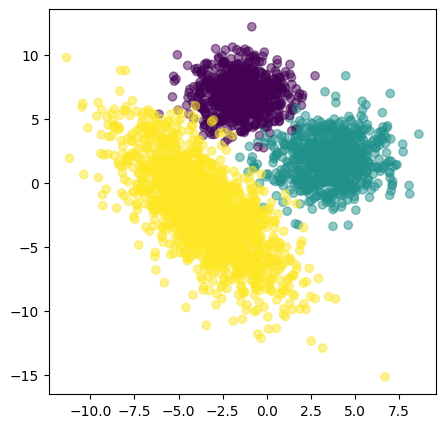

In [21]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [22]:
# X = StandardScaler().fit_transform(X)
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)

y_pred = k_means.labels_.astype(int)
centroids = np.round(k_means.cluster_centers_).astype(int)
print(centroids)

[[-3 -3]
 [-2  6]
 [ 4  2]]


1320 938 742 

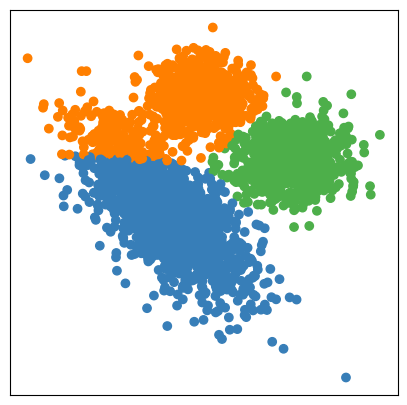

In [23]:
cluster_labels, cluster_counts = np.unique(y_pred, return_counts=True)
for count in cluster_counts:
    print(count, end=' ')

plotResClasterization(X, y_pred)

### Задание 4.6.2 & Задание 4.6.3

[[ 4  2]
 [-2  7]
 [-4 -2]]


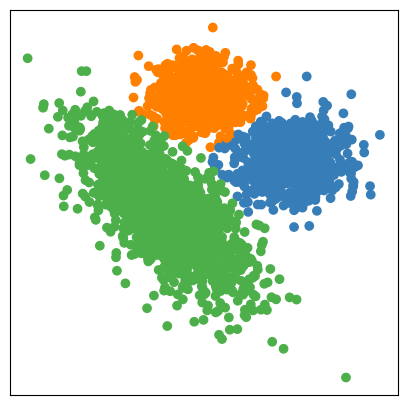

In [24]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

# X = StandardScaler().fit_transform(X)
em_gm = GaussianMixture(n_components=3, random_state=42)
em_gm.fit(X)
y_pred = em_gm.predict(X)

# print(em_gm.means_)
centroids = np.round(em_gm.means_).astype(int)
print(centroids)

plotResClasterization(X, y_pred)

In [25]:
unique, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

dict(zip(unique, counts))

744 763 1493 

{0: 744, 1: 763, 2: 1493}

### Задание 4.7.2 ??? & Задание 4.7.3

[2 2 0 ... 1 1 1]
1112 1142 746 

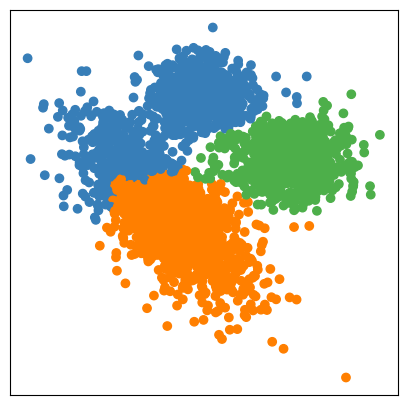

In [26]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

# connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
# connectivity = 0.5 * (connectivity + connectivity.T) # делаем матрицу смежности симметричной

ac = AgglomerativeClustering(n_clusters=3) 

with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(int)

centroids = np.round(ac.labels_).astype(int)
print(centroids)

unique, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

plotResClasterization(X, y_pred)

### Задание 4.7.4

1486 746 768 

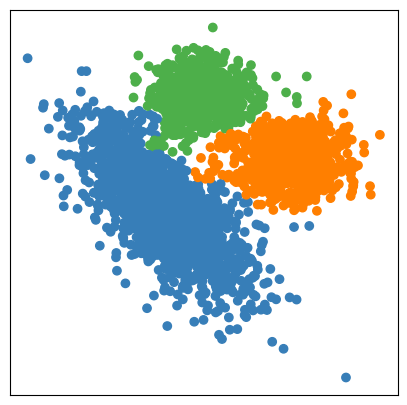

In [27]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3, connectivity=connectivity) 

with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(int)

unique, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

plotResClasterization(X, y_pred)

### Задание 4.7.5

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [102.5, 102.5, 137.5, 137.5],
  [80.0, 80.0, 120.0, 120.0],
  [50.0, 50.0, 100.0, 100.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [210.0, 210.0, 241.25, 241.25],
  [182.5, 182.5, 225.625, 225.625],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [395.0, 395.0, 405.0, 

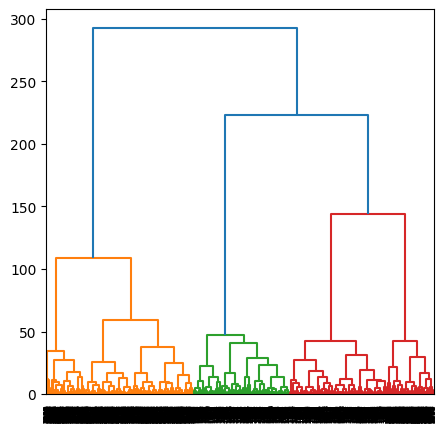

In [28]:
Z = linkage(X, "ward")
dendrogram(Z, leaf_rotation=90.)

### Задание 4.8.2 & Задание 4.8.3

{-1: 368, 0: 656, 1: 721, 2: 1255}


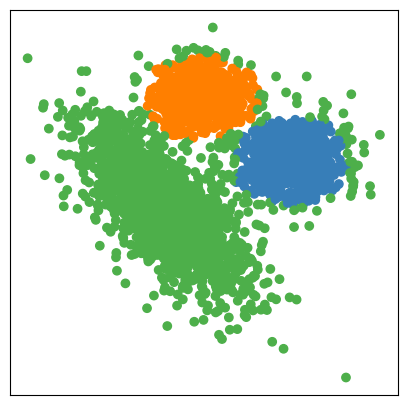

In [29]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)

unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

plotResClasterization(X, y_pred)

### Задание 4.8.4

{-1: 583, 0: 603, 1: 681, 2: 1133}


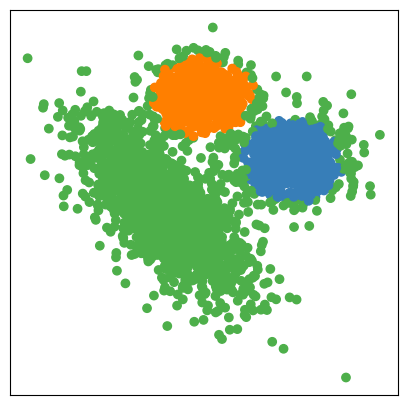

In [30]:
dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)

unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

plotResClasterization(X, y_pred)

### Задание 4.11.1

In [31]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

count = 3
k_means = KMeans(n_clusters=count, random_state=42)
k_means.fit(X)
y_pred = k_means.labels_.astype(int)
print('KMeans', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))

ac = AgglomerativeClustering(n_clusters=count) 
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(int)
print('AgglomerativeClustering', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))

em_gm = GaussianMixture(n_components=count, random_state=42)
em_gm.fit(X)
y_pred = em_gm.predict(X)
print('GaussianMixture', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)
print('DBSCAN', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))


KMeans 0.51
AgglomerativeClustering 0.48
GaussianMixture 0.5
DBSCAN 0.45


### Задание 4.11.3

In [32]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [33]:
def findNumberClusters(count):
    print(count)
    
    k_means = KMeans(n_clusters=count, random_state=42)
    k_means.fit(X)
    y_pred = k_means.labels_.astype(int)
    print('KMeans', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))
    
    ac = AgglomerativeClustering(n_clusters=count) 
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(int)
    print('AgglomerativeClustering', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))
    
    em_gm = GaussianMixture(n_components=count, random_state=42)
    em_gm.fit(X)
    y_pred = em_gm.predict(X)
    print('GaussianMixture', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))

In [34]:
for i in range(10-1):
    count = i + 2
    findNumberClusters(count)

2
KMeans 0.46
AgglomerativeClustering 0.41
GaussianMixture 0.46
3
KMeans 0.51
AgglomerativeClustering 0.48
GaussianMixture 0.5
4
KMeans 0.51
AgglomerativeClustering 0.48
GaussianMixture 0.51
5
KMeans 0.48
AgglomerativeClustering 0.47
GaussianMixture 0.48
6
KMeans 0.46
AgglomerativeClustering 0.44
GaussianMixture 0.46
7
KMeans 0.4
AgglomerativeClustering 0.36
GaussianMixture 0.44
8
KMeans 0.33
AgglomerativeClustering 0.35
GaussianMixture 0.33
9
KMeans 0.33
AgglomerativeClustering 0.28
GaussianMixture 0.31
10
KMeans 0.33
AgglomerativeClustering 0.28
GaussianMixture 0.31


### Задание 4.12.1 Однородность

In [35]:
X = StandardScaler().fit_transform(X)
count = 3

k_means = KMeans(n_clusters=count, random_state=42)
k_means.fit(X)
y_pred = k_means.labels_.astype(int)
print('KMeans', np.round(homogeneity_score(labels_true=y, labels_pred=y_pred),2))

ac = AgglomerativeClustering(n_clusters=count) 
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(int)
print('AgglomerativeClustering', np.round(homogeneity_score(labels_true=y, labels_pred=y_pred),2))

em_gm = GaussianMixture(n_components=count, random_state=42)
em_gm.fit(X)
y_pred = em_gm.predict(X)
print('GaussianMixture', np.round(homogeneity_score(labels_true=y, labels_pred=y_pred),2))

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)
print('DBSCAN', np.round(homogeneity_score(labels_true=y, labels_pred=y_pred),2))

KMeans 0.8
AgglomerativeClustering 0.91
GaussianMixture 0.93
DBSCAN 0.0


### Задание 4.13.1 & Задание 4.13.2 Полнота

In [36]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))
X = StandardScaler().fit_transform(X)

count = 3

k_means = KMeans(n_clusters=count, random_state=42)
k_means.fit(X)
y_pred = k_means.labels_.astype(int)
print('KMeans', np.round(completeness_score(labels_true=y, labels_pred=y_pred),2))

ac = AgglomerativeClustering(n_clusters=count) 
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(int)
print('AgglomerativeClustering', np.round(completeness_score(labels_true=y, labels_pred=y_pred),2))

em_gm = GaussianMixture(n_components=count, random_state=42)
em_gm.fit(X)
y_pred = em_gm.predict(X)
print('GaussianMixture', np.round(completeness_score(labels_true=y, labels_pred=y_pred),2))

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)
print('DBSCAN', np.round(completeness_score(labels_true=y, labels_pred=y_pred),2))

KMeans 0.78
AgglomerativeClustering 0.91
GaussianMixture 0.93
DBSCAN 0.08


### Задание 4.14.1